In [7]:
import backtrader as bt
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import logging
from dataclasses import dataclass
from typing import Dict, List, Optional, Tuple
import time

In [8]:
def download_yf_data(ticker: str, start: datetime, end: datetime, retries: int = 5) -> pd.DataFrame:
    wait_time = 5
    for attempt in range(retries):
        try:
            if attempt > 0:
                print(f"Retrying download in {wait_time} seconds...")
                time.sleep(wait_time)
                wait_time *= 2
            print(f"Downloading data for {ticker} from Yahoo Finance...")
            df = yf.download(
                ticker,
                start=start,
                end=end,
                progress=False,
                auto_adjust=True
            )
            if df.empty:
                print("No data received.")
                continue
            df.index = pd.to_datetime(df.index)
            print(f"✅ Successfully downloaded {len(df)} rows of data for {ticker}")
            return df
        except Exception as e:
            print(f"❌ Error: {e}")
            if attempt == retries - 1:
                raise
    return pd.DataFrame()  # Empty on failure


def setup_backtrader(cerebro: bt.Cerebro, data: pd.DataFrame, ticker: str):

    data_feed = bt.feeds.PandasData(
        dataname=data,
        datetime=None,
        open='Open',
        high='High',
        low='Low',
        close='Close',
        volume='Volume',
        openinterest=-1,
        timeframe=bt.TimeFrame.Days
    )

    already_exists = any(getattr(d, '_name', None) == ticker for d in cerebro.datas)

    if not already_exists:
        cerebro.adddata(data_feed, name=ticker)
    else:
        print(f"❗{ticker} 데이터 이미 존재함 - 추가 생략")
    
    print("🚀 Running backtrader analysis...")


In [9]:
class DataStructureAnalysisStrategy(bt.Strategy):
    """
    Backtrader 데이터 구조를 분석하는 전략
    실제 데이터가 어떻게 저장되고 접근되는지 확인
    """
    def __init__(self):
        print("=" * 100)
        print("__init__()")
        print("=" * 100)

        print(f"총 가진 종목 개수: {len(self.datas)}")

        for i, data in enumerate(self.datas):
            print(f"데이터 {i+1}: {getattr(data, '_name', 'Unknown')}")
      

    def start(self):
        print("=" * 100)
        print("start()")
        print("=" * 100)
    
        print(f"\n🔍 보유 종목:")
        for data in self.datas:
            symbol = getattr(data, '_name', 'Unknown')
            print(f"\n📊 {symbol}")


    def next(self):
        print("next()")
        print("=" * 100)
        
        for data in self.datas:
            symbol = getattr(data, '_name', 'Unknown')
            dt = data.datetime.datetime(0)  # 현재 데이터 포인트의 날짜 (0번째 인덱스)

            current_datetime = data.datetime.datetime(0)
            current_date = data.datetime.date(0)
        
            print(f"📅 현재 날짜: {current_date}")
            print(f"🕐 현재 시간: {current_datetime}")
        

            print(f"📈 현재 가격 정보:")
            print(f"  시가: ${data.open[0]:.2f}")
            print(f"  고가: ${data.high[0]:.2f}")
            print(f"  저가: ${data.low[0]:.2f}")
            print(f"  종가: ${data.close[0]:.2f}")
            print(f"  거래량: {data.volume[0]:,.0f}")



In [10]:
# === 다운로드 수행 ===
print("Backtrader 데이터 다운로드 시작...")
cerebro = bt.Cerebro()
cerebro.addstrategy(DataStructureAnalysisStrategy)


start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 1, 10)

tickers = ['AAPL']
datas = {}
for ticker in tickers:
    print(f"{ticker}")
    df = download_yf_data(ticker, start=start_date, end=end_date)
    df.columns = df.columns.droplevel(1)
    datas[ticker] = df



Backtrader 데이터 다운로드 시작...
AAPL
✅ Successfully downloaded 5 rows of data for AAPL


In [12]:
# === backtrader 설정 ===
for ticker, df in datas.items():
    if not df.empty:
        setup_backtrader(cerebro, df, ticker)
    else:
        print(f"❗{ticker} 데이터 setup 실패")



❗AAPL 데이터 이미 존재함 - 추가 생략
🚀 Running backtrader analysis...


In [13]:
# === 수행 시작 ===
cerebro.run()

__init__()
총 가진 종목 개수: 1
데이터 1: AAPL
start()

🔍 보유 종목:

📊 AAPL
next()
📅 현재 날짜: 2025-01-02
🕐 현재 시간: 2025-01-02 00:00:00
📈 현재 가격 정보:
  시가: $248.33
  고가: $248.50
  저가: $241.24
  종가: $243.26
  거래량: 55,740,700
next()
📅 현재 날짜: 2025-01-03
🕐 현재 시간: 2025-01-03 00:00:00
📈 현재 가격 정보:
  시가: $242.77
  고가: $243.59
  저가: $241.31
  종가: $242.77
  거래량: 40,244,100
next()
📅 현재 날짜: 2025-01-06
🕐 현재 시간: 2025-01-06 00:00:00
📈 현재 가격 정보:
  시가: $243.72
  고가: $246.73
  저가: $242.61
  종가: $244.41
  거래량: 45,045,600
next()
📅 현재 날짜: 2025-01-07
🕐 현재 시간: 2025-01-07 00:00:00
📈 현재 가격 정보:
  시가: $242.40
  고가: $244.96
  저가: $240.77
  종가: $241.63
  거래량: 40,856,000
next()
📅 현재 날짜: 2025-01-08
🕐 현재 시간: 2025-01-08 00:00:00
📈 현재 가격 정보:
  시가: $241.34
  고가: $243.12
  저가: $239.47
  종가: $242.12
  거래량: 37,628,900


In [14]:
@dataclass
class ScreeningCriteria:
    """스크리닝 조건"""
    min_price: float = 10.0
    max_price: float = 1000.0
    min_volume: int = 100000
    min_market_cap: float = 1000000000  # 10억 달러
    sectors: List[str] = None
    bottom_breakout_pct: float = 5.0    # 바닥 돌파 %

In [15]:
class SmartStockScreener:
    """
    스마트 주식 스크리너
    - 단계별 필터링으로 효율성 극대화
    - 필요한 데이터만 선별적 다운로드
    """
    
    def __init__(self):
        self.logger = self._setup_logging()
        
    def _setup_logging(self):
        import logging
        logging.basicConfig(level=logging.INFO)
        return logging.getLogger(__name__)


In [16]:
import os
from typing import List, Dict
class BasicInfoScreener(SmartStockScreener):
    """
    기본 정보만으로 1차 필터링
    - 가격, 거래량, 시가총액으로 대부분 걸러냄
    - 빠르고 API 호출 최소화
    """
    
    def get_sp500_symbols(self) -> List[str]:
        """S&P 500 종목 리스트 가져오기"""
        try:
            # Wikipedia에서 S&P 500 목록 가져오기 (무료!)
            url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
            tables = pd.read_html(url)
            sp500_table = tables[0]
            symbols = sp500_table['Symbol'].tolist()
            
            self.logger.info(f"S&P 500 종목 {len(symbols)}개 로드 완료")
            return symbols
            
        except Exception as e:
            self.logger.error(f"S&P 500 목록 로드 실패: {e}")
            # 백업: 주요 종목들
            return ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JNJ', 'V']
    
    
    
    def get_basic_info_batch(self, symbols: List[str]) -> pd.DataFrame:
        """
        배치로 기본 정보 가져오기 (핵심!)
        - 한 번의 API 호출로 여러 종목 정보 수집
        """
        try:
            # 최대 100개씩 배치 처리
            batch_size = 10
            all_data = []
            
            for i in range(0, len(symbols), batch_size):

                batch_symbols = symbols[i:i+batch_size]
                symbols_str = ' '.join(batch_symbols)
                
                self.logger.info(f"배치 {i//batch_size + 1}: {len(batch_symbols)}개 종목 처리 중...")
                
                # yfinance로 배치 다운로드
                tickers = yf.Tickers(symbols_str)
                
                for symbol in batch_symbols:
                    try:
                        ticker = tickers.tickers[symbol]
                        info = ticker.info
                        
                        # 핵심 정보만 추출
                        basic_data = {
                            'symbol': symbol,
                            'price': info.get('currentPrice', info.get('regularMarketPrice', 0)),
                            'volume': info.get('volume', info.get('regularMarketVolume', 0)),
                            'market_cap': info.get('marketCap', 0),
                            'sector': info.get('sector', 'Unknown'),
                            'industry': info.get('industry', 'Unknown'),
                            'pe_ratio': info.get('trailingPE', 0),
                            'fifty_two_week_low': info.get('fiftyTwoWeekLow', 0),
                            'fifty_two_week_high': info.get('fiftyTwoWeekHigh', 0),
                        }
                        all_data.append(basic_data)
                        
                    except Exception as e:
                        self.logger.warning(f"{symbol} 정보 수집 실패: {e}")
                        continue
                
                # API 제한 방지를 위한 대기
                time.sleep(1)
            
            df = pd.DataFrame(all_data)
            self.logger.info(f"총 {len(df)}개 종목 기본 정보 수집 완료")
            return df
            
        except Exception as e:
            self.logger.error(f"기본 정보 수집 실패: {e}")
            return pd.DataFrame()
    
    
    def save(self, df: pd.DataFrame, filename: str) -> None:
        """
        데이터프레임을 CSV 파일로 저장
        
        Args:
            df: 저장할 데이터프레임
            filename: 저장할 파일 이름 (예: 'basic_info.csv')
        """
        try:
            # 저장 경로 설정
            save_path = f"data/{filename}"
            
            # 디렉토리가 없으면 생성
            os.makedirs("data", exist_ok=True)
            
            # CSV로 저장
            df.to_csv(save_path, index=False)
            self.logger.info(f"✅ 데이터 저장 완료: {save_path}")
            
        except Exception as e:
            self.logger.error(f"❌ 데이터 저장 실패: {e}")
            raise
    
    def read_from_csv(self, filename: str) -> pd.DataFrame:
        """
        CSV 파일에서 데이터프레임 읽기
        
        Args:
            filename: 읽을 파일 이름 (예: 'basic_info.csv')
            
        Returns:
            pd.DataFrame: 읽어온 데이터프레임
        """
        try:
            # 파일 경로 설정
            file_path = f"data/{filename}"
            
            # 파일 존재 확인
            if not os.path.exists(file_path):
                self.logger.warning(f"⚠️ 파일이 존재하지 않음: {file_path}")
                return pd.DataFrame()
            
            # CSV 읽기
            df = pd.read_csv(file_path)
            self.logger.info(f"✅ CSV 파일 읽기 완료: {len(df)}개 종목")
            
            return df
            
        except Exception as e:
            self.logger.error(f"❌ 데이터 읽기 실패: {e}")
            return pd.DataFrame()
    

    def apply_basic_filters(self, df: pd.DataFrame, criteria: ScreeningCriteria) -> pd.DataFrame:
        """기본 필터 적용 - 대부분 종목이 여기서 걸러짐!"""
        
        initial_count = len(df)
        self.logger.info(f"1차 필터링 시작: {initial_count}개 종목 스크리닝 수행")
        
        # 가격 필터
        df = df[(df['price'] >= criteria.min_price) & (df['price'] <= criteria.max_price)]
        self.logger.info(f"가격 필터 후: {len(df)}개 ({initial_count - len(df)}개 제거)")
        
        # 거래량 필터
        df = df[df['volume'] >= criteria.min_volume]
        self.logger.info(f"거래량 필터 후: {len(df)}개")
        
        # 시가총액 필터
        df = df[df['market_cap'] >= criteria.min_market_cap]
        self.logger.info(f"시가총액 필터 후: {len(df)}개")
        
        # 섹터 필터 (선택적)
        if criteria.sectors:
            df = df[df['sector'].isin(criteria.sectors)]
            self.logger.info(f"섹터 필터 후: {len(df)}개")
        
        # 결측치 제거
        df = df.dropna(subset=['price', 'volume', 'market_cap'])
        
        self.logger.info(f"✅ 1차 필터링 완료: {initial_count}개 → {len(df)}개 (제거율: {(1-len(df)/initial_count)*100:.1f}%)")
        
        return df

In [22]:
# Create screener instance
bis = BasicInfoScreener()
filename = "basic_info.csv"

if(os.path.exists("data/" + filename)):
    print("이미존재")
    saved_infos = bis.read_from_csv(filename)
else:
    print("없음")
    symbols = bis.get_sp500_symbols()
    infos = bis.get_basic_info_batch(symbols)
    bis.save(infos, filename)  # Saves to data/basic_info.csv
    saved_infos = bis.read_from_csv(filename)

saved_infos.head()





INFO:__main__:✅ 데이터 로드 완료: 503개 종목


이미존재


symbol   price   volume    market_cap       sector  \
0    MMM  142.32  2450288   76593922048  Industrials   
1    AOS   63.81  2217061    9067974656  Industrials   
2    ABT  135.62  2458886  235957092352   Healthcare   
3   ABBV  191.08  4965321  337523703808   Healthcare   
4    ACN  311.71  2472251  195138551808   Technology   

                          industry   pe_ratio  fifty_two_week_low  \
0                    Conglomerates  17.723537               98.26   
1   Specialty Industrial Machinery  17.824022               58.83   
2                  Medical Devices  17.612988               99.71   
3     Drug Manufacturers - General  82.008590              163.52   
4  Information Technology Services  25.697443              275.01   

   fifty_two_week_high  
0               156.35  
1                92.45  
2               141.23  
3               218.66  
4               398.35

In [ ]:

# 스크리닝 조건 설정
criteria = ScreeningCriteria(
    min_price=20.0,           # 최소 $20
    max_price=500.0,          # 최대 $500
    min_volume=500000,        # 최소 거래량 50만
    min_market_cap=5000000000, # 최소 시가총액 50억 달러
    sectors=['Technology', 'Healthcare', 'Financial Services'],  # 특정 섹터만
    bottom_breakout_pct=5.0   # 바닥 대비 5% 상승
)

first_filtered_infos = bis.apply_basic_filters(saved_infos, criteria)
first_filtered_infos.head()


INFO:__main__:1차 필터링 시작: 503개 종목
INFO:__main__:가격 필터 후: 450개 (53개 제거)
INFO:__main__:거래량 필터 후: 423개
INFO:__main__:시가총액 필터 후: 423개
INFO:__main__:섹터 필터 후: 166개
INFO:__main__:✅ 1차 필터링 완료: 503개 → 166개 (제거율: 67.0%)


symbol   price    volume    market_cap      sector  \
2    ABT  135.62   2458886  235957092352  Healthcare   
3   ABBV  191.08   4965321  337523703808  Healthcare   
4    ACN  311.71   2472251  195138551808  Technology   
5   ADBE  391.68  10611155  166934020096  Technology   
6    AMD  116.16  39598883  188341829632  Technology   

                          industry   pe_ratio  fifty_two_week_low  \
2                  Medical Devices  17.612988               99.71   
3     Drug Manufacturers - General  82.008590              163.52   
4  Information Technology Services  25.697443              275.01   
5           Software - Application  25.059500              332.01   
6                   Semiconductors  84.788320               76.48   

   fifty_two_week_high  
2               141.23  
3               218.66  
4               398.35  
5               587.75  
6               187.28

In [75]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import requests
import time
from typing import List, Dict, Optional
import concurrent.futures
from dataclasses import dataclass
from datetime import timezone

class TechnicalScreener(SmartStockScreener):
    """
    기술적 분석 기반 2차 필터링
    - 1차 통과 종목들만 상세 분석
    - 바닥 돌파 등 구체적 조건 확인
    """
    
    def __init__(self):
        self.logger = self._setup_logging()
        self.history_dir = "data/history"
        os.makedirs(self.history_dir, exist_ok=True)
    
    def get_history_file_path(self, symbol: str) -> str:
        """Get the path for storing historical data"""
        return os.path.join(self.history_dir, f"{symbol}_history.csv")
    
    def save_history_data(self, symbol: str, data: pd.DataFrame) -> None:
        """Save historical data to CSV"""
        try:
            file_path = self.get_history_file_path(symbol)
            data.to_csv(file_path)
            self.logger.info(f"✅ Historical data saved for {symbol}")
        except Exception as e:
            self.logger.error(f"❌ Failed to save historical data for {symbol}: {e}")
    
    def load_history_data(self, symbol: str) -> pd.DataFrame:
        """Load historical data from CSV if exists"""
        try:
            file_path = self.get_history_file_path(symbol)
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, index_col=0, parse_dates=True)
                self.logger.info(f"✅ Loaded historical data for {symbol}")
                return data
            return None
        except Exception as e:
            self.logger.error(f"❌ Failed to load historical data for {symbol}: {e}")
            return None
    
    def get_historical_data(self, symbol: str, lookback_days: int = 20) -> pd.DataFrame:
    
        """Get historical data, either from CSV or by downloading"""
        try:
            # Try to load from CSV first
            data = self.load_history_data(symbol)
            
            # Check if we have enough recent data
            
            start_date = end_date - timedelta(days=lookback_days * 2)
            start_date = end_date - timedelta(days=lookback_days * 2)
            start_date = start_date.replace(tzinfo=timezone.utc)
            
            if data is not None:
                if data.index[-1] >= start_date:
                    self.logger.info(f"Using cached data for {symbol}")
                    return data
            
            # If no cached data or data is too old, download new data
            self.logger.info(f"Downloading new data for {symbol}")
            
            ticker = yf.Ticker(symbol)
            data = ticker.history(start=start_date, end=end_date)
            
            if not data.empty:
                self.save_history_data(symbol, data)
            
            return data
            
        except Exception as e:
            self.logger.error(f"❌ Failed to get historical data for {symbol}: {e}")
            return pd.DataFrame()
    

    def analyze_bottom_breakout(self, symbol: str, lookback_days: int = 20) -> Dict:
        """바닥 돌파 분석 (친구 전략 적용)"""
        try:
            # Get historical data (from cache or download)
            data = self.get_historical_data(symbol, lookback_days)
            
            if len(data) < lookback_days:
                return None
            
            # 최근 N일 최저점 (바닥)
            recent_lows = data['Low'].tail(lookback_days)
            bottom_date = recent_lows.idxmin()
            bottom_price = recent_lows.min()
            
            
            # 현재가
            current_price = data['Close'].iloc[-1]
            
            # 바닥 돌파 확인
            breakout_price = bottom_price * 1.05  # 5% 돌파

            # stop loss 값 설정
            stop_loss_price = bottom_price * 0.95
            
            # 거래량 증가 확인
            avg_volume = data['Volume'].tail(10).mean()
            recent_volume = data['Volume'].iloc[-1]
            volume_ratio = recent_volume / avg_volume if avg_volume > 0 else 0
            
            result = {
                'symbol': symbol,
                'current_price': current_price,
                'bottom_date': bottom_date,
                'bottom_price': bottom_price,
                'breakout_price': breakout_price,
                'stop_loss_price': stop_loss_price,
                'is_breakout': current_price >= breakout_price,
                'price_from_bottom_pct': ((current_price - bottom_price) / bottom_price) * 100,
                'volume_ratio': volume_ratio,
                'avg_volume_10d': avg_volume,
                'analysis_date': datetime.now()
            }
            
            return result
            
        except Exception as e:
            self.logger.warning(f"{symbol} 기술적 분석 실패: {e}")
            return None
    
    def batch_technical_analysis(self, symbols: List[str], max_workers: int = 10) -> List[Dict]:
        """병렬 처리로 기술적 분석 (속도 향상!)"""
        
        self.logger.info(f"2차 기술적 분석 시작: {len(symbols)}개 종목")
        
        results = []
        
        # 병렬 처리로 속도 향상
        with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
            # 모든 작업 제출
            future_to_symbol = {
                executor.submit(self.analyze_bottom_breakout, symbol): symbol 
                for symbol in symbols
            }
            
            # 결과 수집
            for future in concurrent.futures.as_completed(future_to_symbol):
                result = future.result()
                if result:
                    results.append(result)
        
        self.logger.info(f"✅ 2차 분석 완료: {len(results)}개 종목 분석 성공")
        
        return results


In [76]:
second_list = first_filtered_infos['symbol'].tolist()
type(second_list)
ts = TechnicalScreener()
remaining_symbols = ts.batch_technical_analysis(second_list)
technical_df = pd.DataFrame(remaining_symbols)

if not technical_df.empty:
    # 기본 정보와 기술적 분석 결과 병합
    final_df = pd.merge(first_filtered_infos, technical_df, on='symbol', how='inner')
    
    # 최종 필터: 바닥 돌파 종목만
    breakout_df = final_df[final_df['is_breakout'] == True]
    
    # 정렬: 바닥에서 상승률 순
    breakout_df = breakout_df.sort_values('price_from_bottom_pct', ascending=False)
    
else:
    breakout_df = pd.DataFrame()

INFO:__main__:2차 기술적 분석 시작: 166개 종목
INFO:__main__:✅ Loaded historical data for ABT
INFO:__main__:✅ Loaded historical data for ABBV
INFO:__main__:✅ Loaded historical data for ADBE
INFO:__main__:Using cached data for ABT
INFO:__main__:✅ Loaded historical data for ACN
INFO:__main__:Using cached data for ABBV
INFO:__main__:✅ Loaded historical data for AFL
INFO:__main__:✅ Loaded historical data for AMD
INFO:__main__:Using cached data for ADBE
INFO:__main__:✅ Loaded historical data for ALGN
INFO:__main__:✅ Loaded historical data for ALL
INFO:__main__:✅ Loaded historical data for A
INFO:__main__:✅ Loaded historical data for AKAM
INFO:__main__:Using cached data for ACN
INFO:__main__:Using cached data for AFL
INFO:__main__:✅ Loaded historical data for AXP
INFO:__main__:✅ Loaded historical data for AIG
INFO:__main__:Using cached data for AMD
INFO:__main__:Using cached data for ALGN
INFO:__main__:Using cached data for ALL
INFO:__main__:Using cached data for A
INFO:__main__:✅ Loaded historical dat

In [72]:
breakout_df

symbol   price    volume    market_cap              sector  \
119   ORCL  215.22  50428408  603526332416          Technology   
107     MU  115.60  17390331  129191092224          Technology   
118     ON   51.02   9493262   21320493056          Technology   
137    STX  127.27   2808067   27008856064          Technology   
64    ENPH   45.60   6367172    5983038976          Technology   
..     ...     ...       ...           ...                 ...   
96     KKR  121.33   4207889  112255729664  Financial Services   
72     BEN   22.17   2203237   11650800640  Financial Services   
53     GLW   49.60   3573380   42480959488          Technology   
36     COF  192.83   2515576  123437809664  Financial Services   
25     BAX   30.62   2890177   15713419264          Healthcare   

                           industry   pe_ratio  fifty_two_week_low  \
119       Software - Infrastructure  49.475864              118.86   
107                  Semiconductors  27.655502               61.54   
118                  Semiconductors  35.430553               31.04   
137               Computer Hardware  18.312231               63.19   
64                            Solar  41.834858               37.59   
..                              ...        ...                 ...   
96                 Asset Management  52.297417               86.15   
72                 Asset Management  32.130436               16.25   
53            Electronic Components  95.384610               37.18   
36                  Credit Services  16.204203              128.23   
25   Medical Instruments & Supplies   0.000000               26.25   

     fifty_two_week_high  current_price               bottom_date  \
119               216.60     215.220001 2025-05-23 00:00:00-04:00   
107               157.54     115.599998 2025-05-23 00:00:00-04:00   
118                80.08      51.020000 2025-05-23 00:00:00-04:00   
137               132.23     127.269997 2025-05-21 00:00:00-04:00   
64                130.08      45.599998 2025-05-22 00:00:00-04:00   
..                   ...            ...                       ...   
96                170.40     121.330002 2025-05-23 00:00:00-04:00   
72                 24.37      22.170000 2025-06-03 00:00:00-04:00   
53                 55.33      49.599998 2025-05-19 00:00:00-04:00   
36                210.67     192.830002 2025-05-23 00:00:00-04:00   
25                 40.49      30.620001 2025-06-03 00:00:00-04:00   

     bottom_price  breakout_price  is_breakout  price_from_bottom_pct  \
119    154.259995      161.972994         True              39.517703   
107     90.930000       95.476500         True              27.130758   
118     40.619999       42.650999         True              25.603156   
137    103.730003      108.916504         True              22.693524   
64      37.590000       39.469500         True              21.308854   
..            ...             ...          ...                    ...   
96     115.000000      120.750000         True               5.504349   
72      21.059999       22.112999         True               5.270658   
53      47.134348       49.491065         True               5.231112   
36     183.380005      192.549005         True               5.153232   
25      29.160000       30.618000         True               5.006862   

     volume_ratio  avg_volume_10d              analysis_date  
119      2.944400      18223410.0 2025-06-16 22:38:57.791001  
107      0.857730      20295540.0 2025-06-16 22:38:57.768871  
118      0.726278      13296420.0 2025-06-16 22:38:57.790620  
137      0.667606       4494870.0 2025-06-16 22:38:57.825942  
64       1.139344       5664400.0 2025-06-16 22:38:57.684929  
..            ...             ...                        ...  
96       1.222803       3442500.0 2025-06-16 22:38:57.750530  
72       0.565194       3898310.0 2025-06-16 22:38:57.700803  
53       0.901875       3962300.0 2025-06-16 22:38:57.667264  
36       0.937997       3636260.0 

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import os

def visualize_breakout_analysis(symbol: str, breakout_df: pd.DataFrame, lookback_days: int = 20):
    """
    Visualize breakout analysis for a given stock using pre-calculated breakout data
    
    Args:
        symbol: Stock symbol
        breakout_df: DataFrame containing breakout analysis results
        lookback_days: Number of days to look back for analysis
    """
    # Get historical data
    history_dir = "data/history"
    file_path = os.path.join(history_dir, f"{symbol}_history.csv")
    
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    else:
        end_date = datetime.now()
        start_date = end_date - timedelta(days=lookback_days * 2)
        ticker = yf.Ticker(symbol)
        data = ticker.history(start=start_date, end=end_date)
    
    if data.empty:
        print(f"No data available for {symbol}")
        return
    
    # Get breakout data from breakout_df
    symbol_data = breakout_df[breakout_df['symbol'] == symbol].iloc[0]
    bottom_price = symbol_data['bottom_price']
    breakout_price = symbol_data['breakout_price']
    stop_loss_price = symbol_data['stop_loss_price']
    bottom_date = pd.to_datetime(symbol_data['bottom_date'])
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")
    
    # Plot price action
    plt.plot(data.index, data['Close'], label='Close Price', color='blue', linewidth=2)
    
    # Plot bottom and breakout levels
    plt.axhline(y=bottom_price, color='red', linestyle='--', label='Bottom Price')
    plt.axhline(y=breakout_price, color='green', linestyle='--', label='Breakout Level (5%)')
    plt.axhline(y=stop_loss_price, color='blue', linestyle='--', label='Stop Loss Price')
    
    # Mark the bottom point
    plt.scatter(bottom_date, bottom_price, color='red', s=100, zorder=5, label='Bottom Point')
    
    # Add volume bars at the bottom
    ax2 = plt.twinx()
    ax2.bar(data.index, data['Volume'], alpha=0.3, color='gray', label='Volume')
    
    # Customize the plot
    plt.title(f'{symbol} Breakout Analysis', fontsize=15, pad=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    ax2.set_ylabel('Volume', fontsize=12)
    
    # Add legend
    lines1, labels1 = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Show current price and breakout status
    current_price = data['Close'].iloc[-1]
    breakout_status = "BREAKOUT" if current_price >= breakout_price else "NO BREAKOUT"
    price_from_bottom_pct = ((current_price - bottom_price) / bottom_price) * 100
    
    info_text = (
        f'Current Price: ${current_price:.2f}\n'
        f'Bottom Price: ${bottom_price:.2f}\n'
        f'Bottom Date: {bottom_date.strftime("%Y-%m-%d")}\n'
        f'Price from Bottom: {price_from_bottom_pct:.1f}%\n'
        f'Breakout Status: {breakout_status}'
    )
    
    plt.text(0.02, 0.98, info_text,
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def visualize_all_breakouts(breakout_df: pd.DataFrame):
    """
    Visualize breakout analysis for all symbols in the breakout DataFrame
    
    Args:
        breakout_df: DataFrame containing breakout analysis results
    """
    for _, row in breakout_df.iterrows():
        symbol = row['symbol']
        print(f"\nAnalyzing {symbol}...")
        visualize_breakout_analysis(symbol, breakout_df)
        print("\n" + "="*50 + "\n") 


Analyzing ORCL...


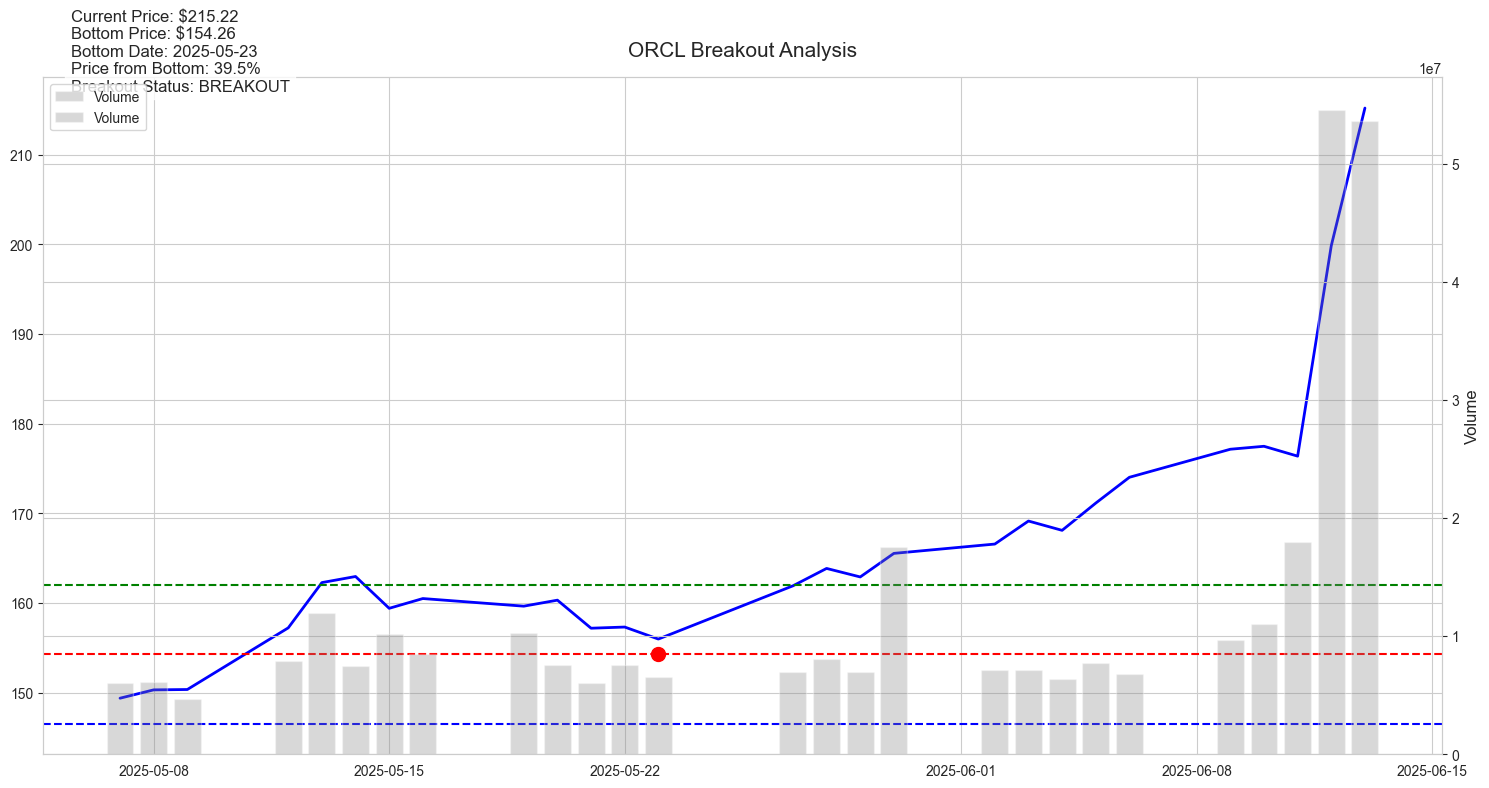




Analyzing MU...


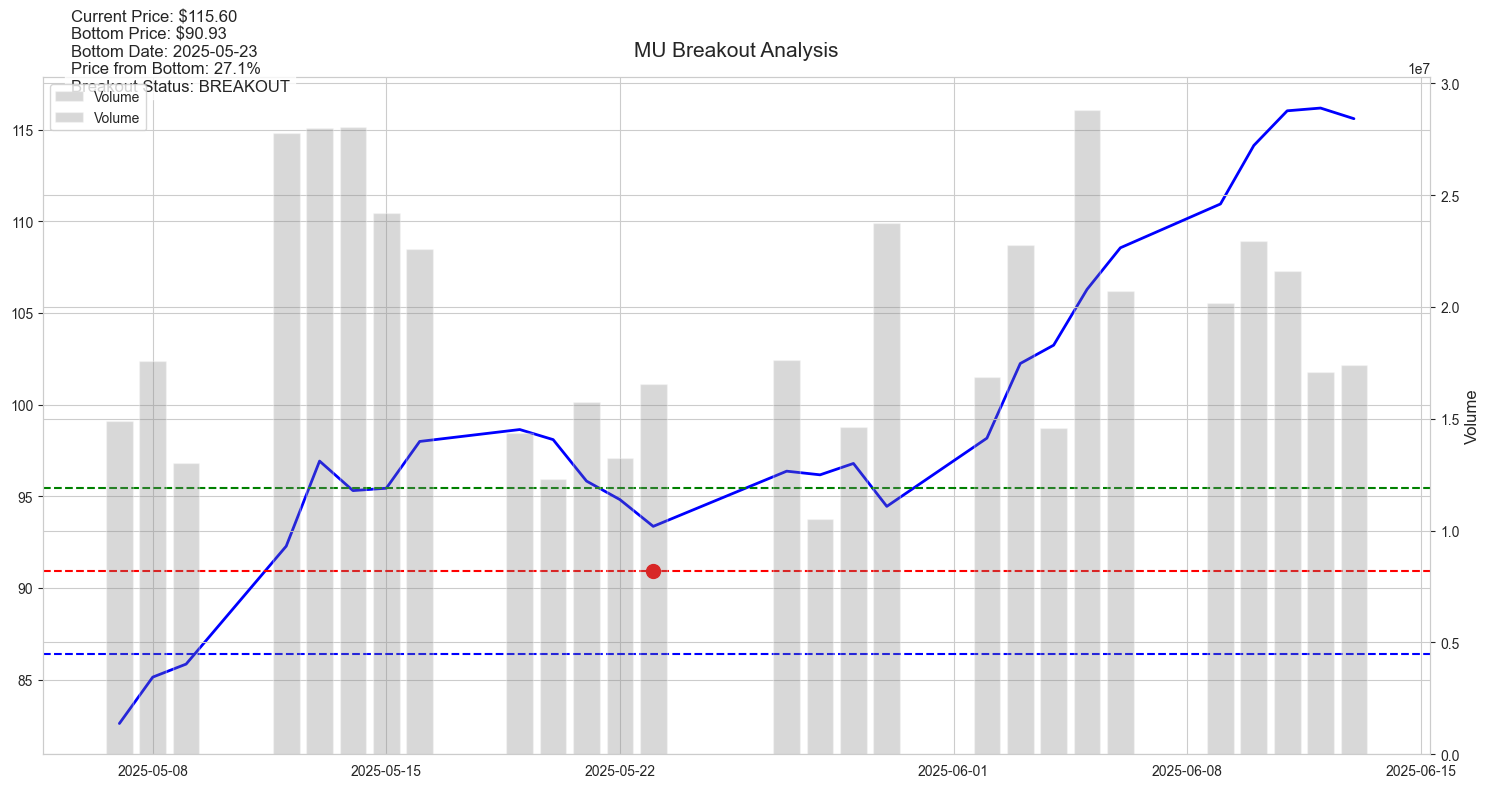




Analyzing ON...


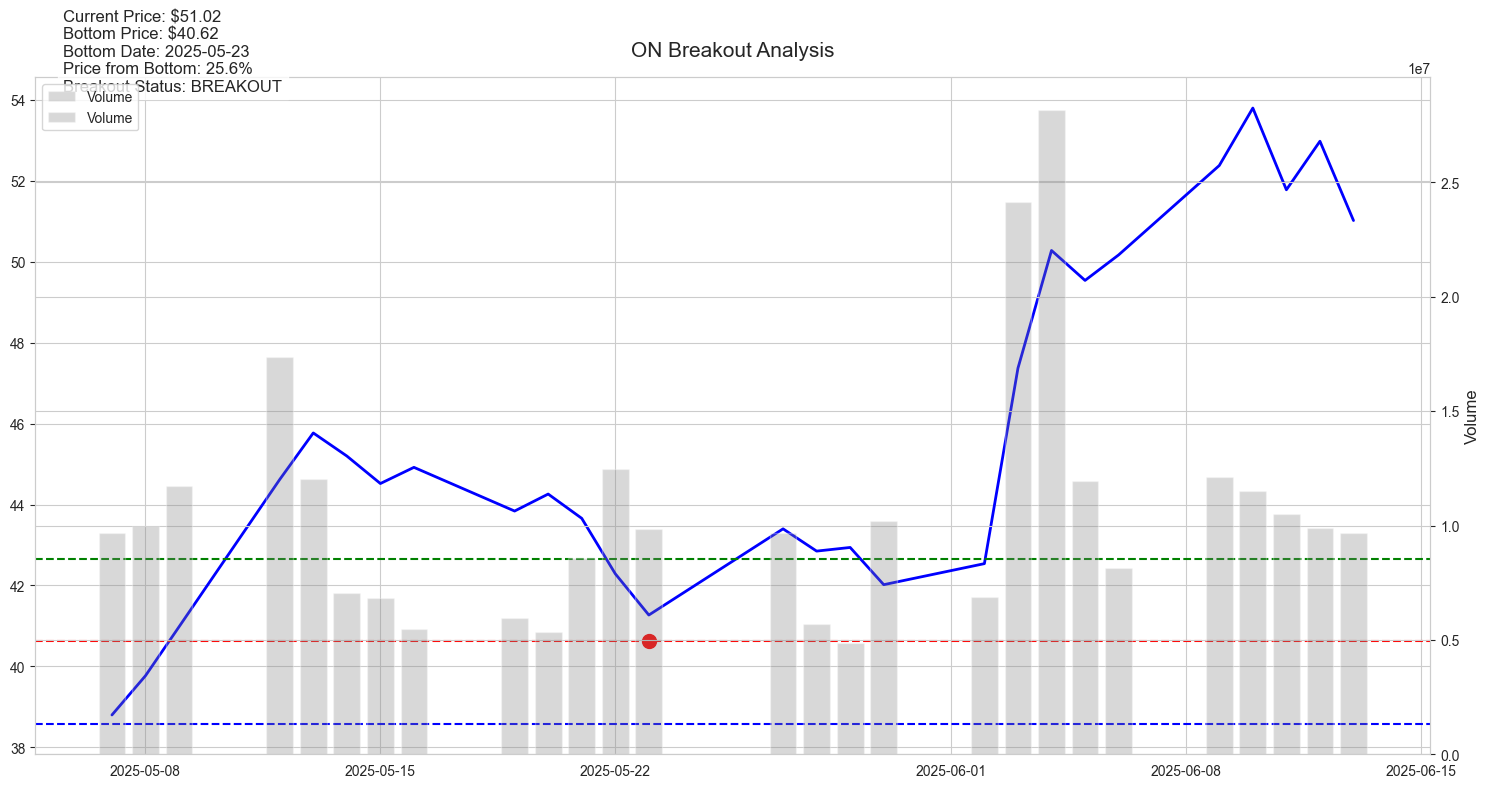




Analyzing STX...


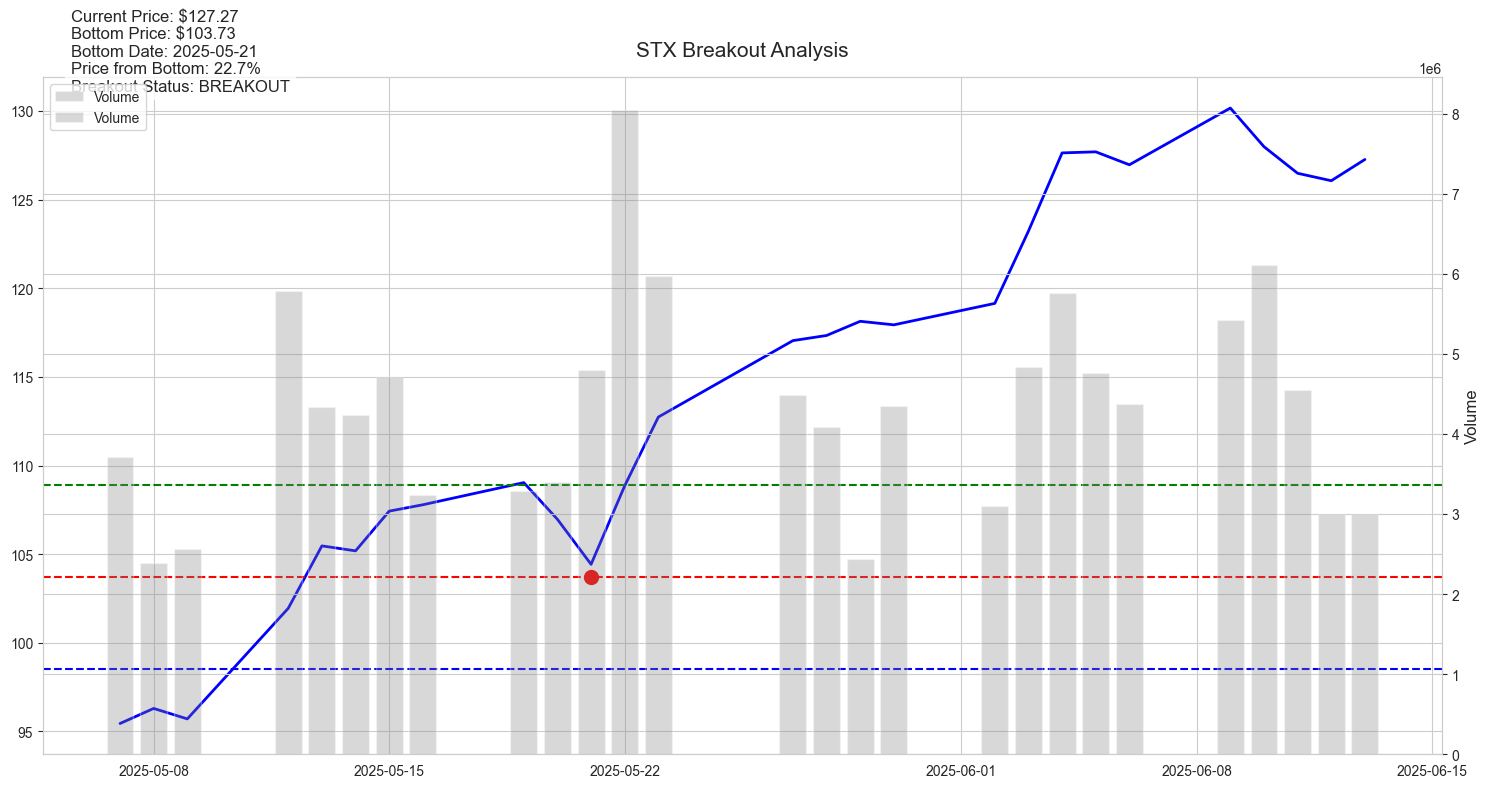




Analyzing ENPH...


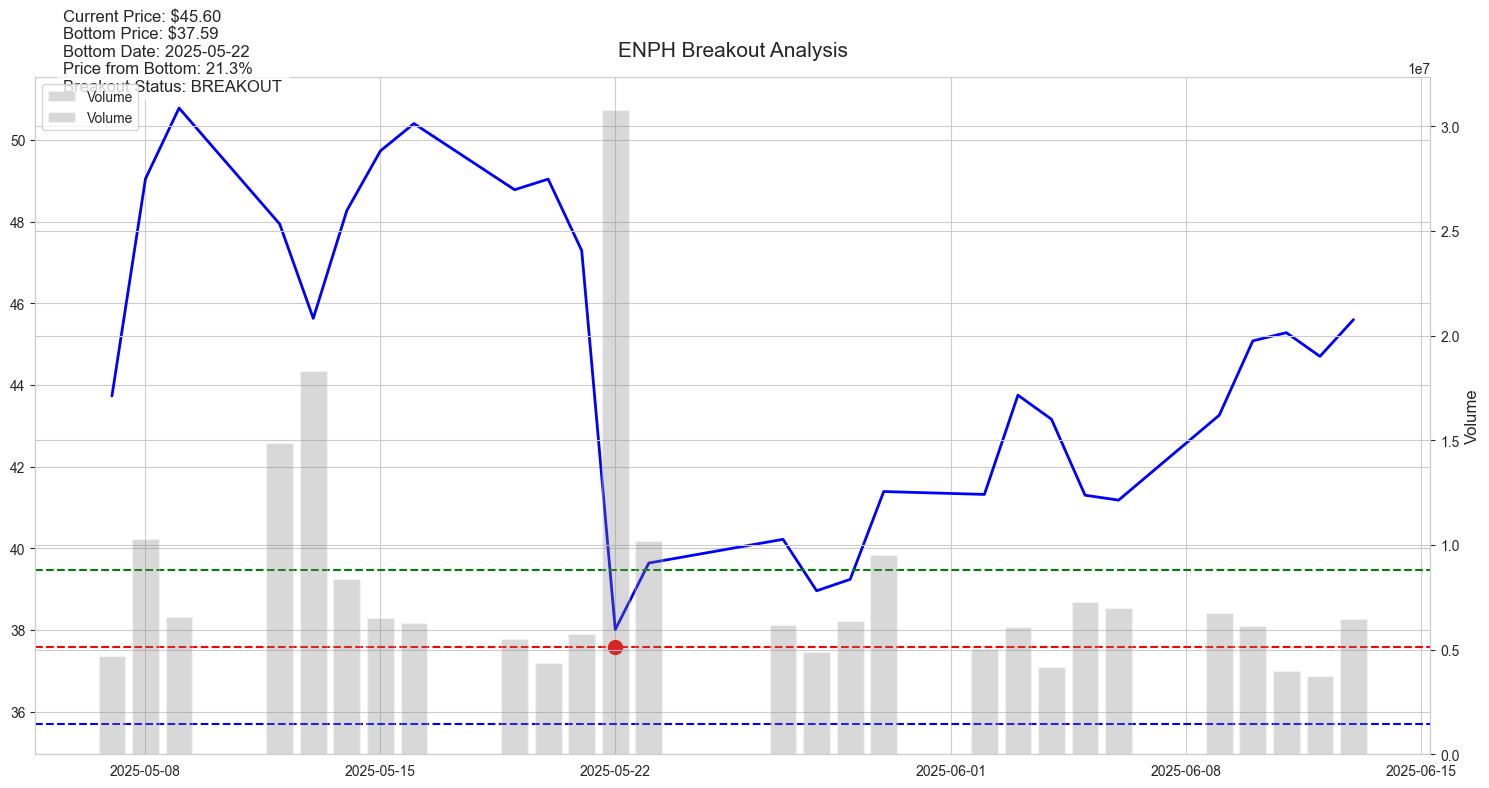




Analyzing HOLX...


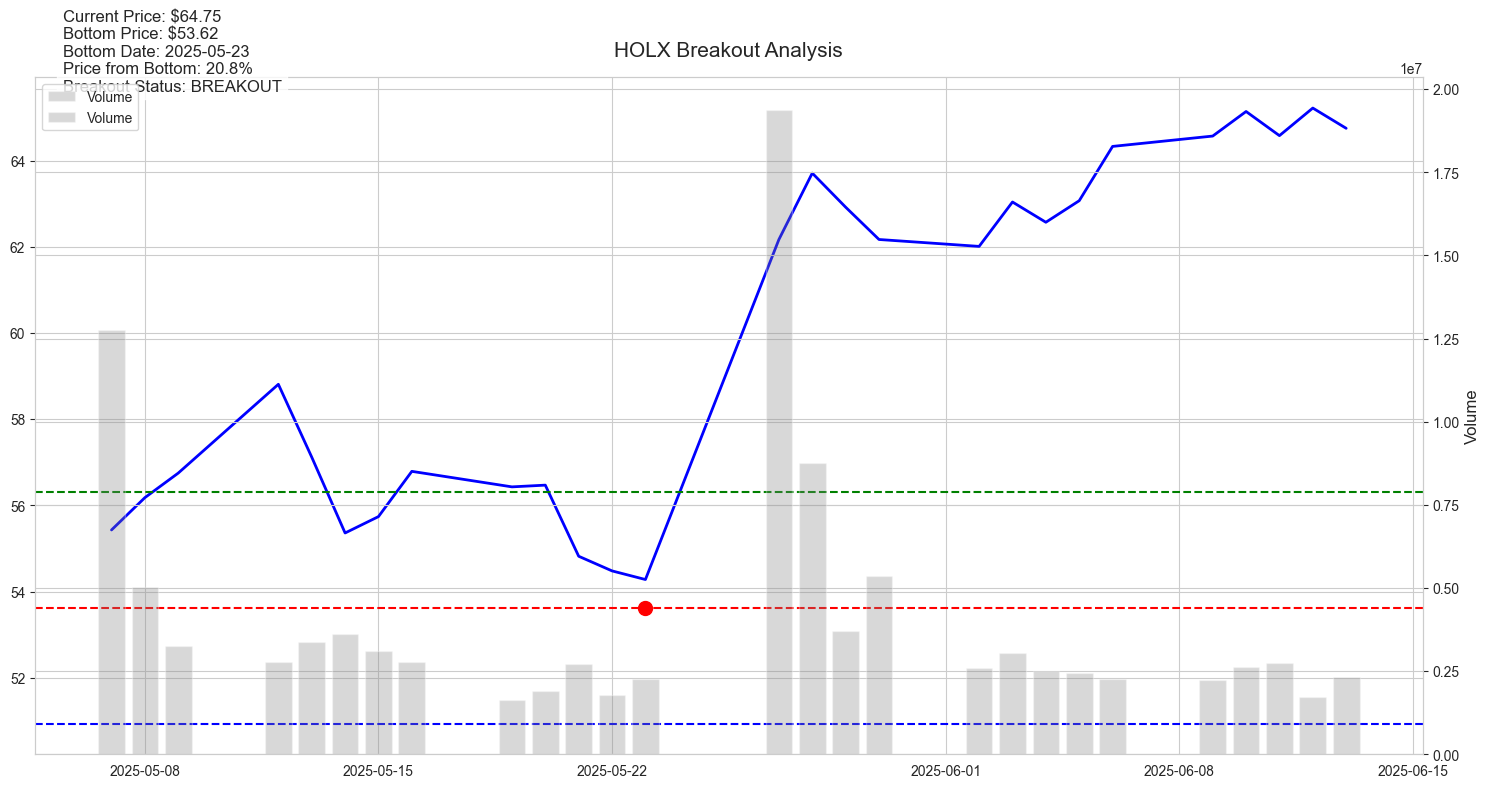




Analyzing MCHP...


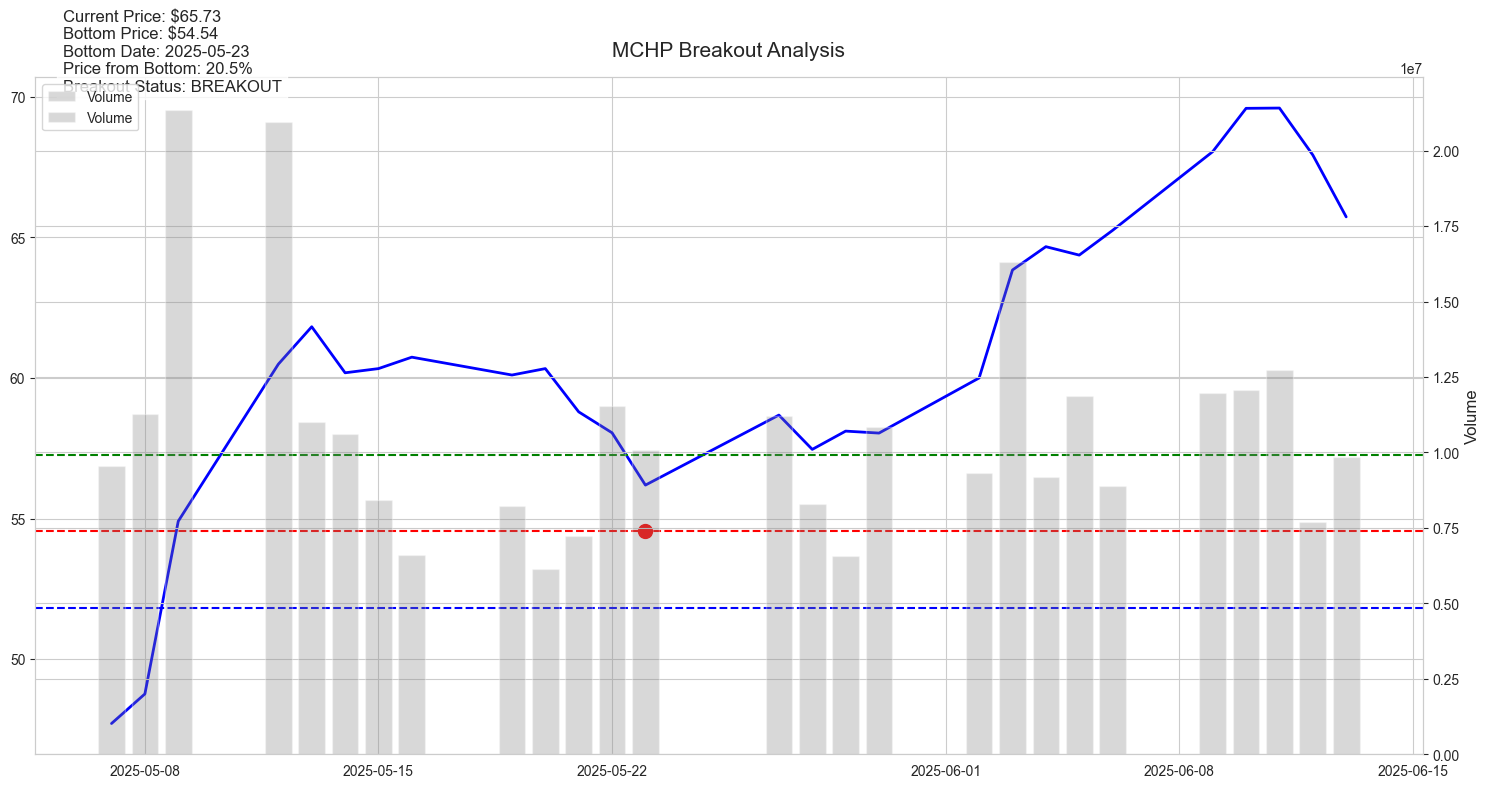




Analyzing FSLR...


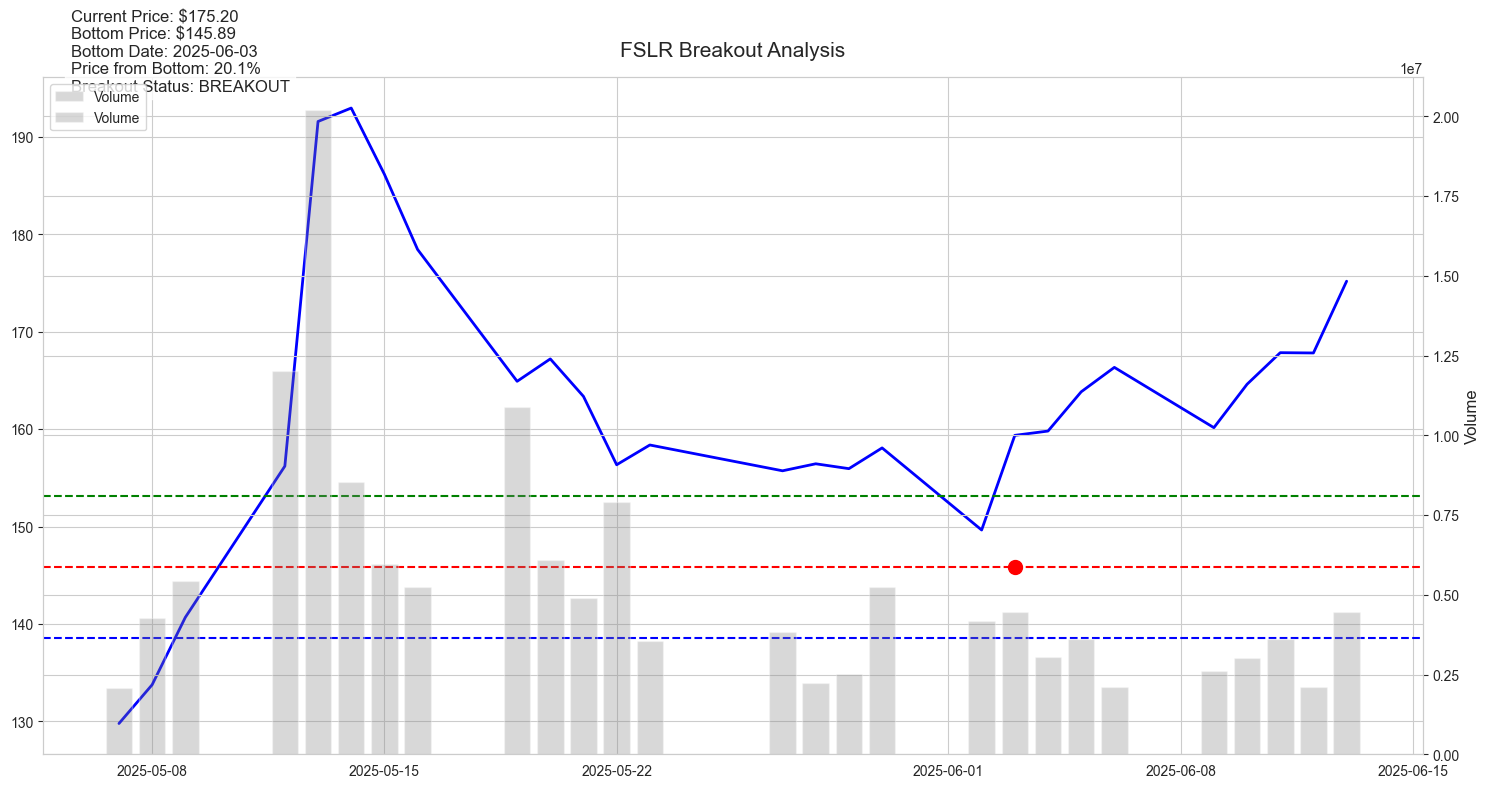




Analyzing IQV...


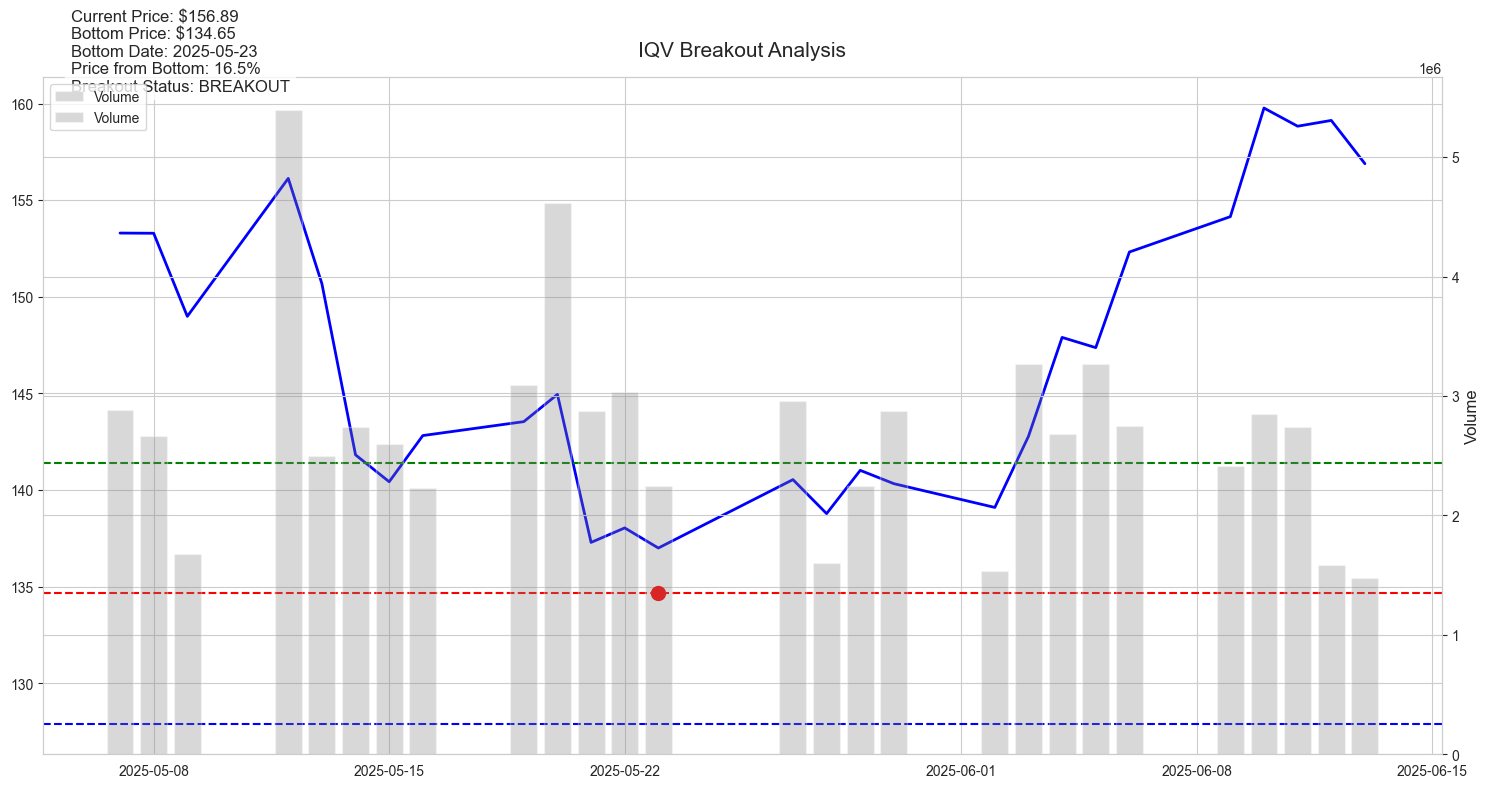




Analyzing UNH...


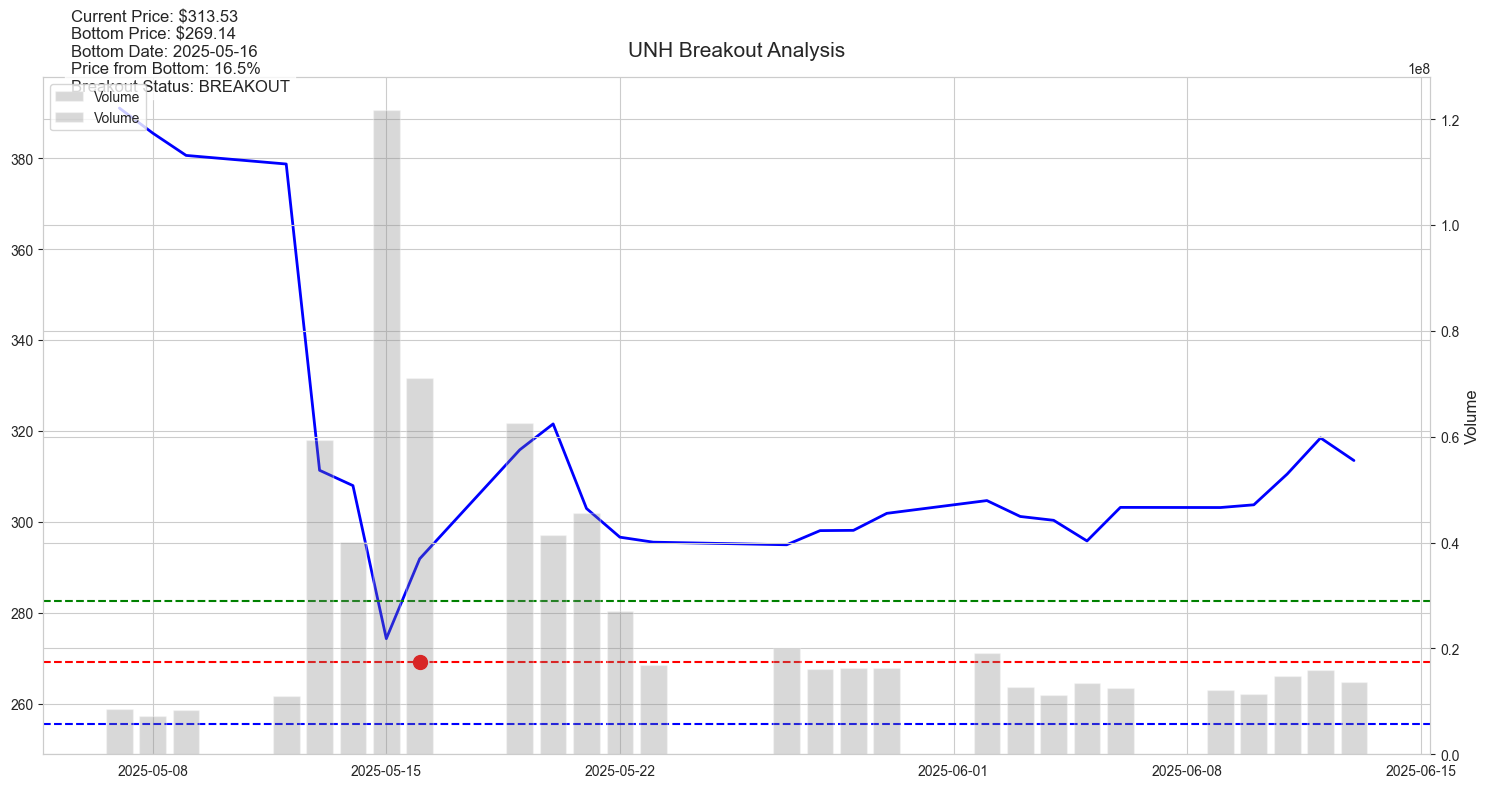




Analyzing PLTR...


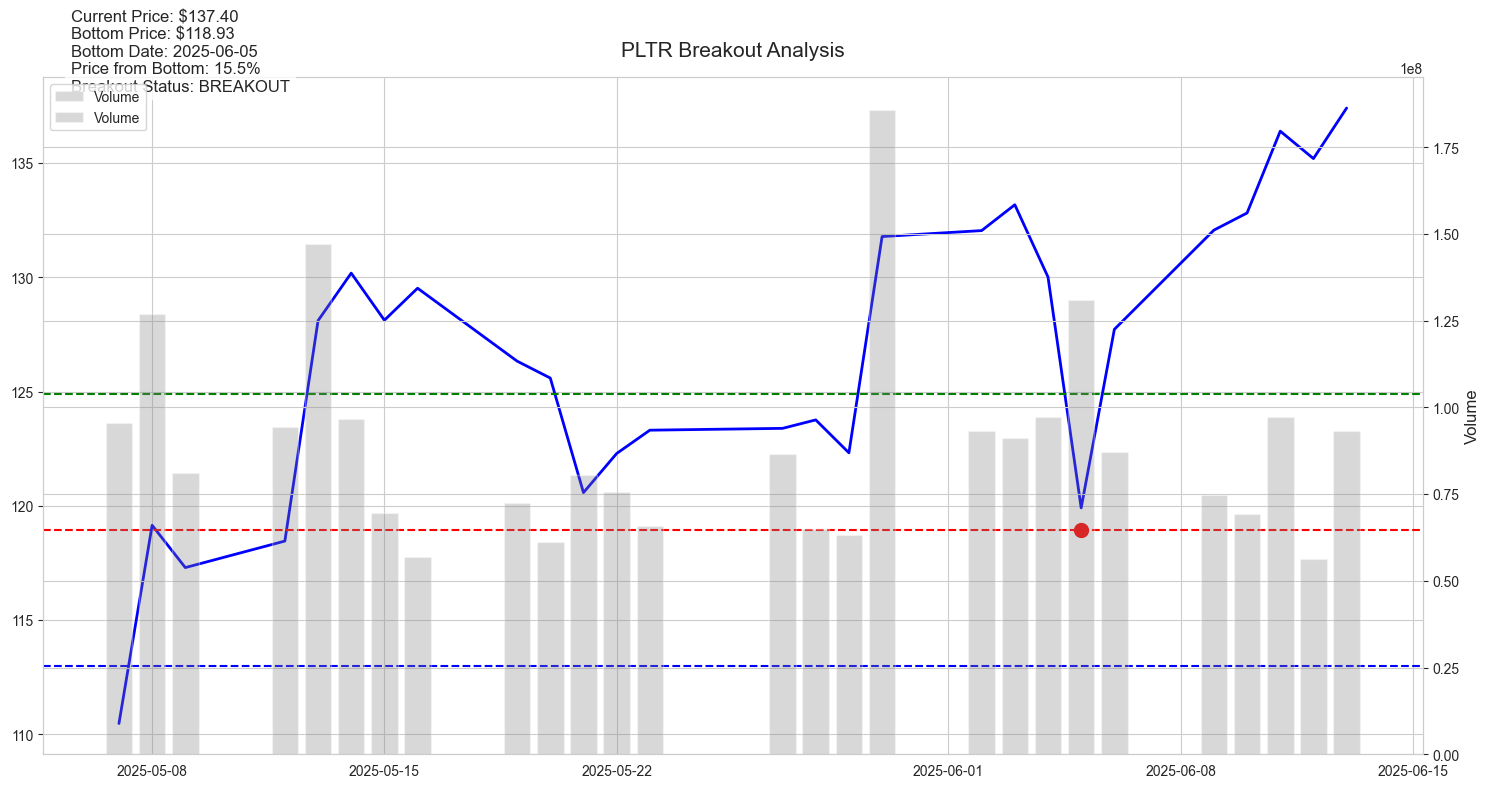




Analyzing WDC...


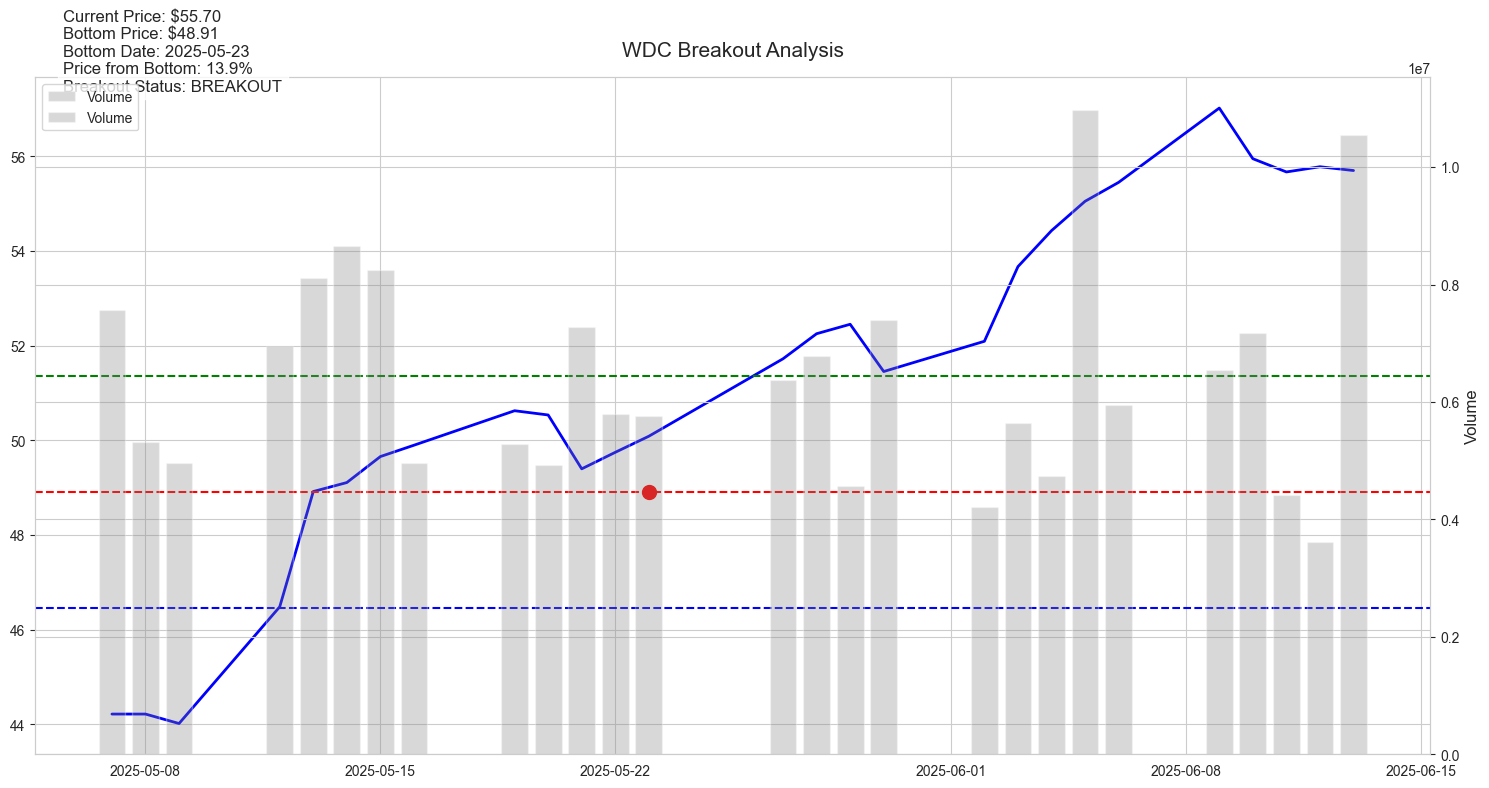




Analyzing CVS...


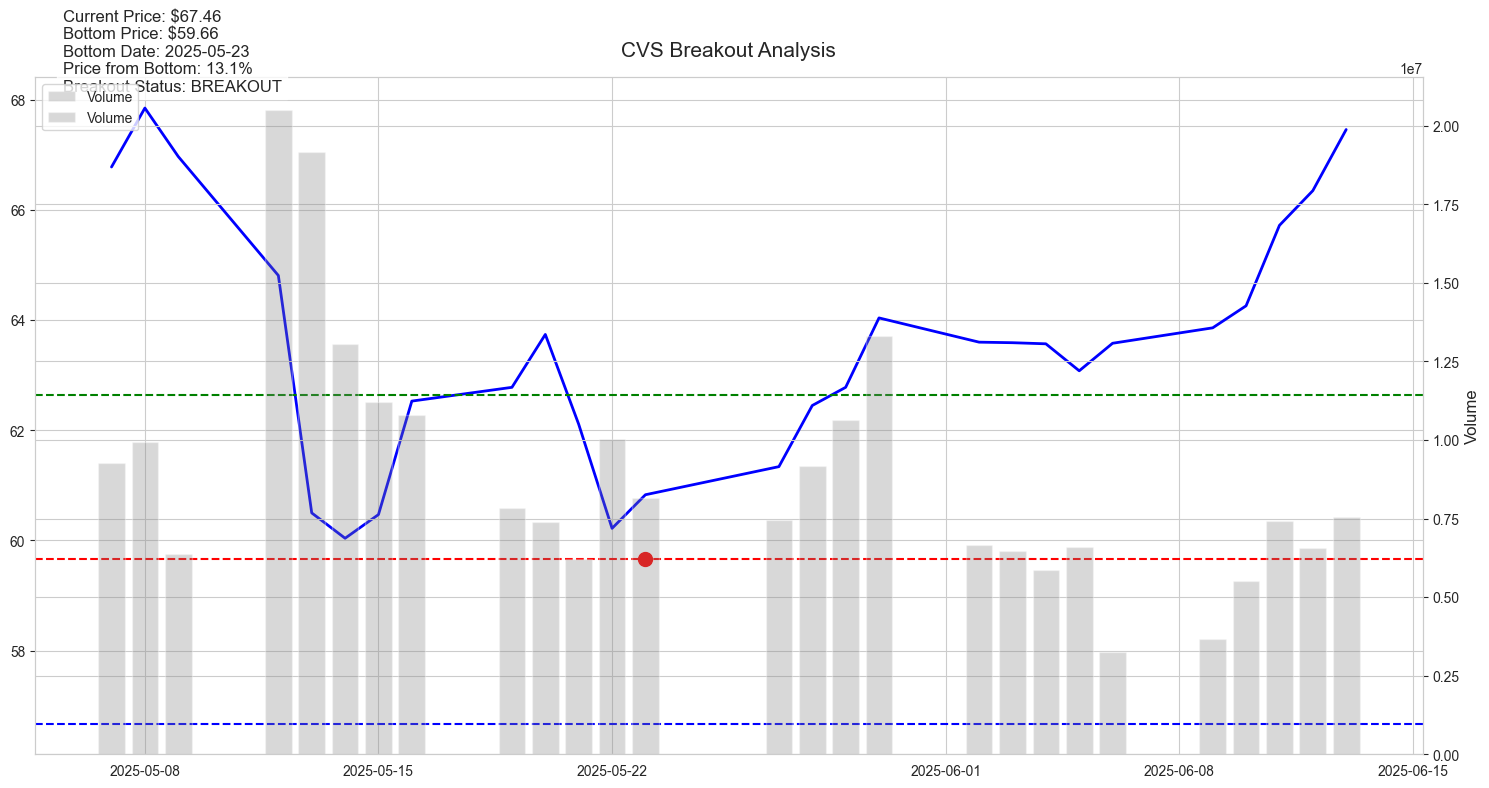




Analyzing CRL...


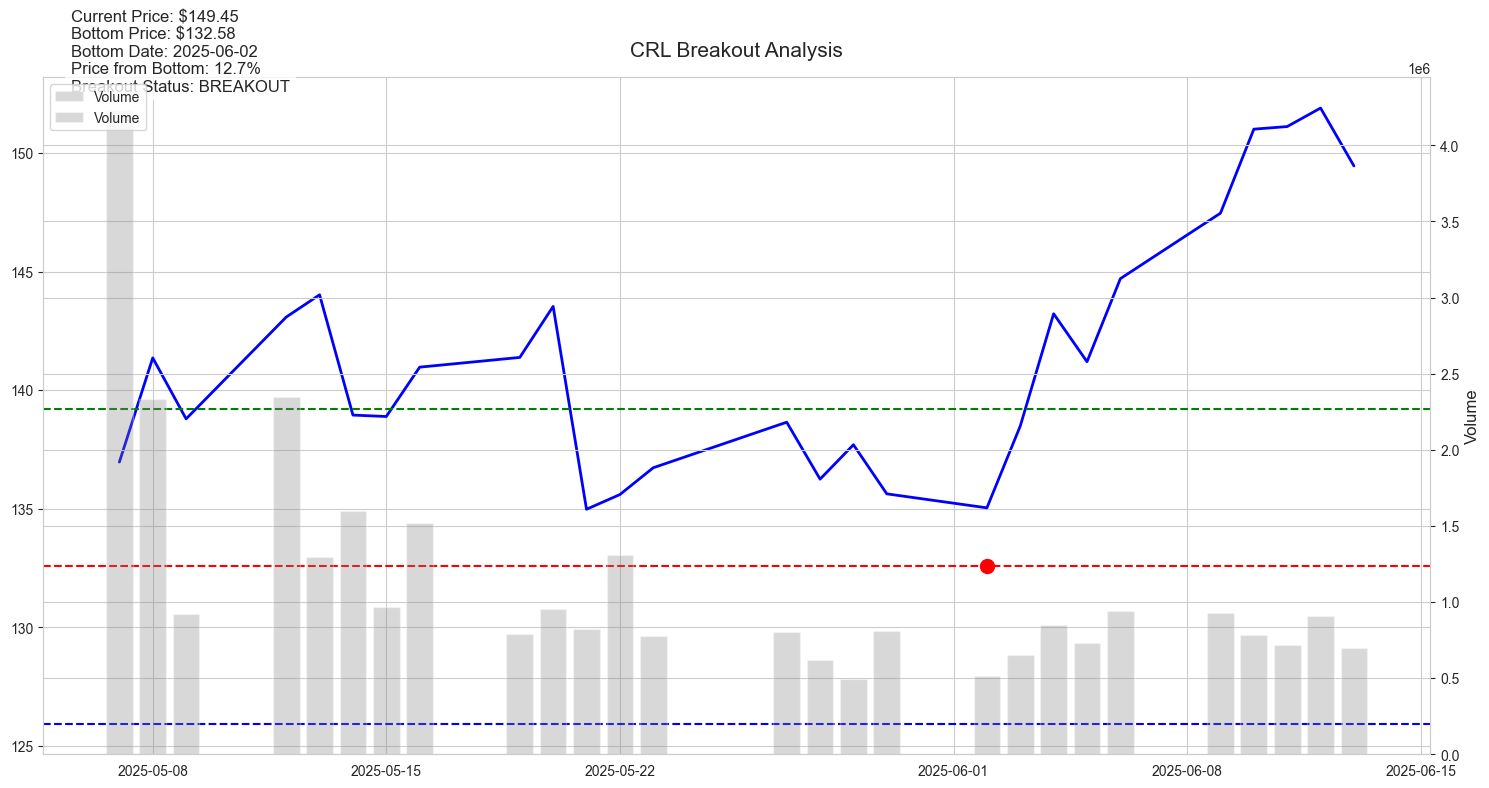




Analyzing MRNA...


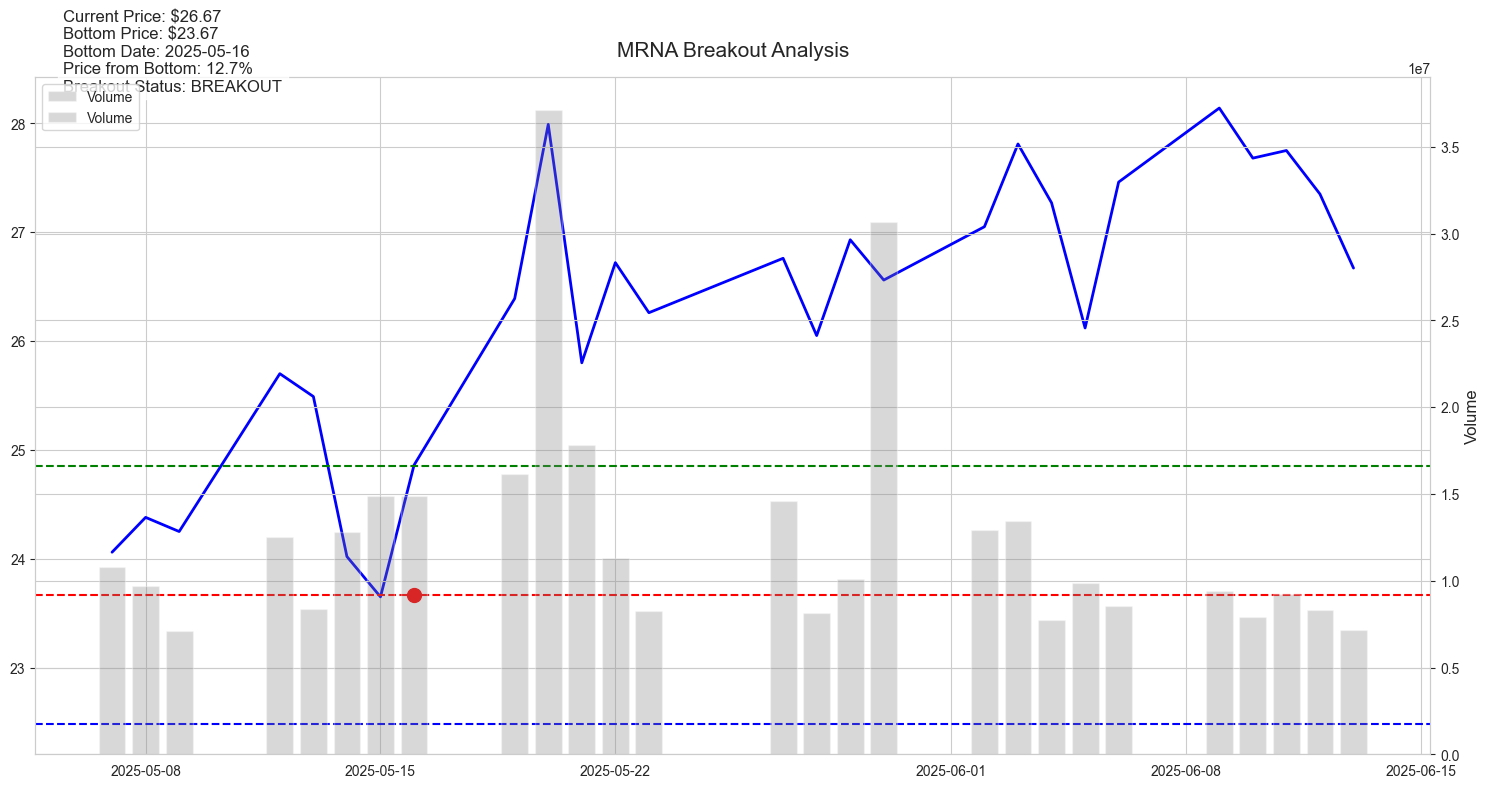




Analyzing LRCX...


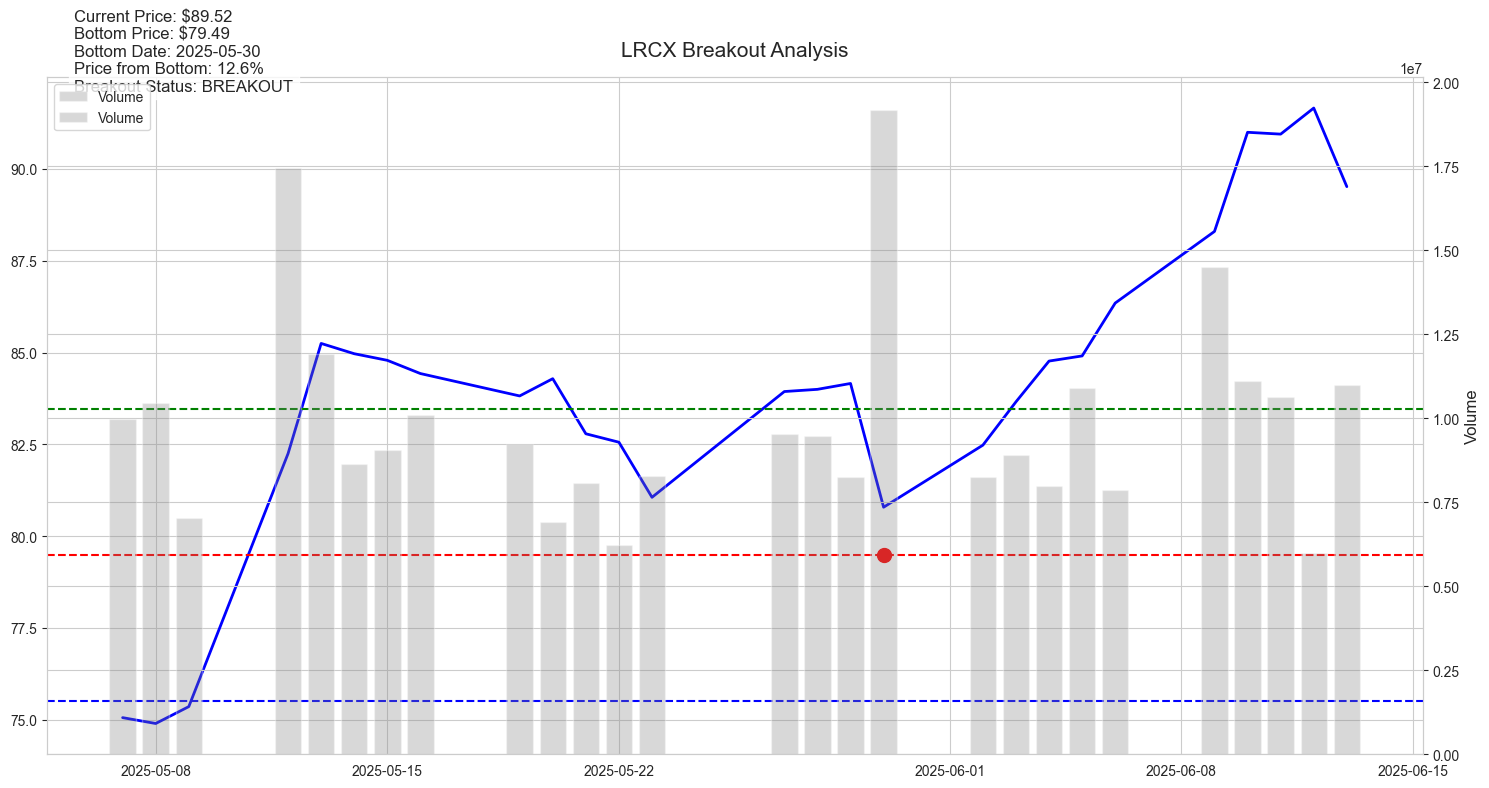




Analyzing TXN...


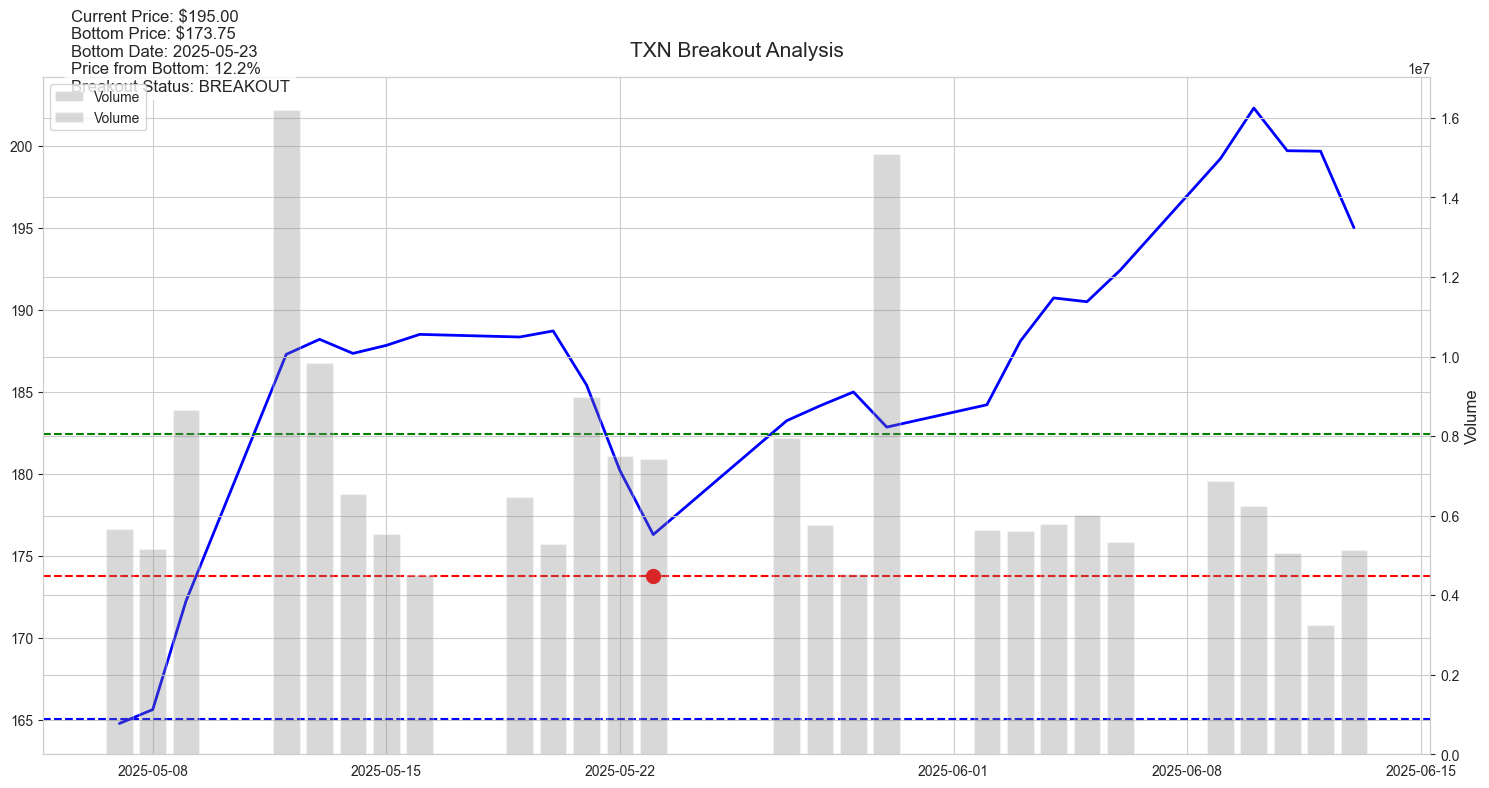




Analyzing AVGO...


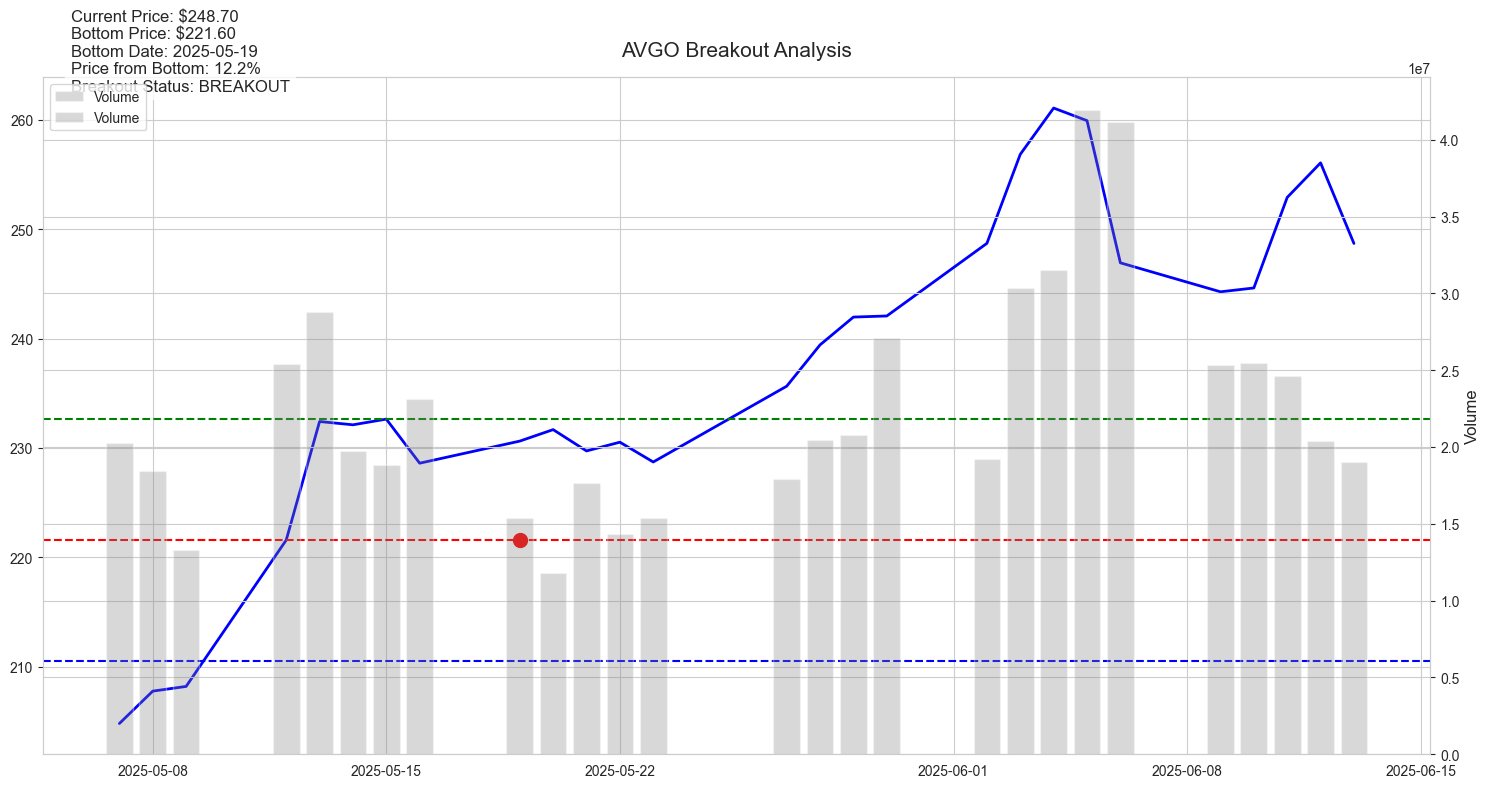




Analyzing NXPI...


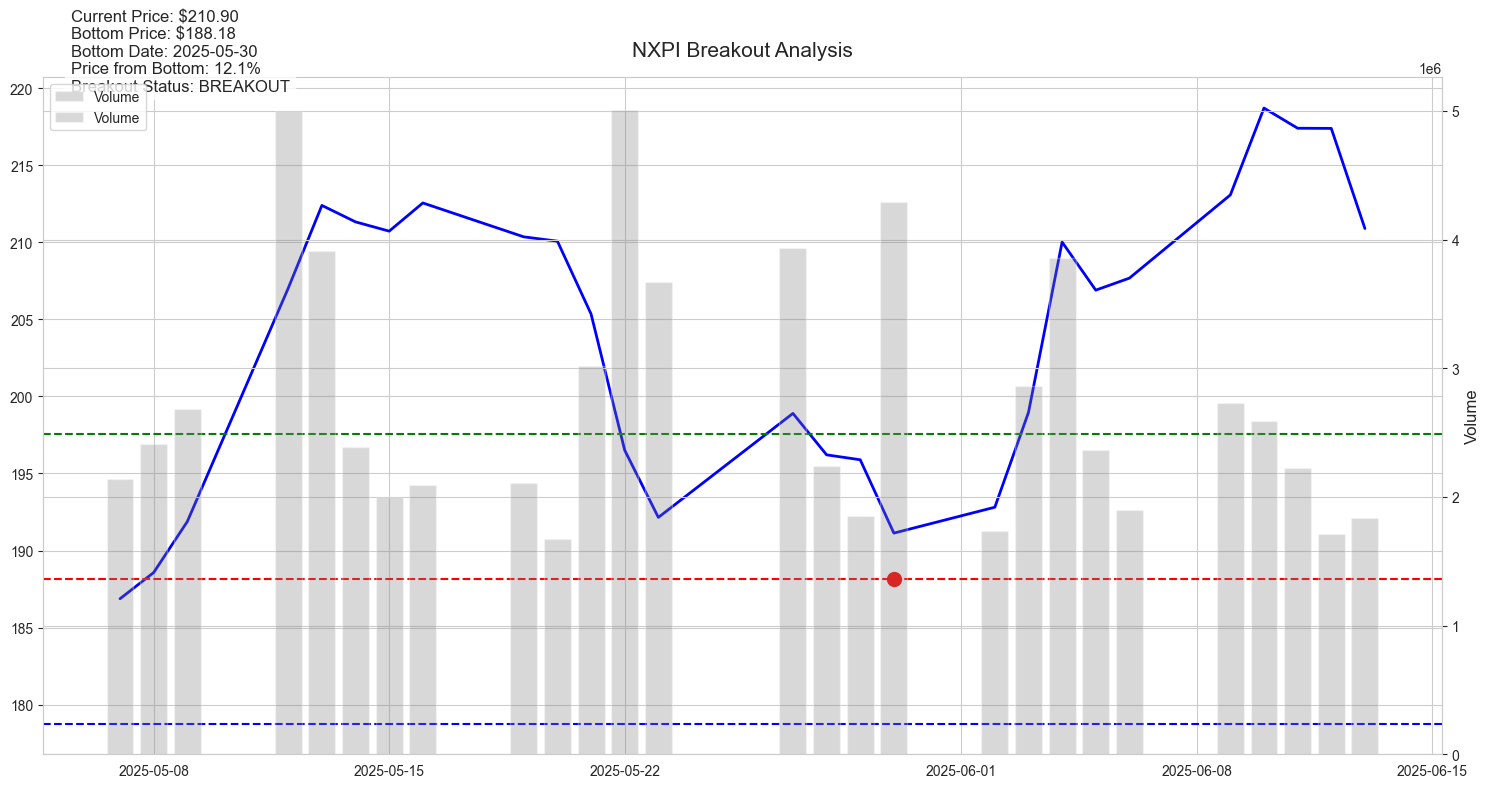




Analyzing CRWD...


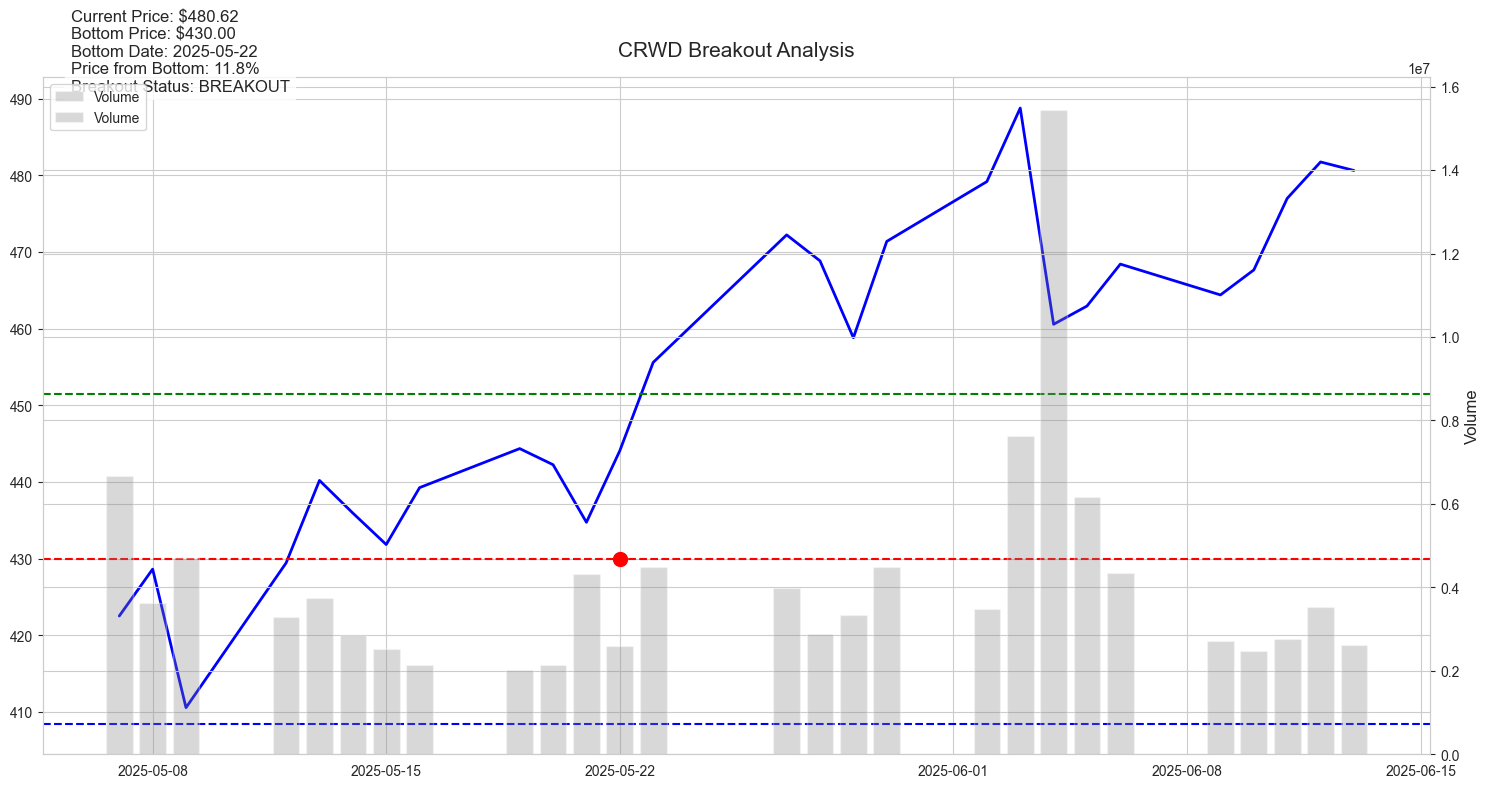




Analyzing AMAT...


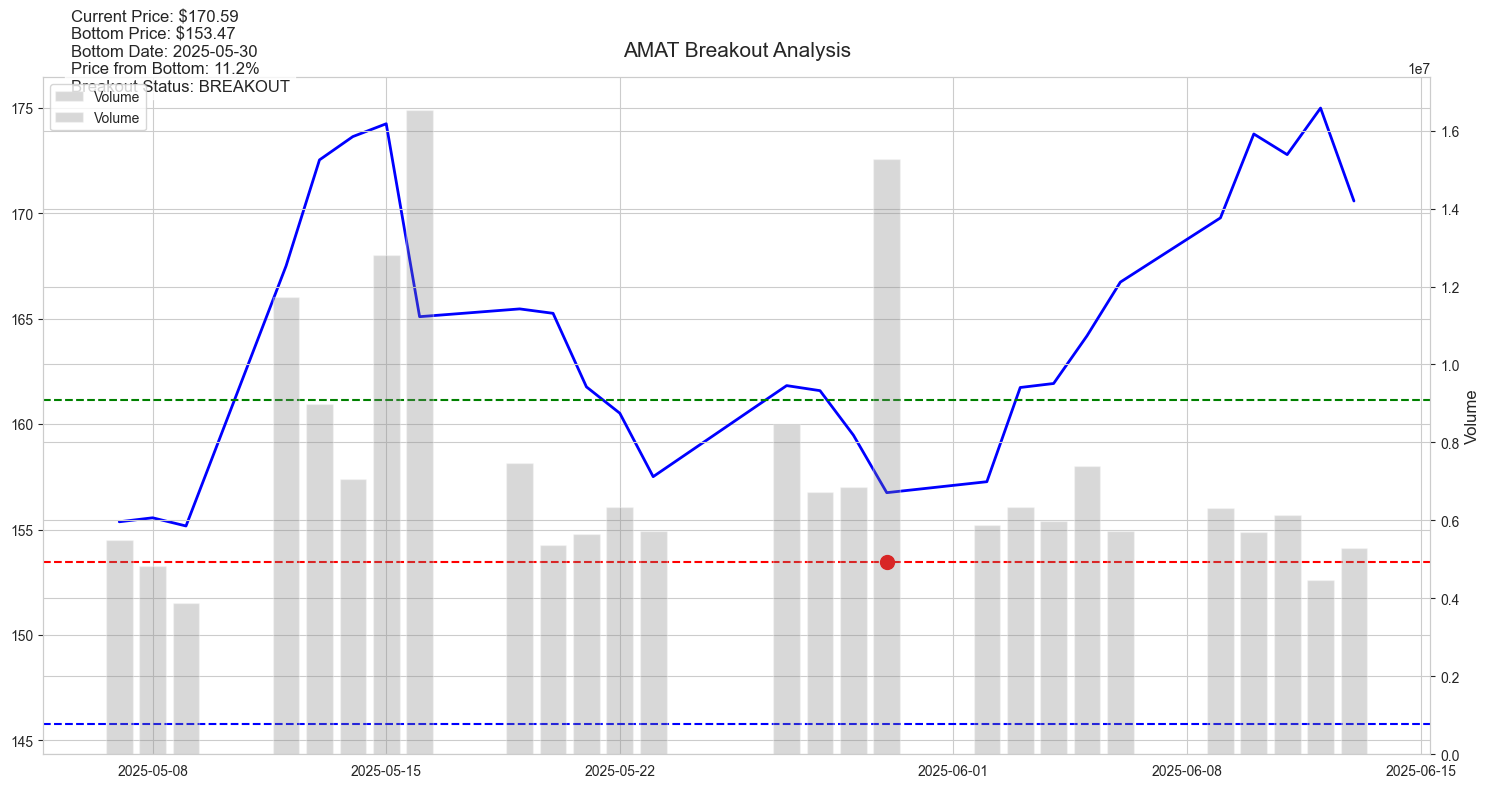




Analyzing APH...


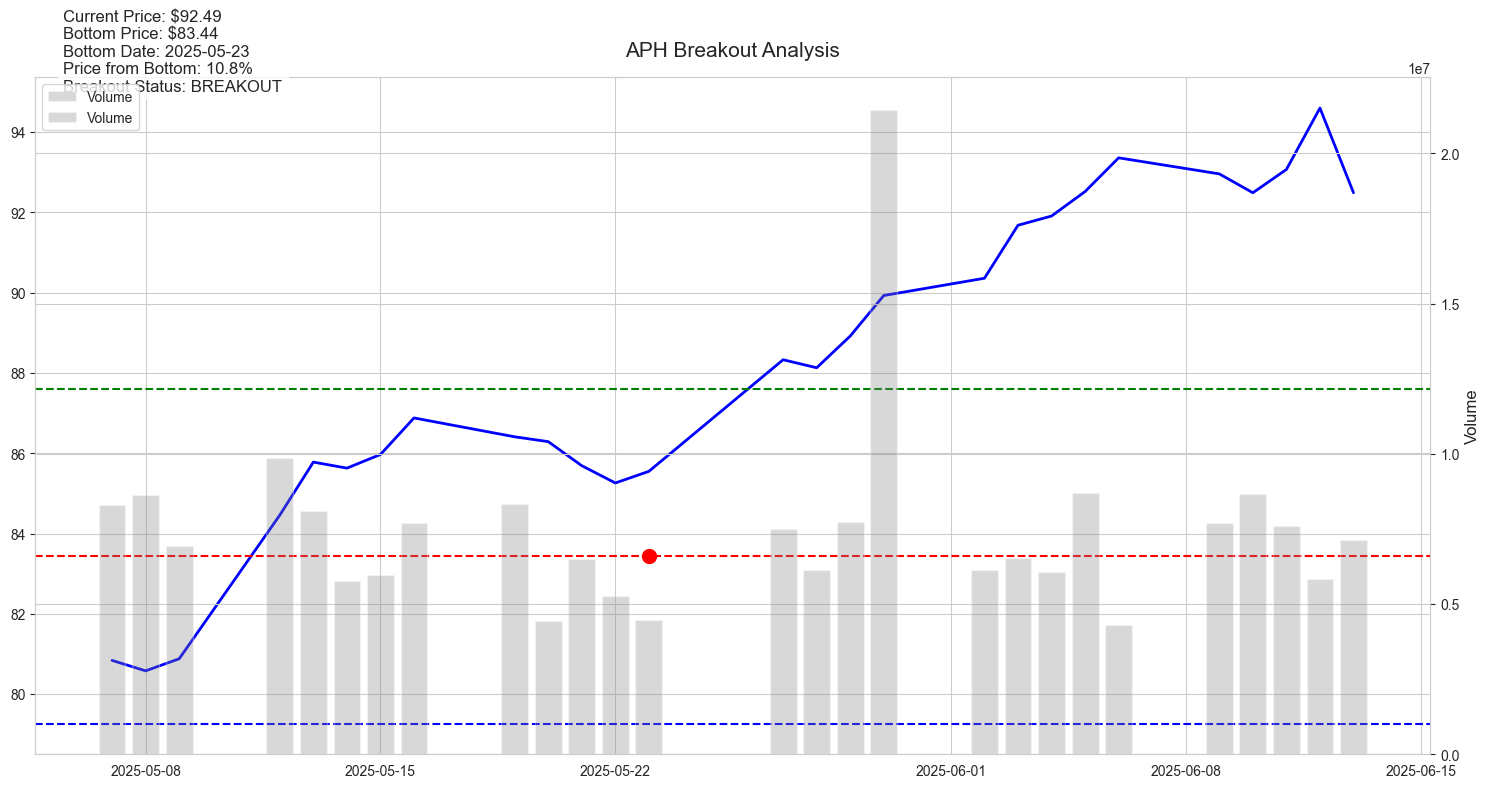




Analyzing GILD...


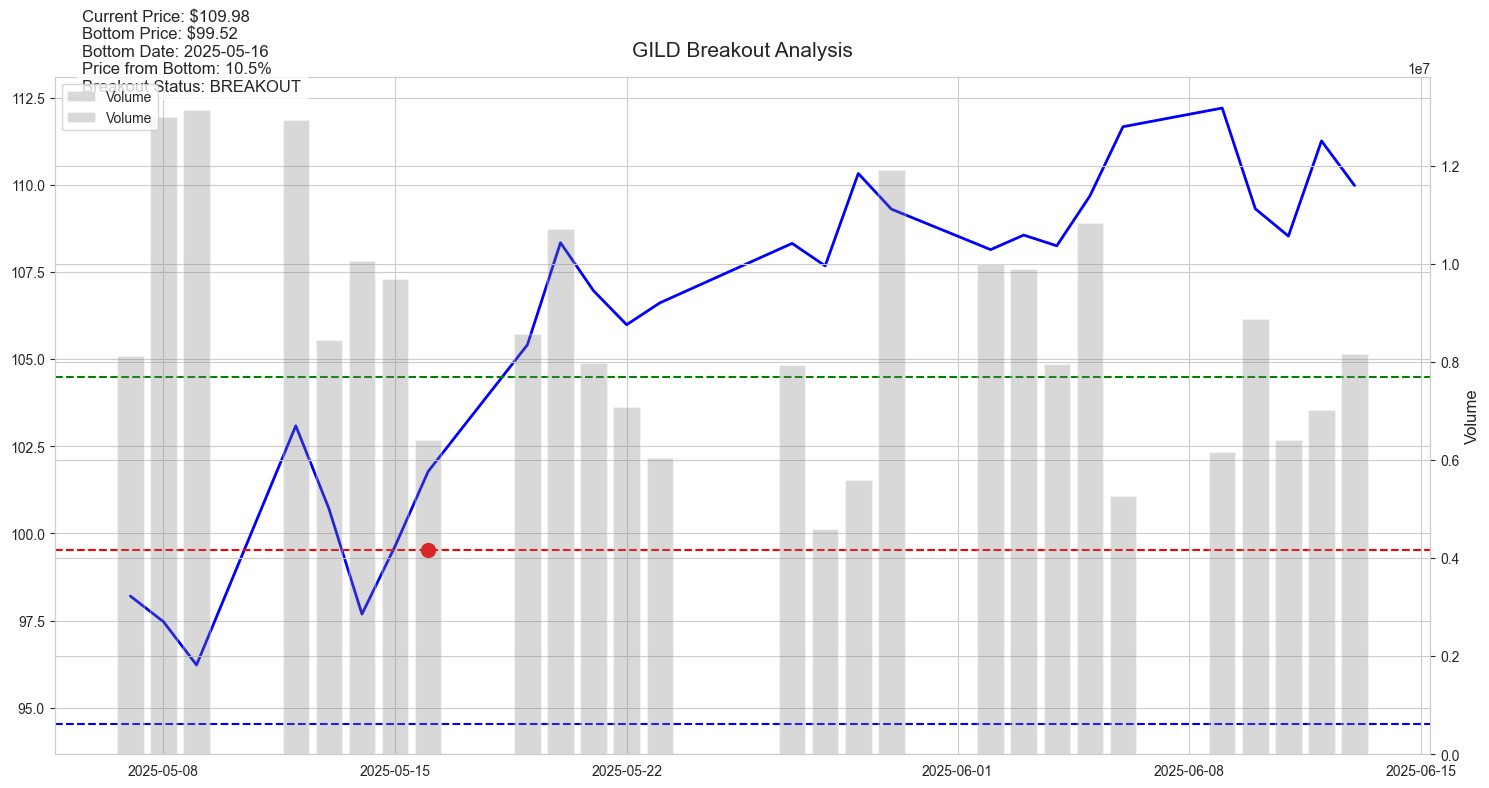




Analyzing AMGN...


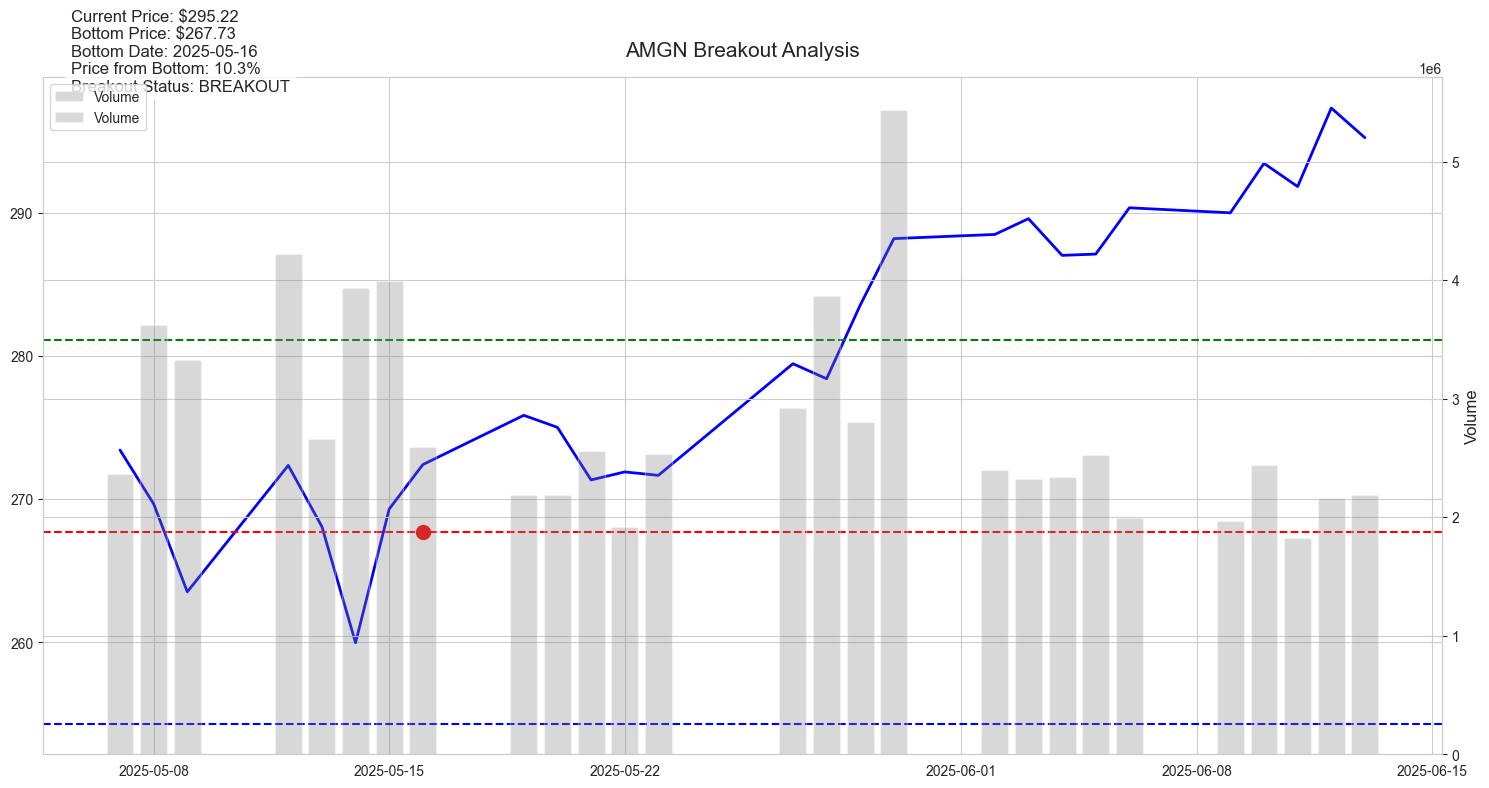




Analyzing ANET...


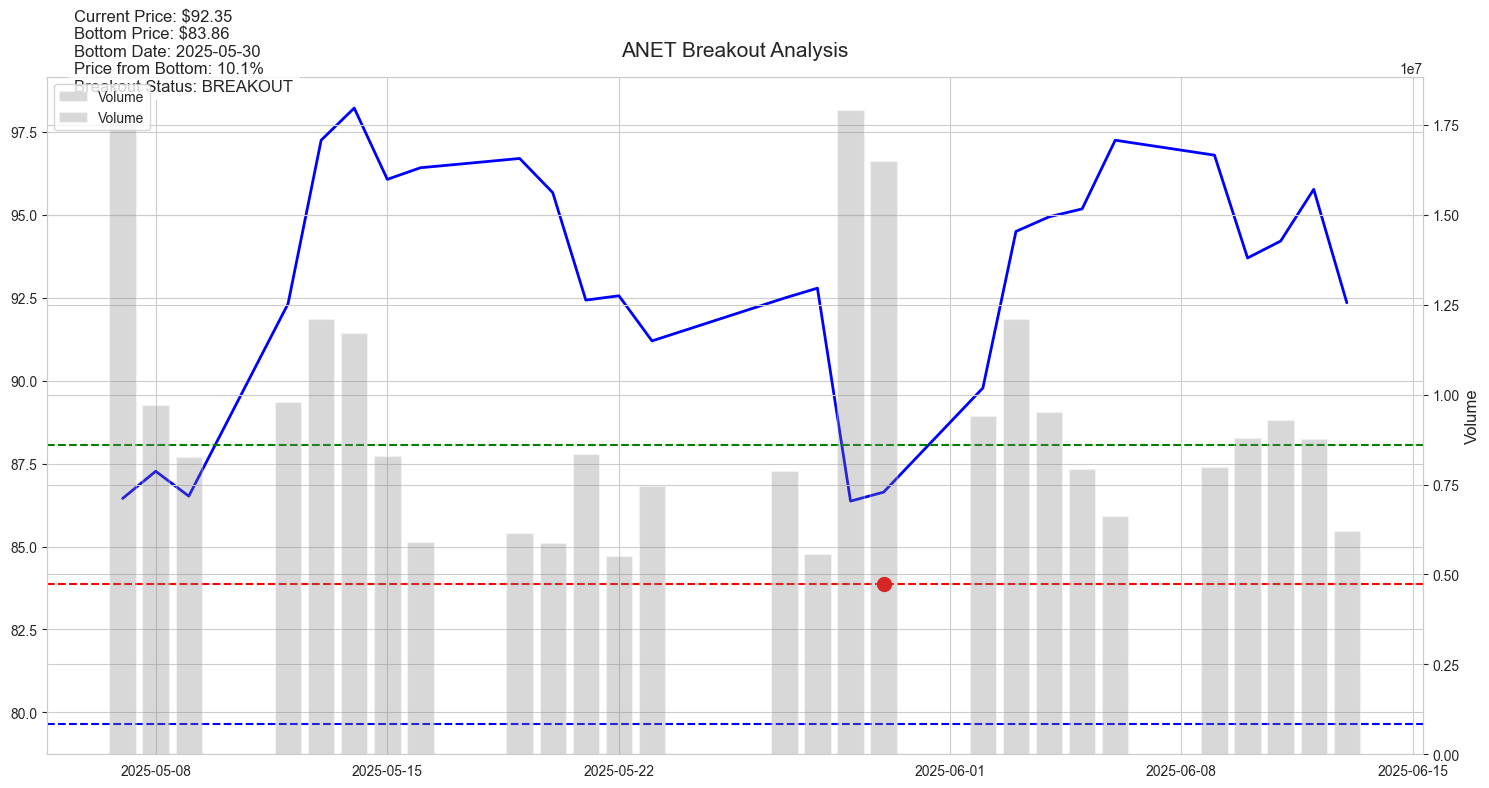




Analyzing NVDA...


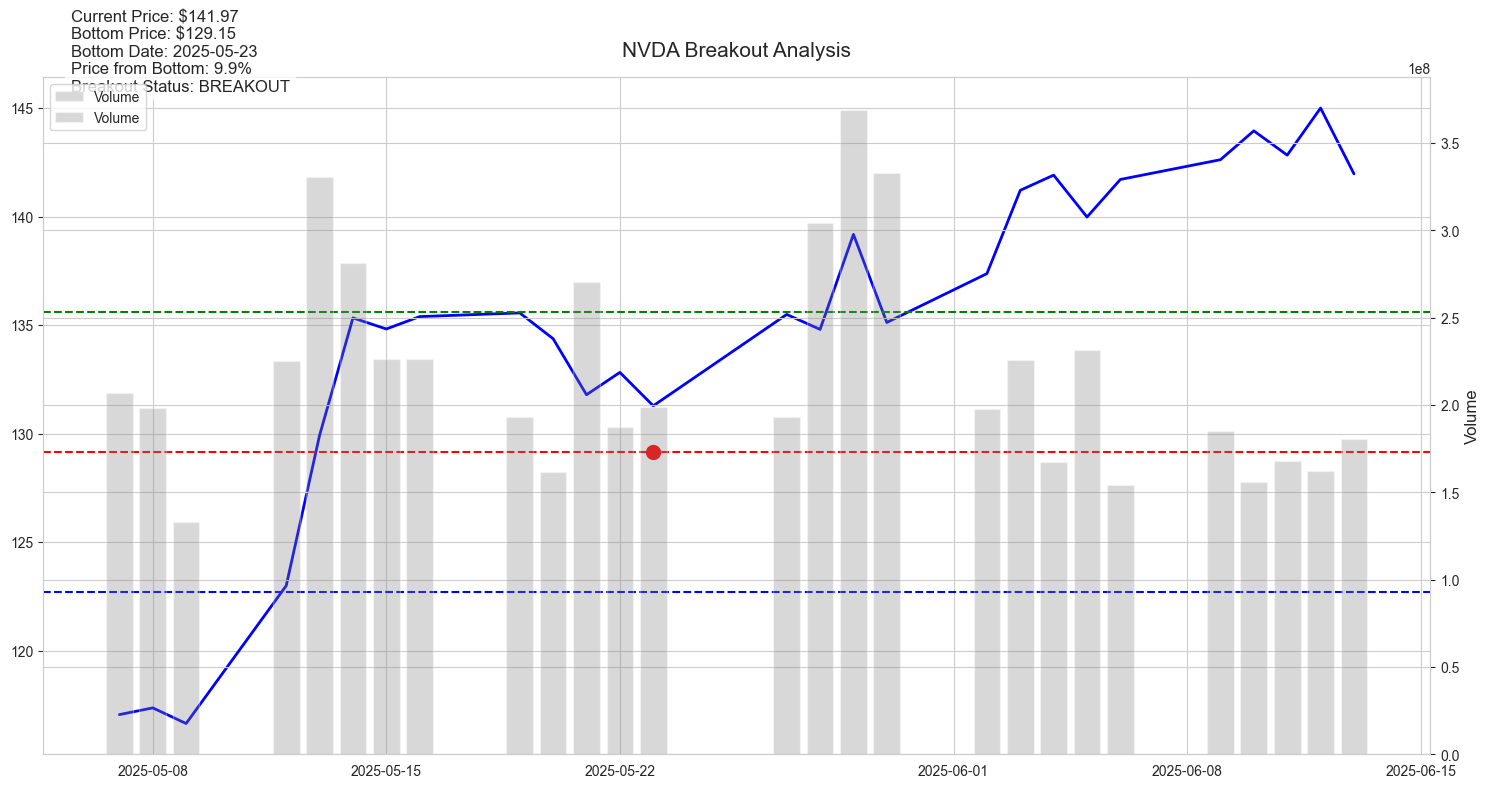




Analyzing MRK...


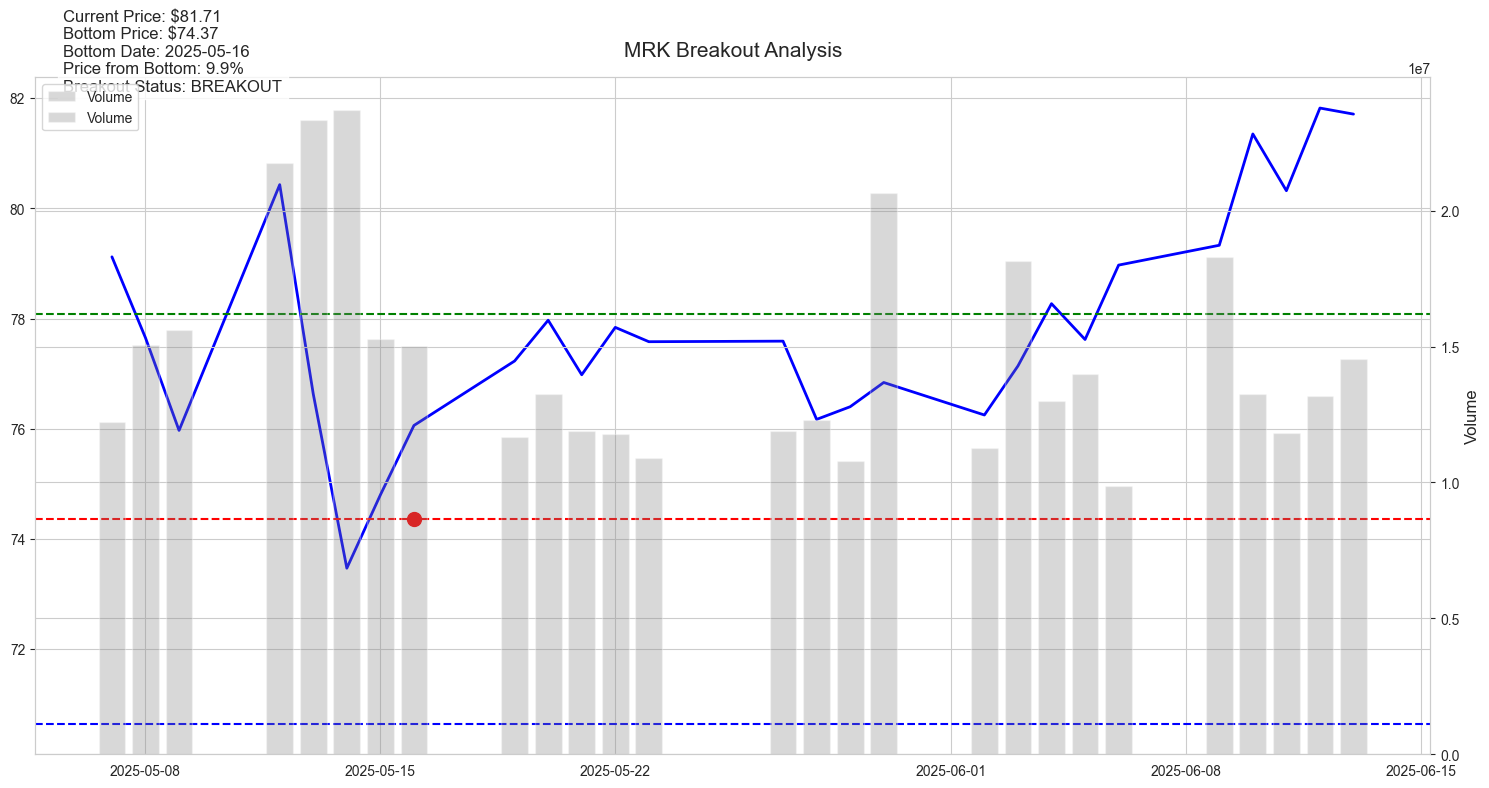




Analyzing PANW...


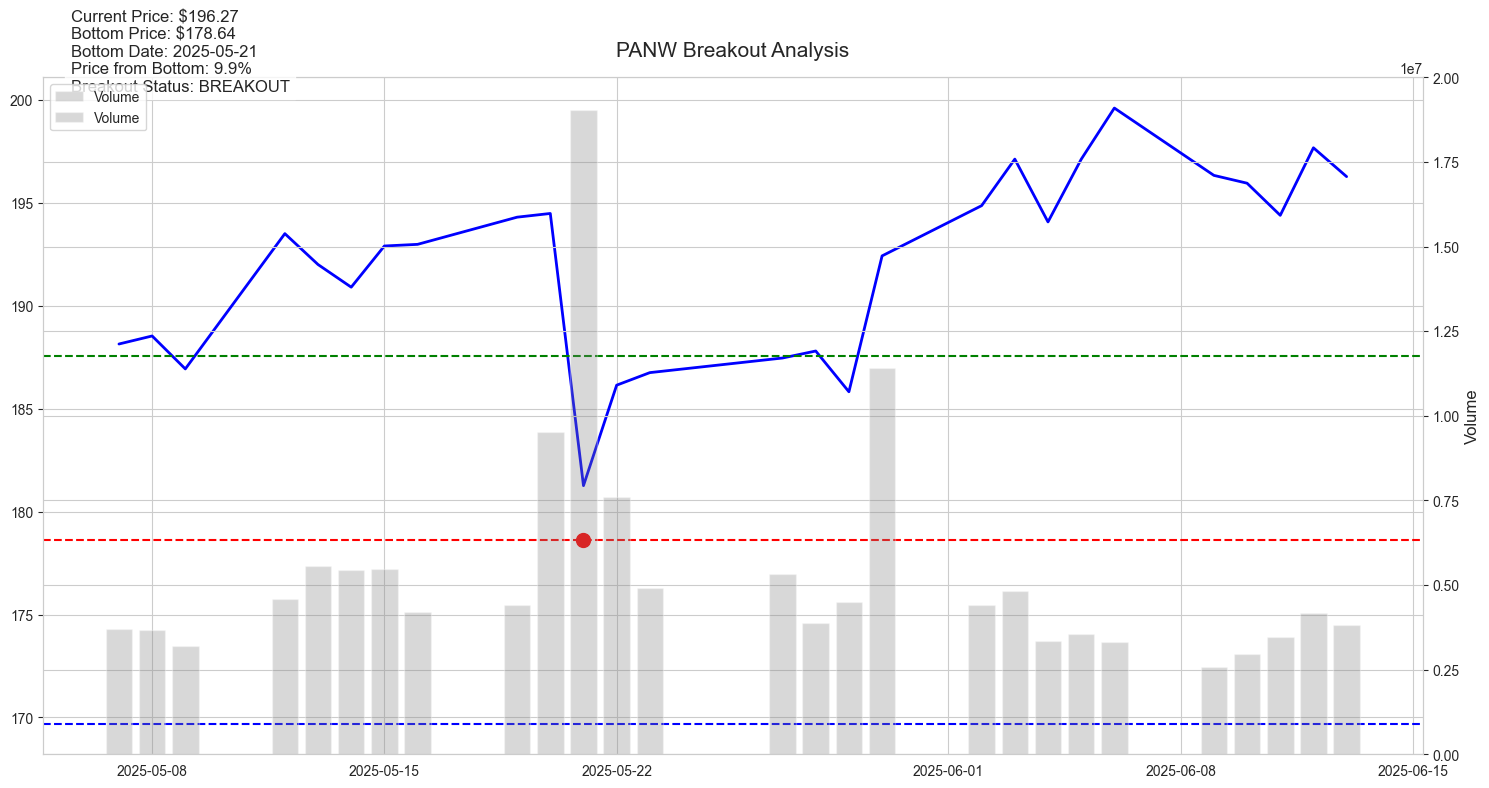




Analyzing QCOM...


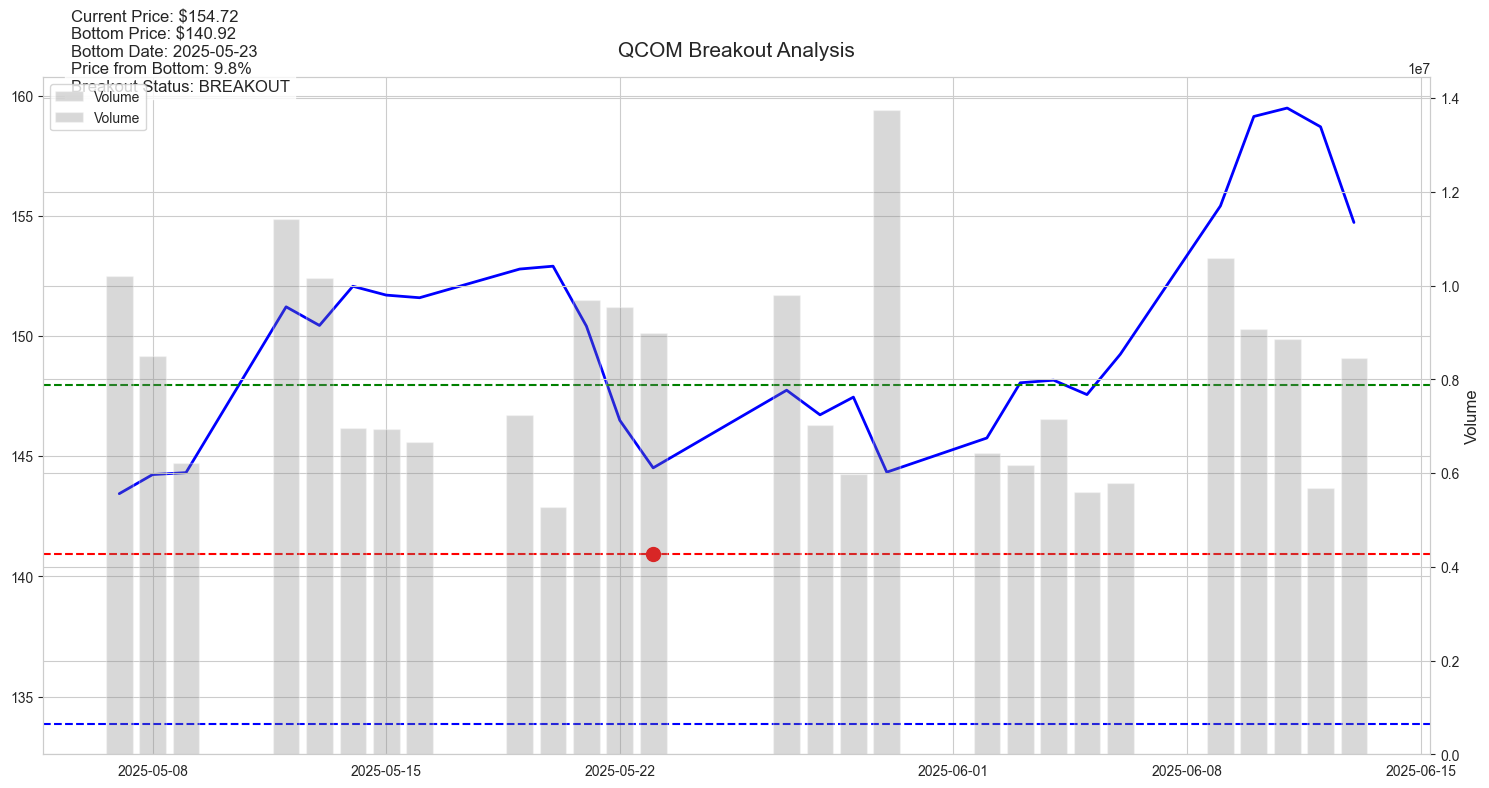




Analyzing ADI...


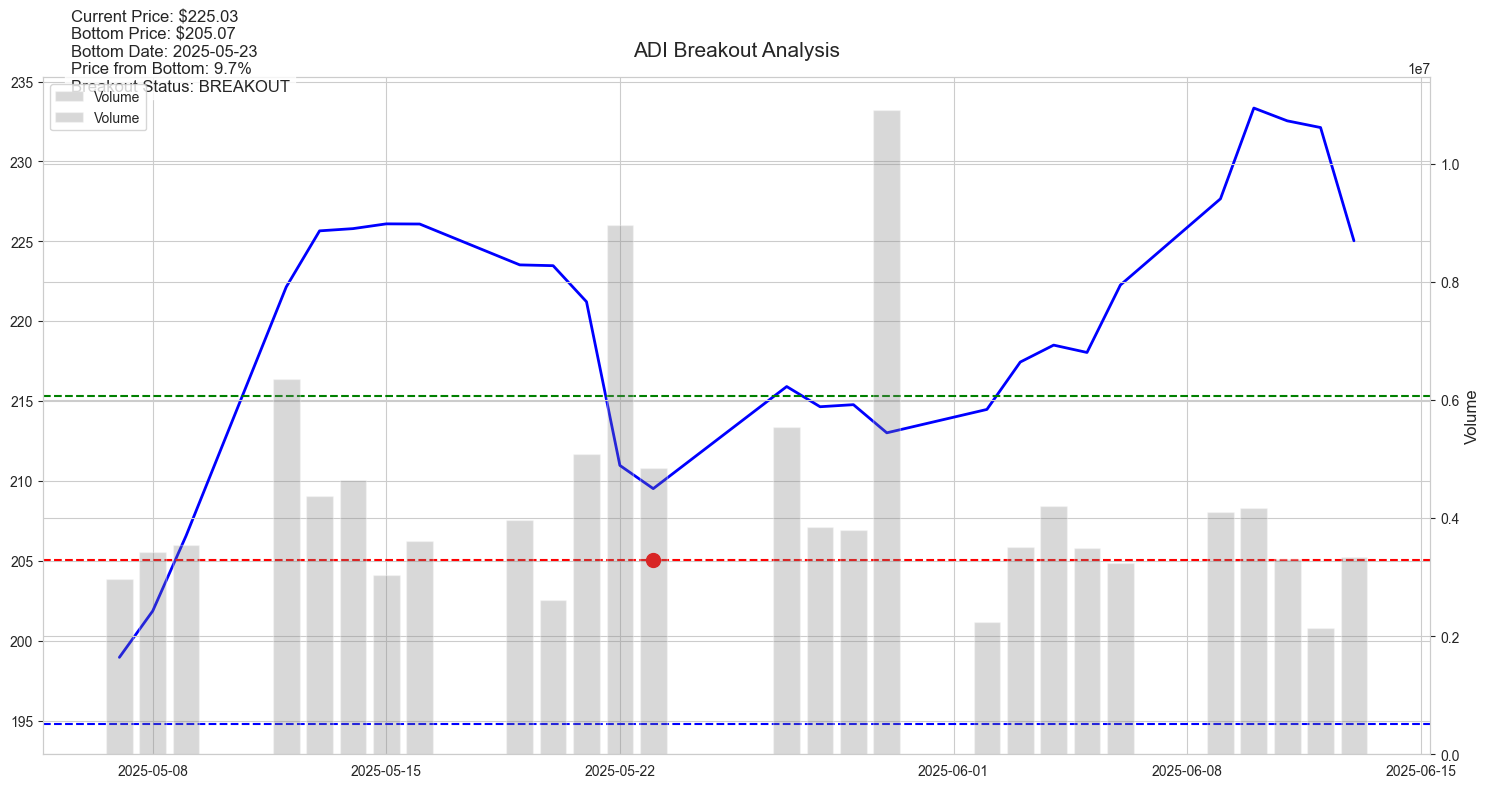




Analyzing TECH...


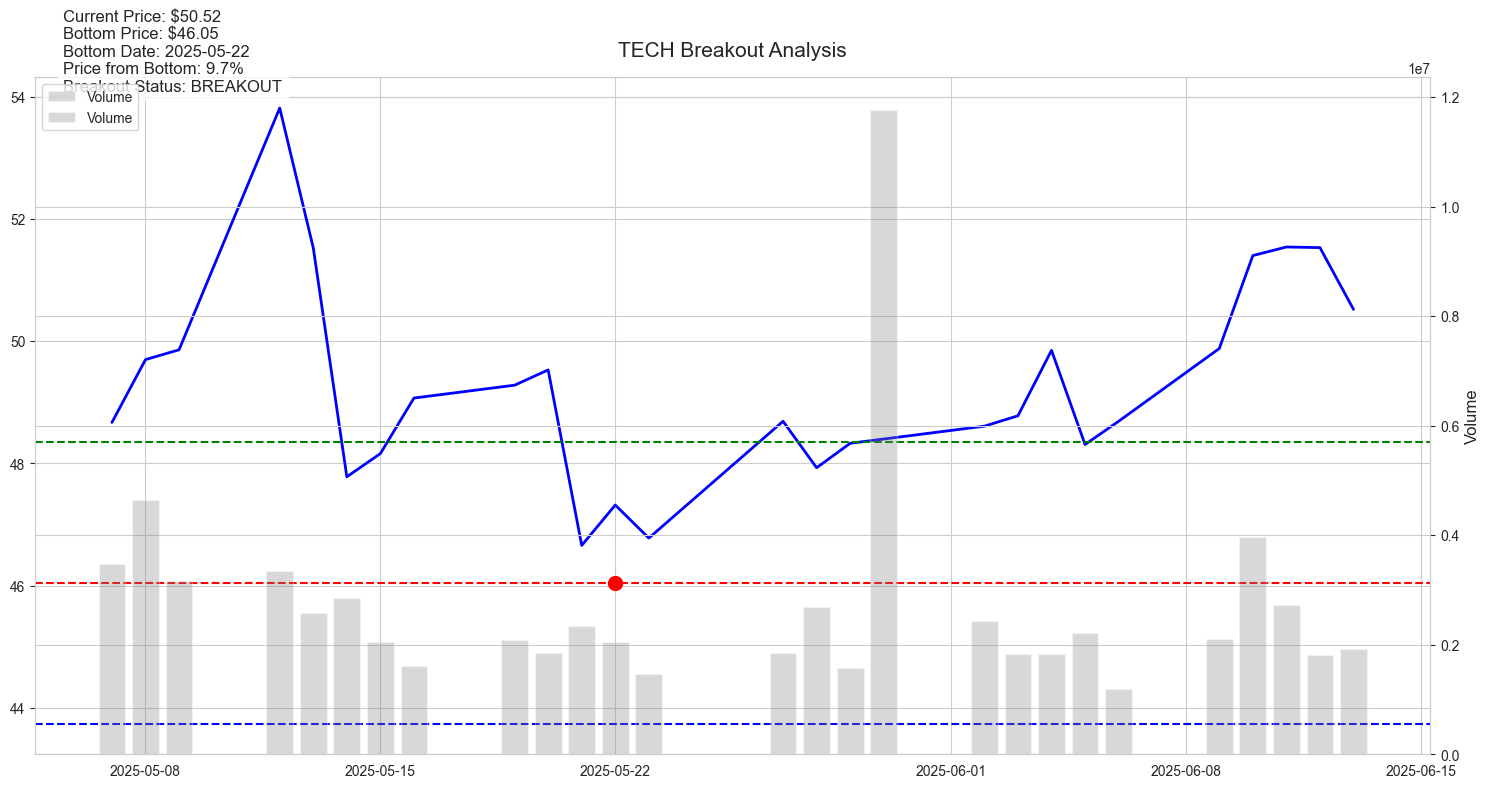




Analyzing DHR...


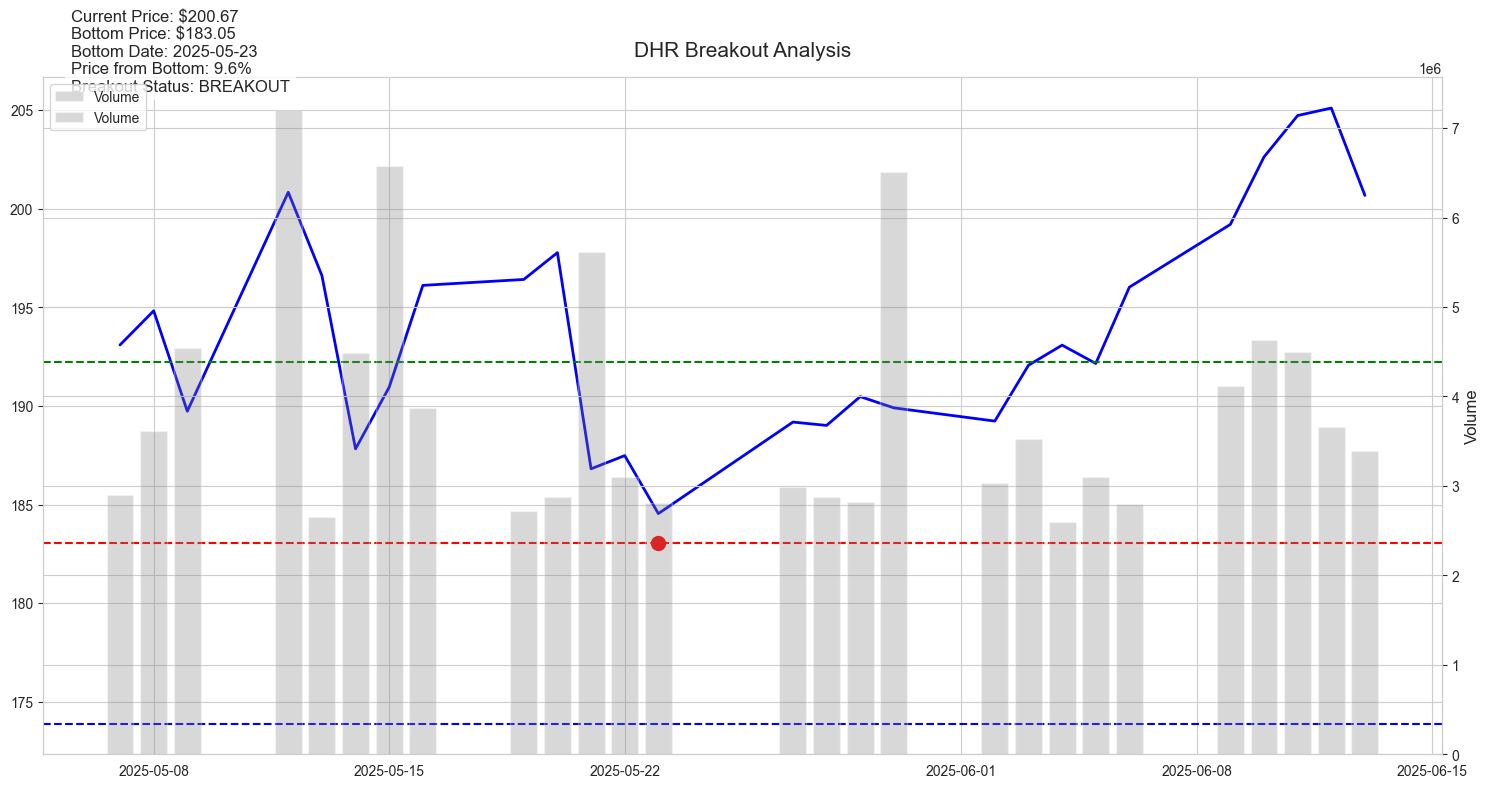




Analyzing GEN...


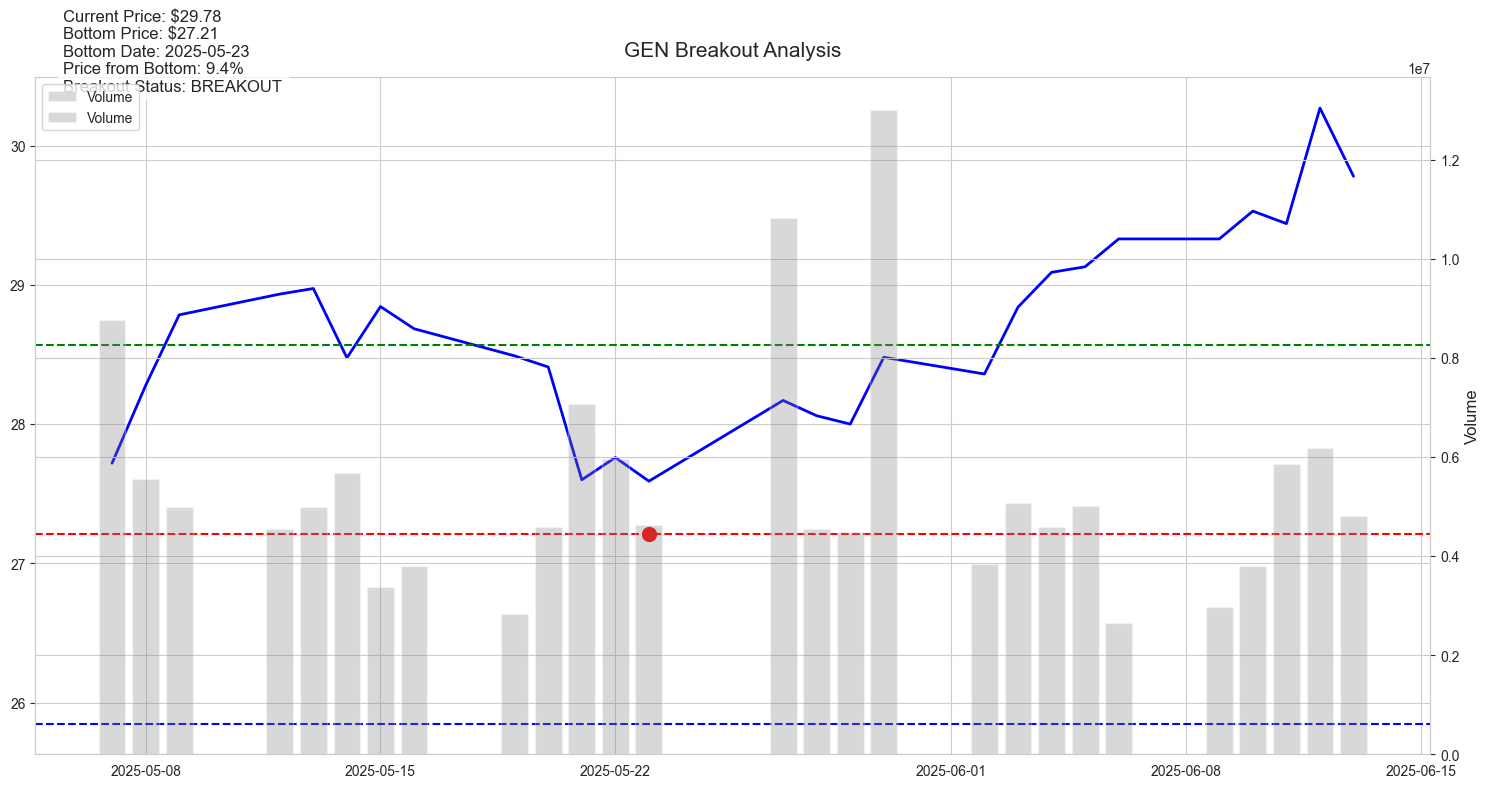




Analyzing SNPS...


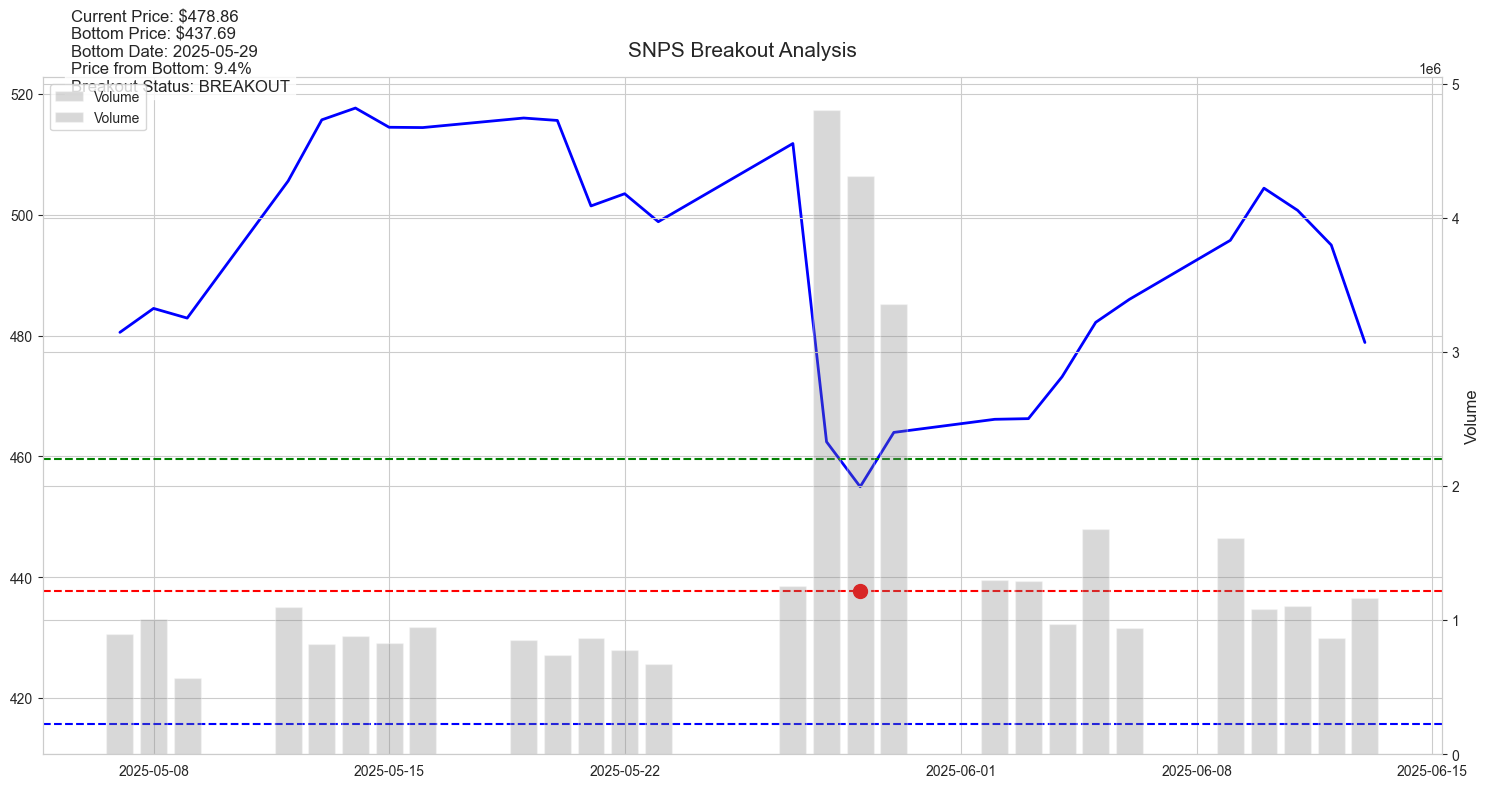




Analyzing A...


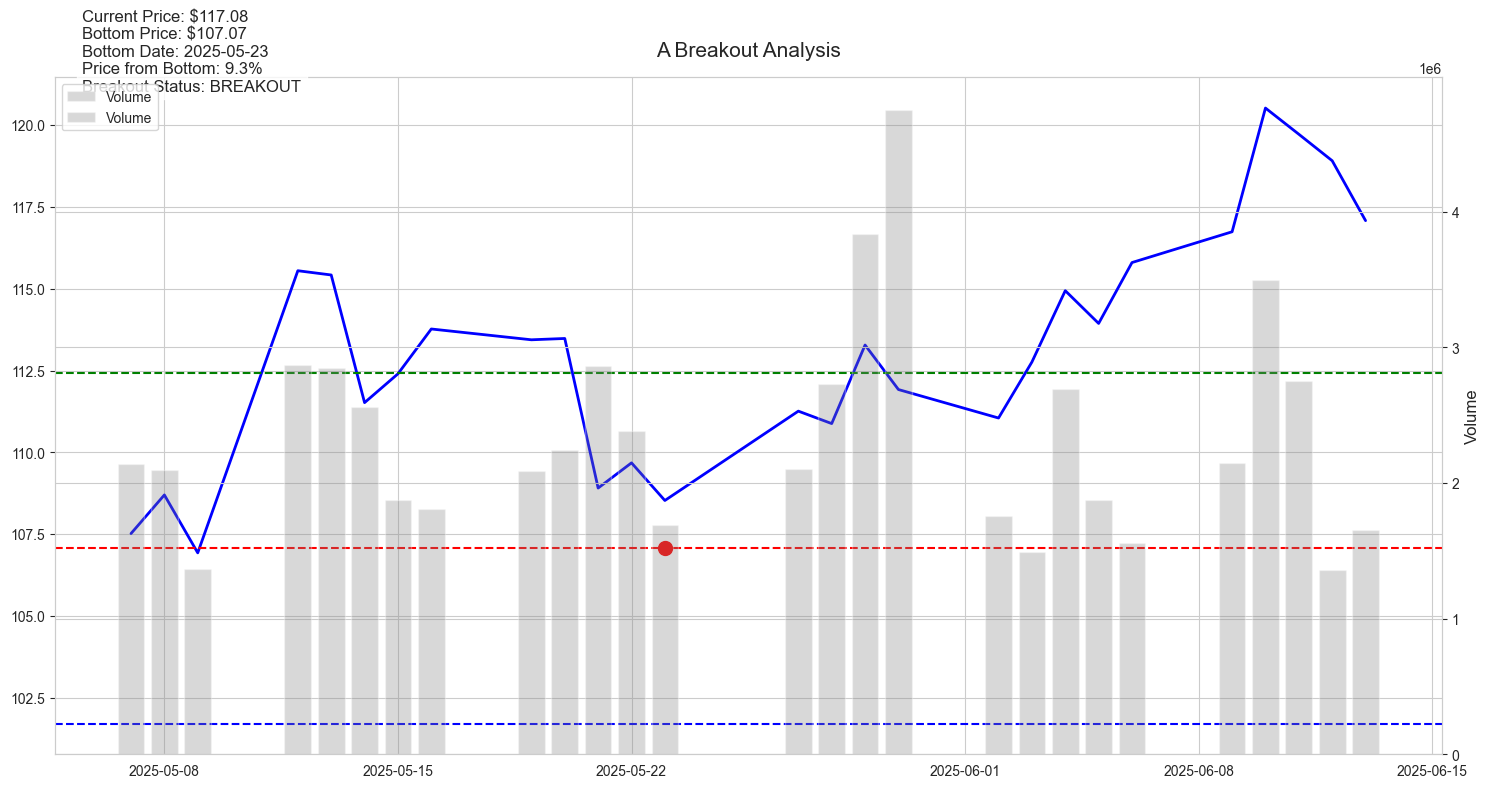




Analyzing TER...


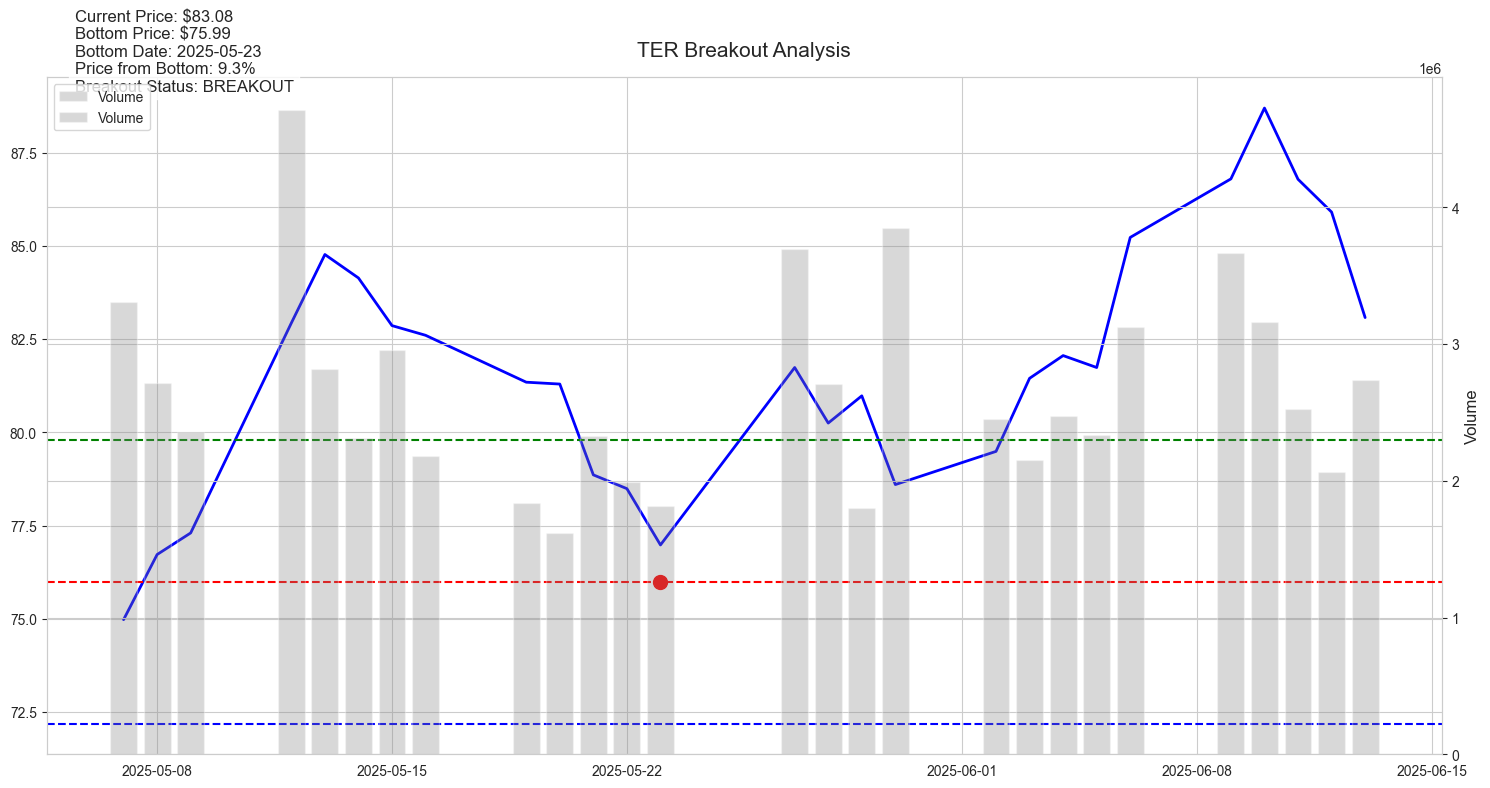




Analyzing PFE...


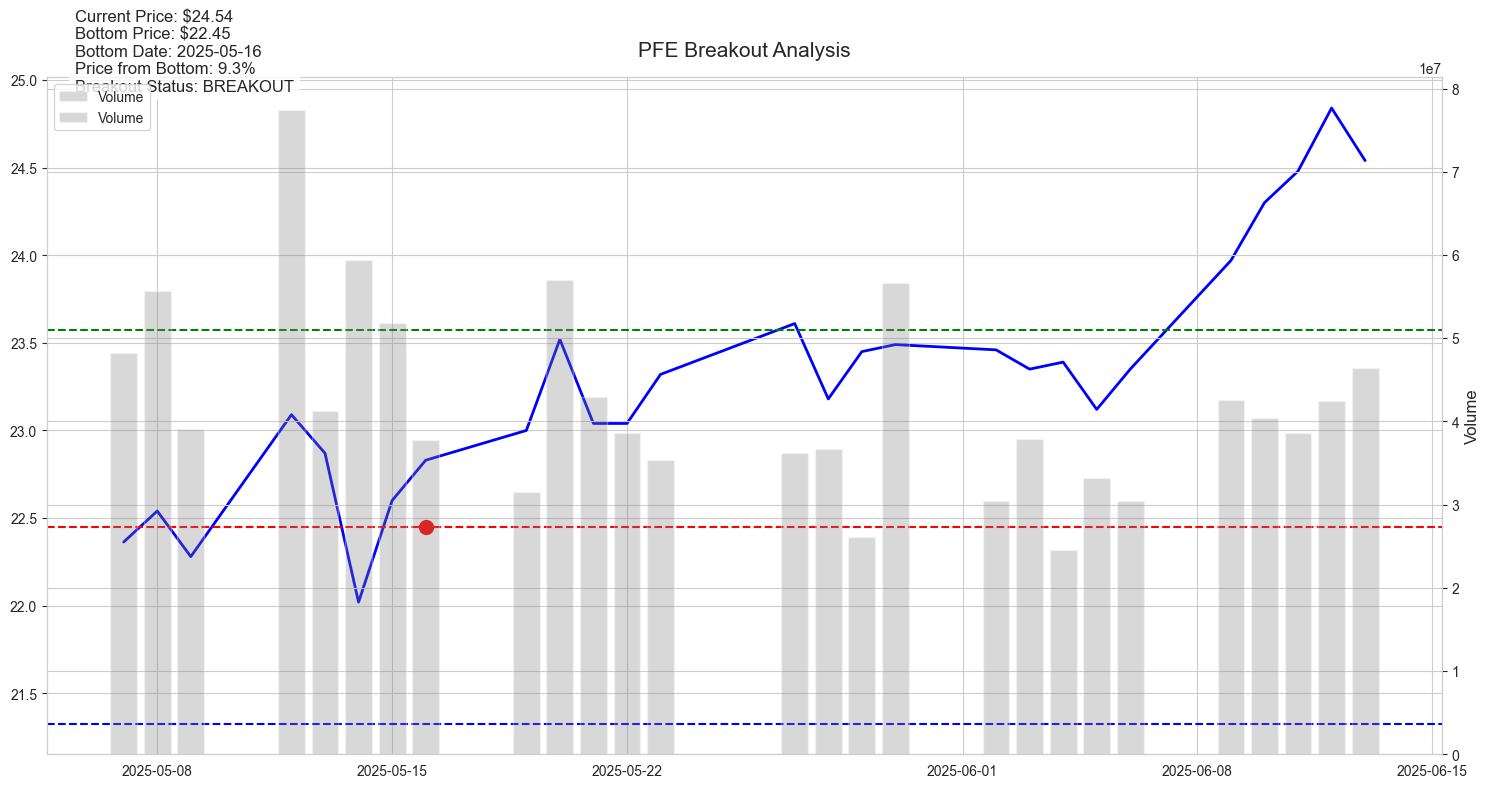




Analyzing LH...


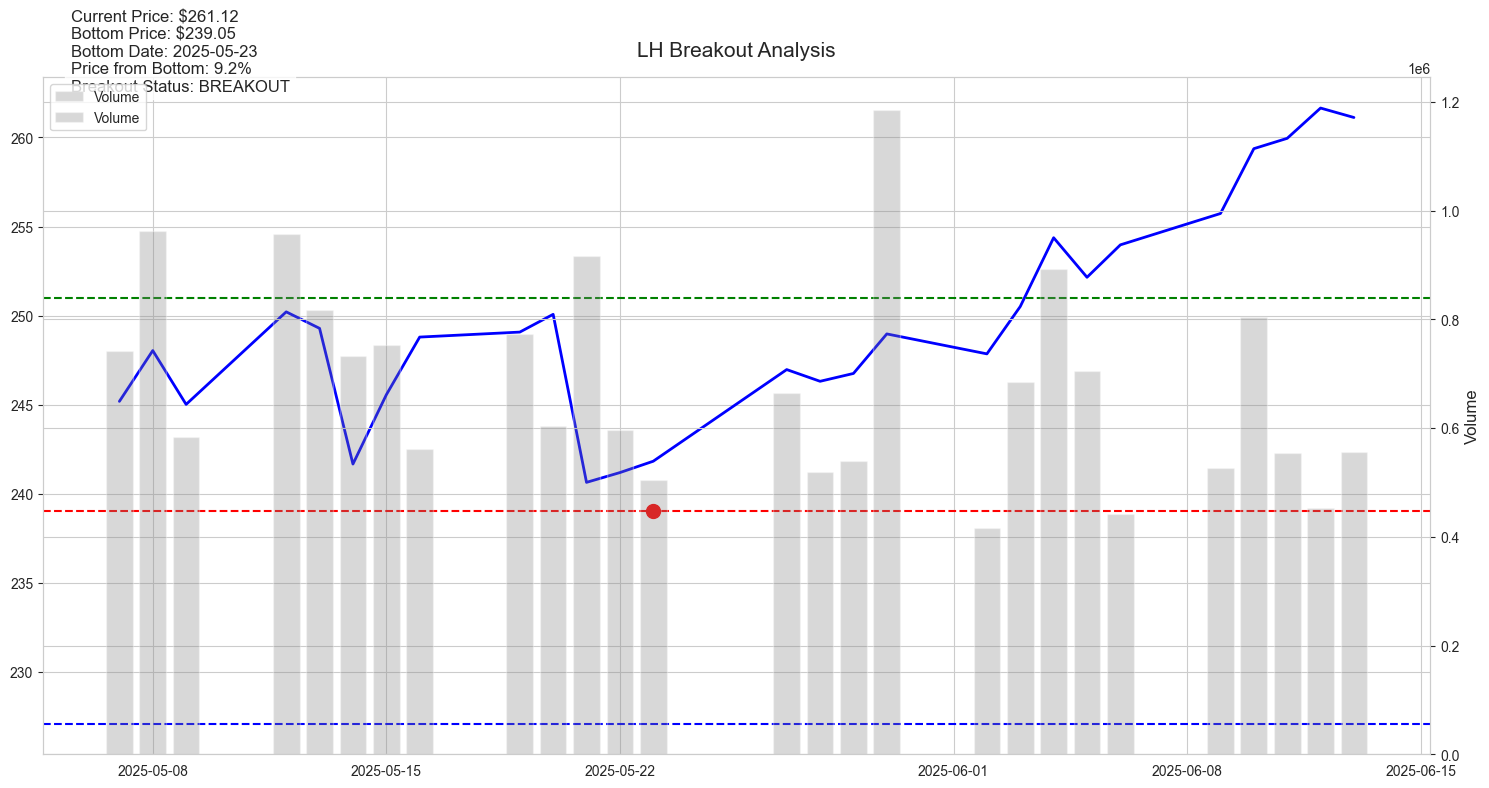




Analyzing MDT...


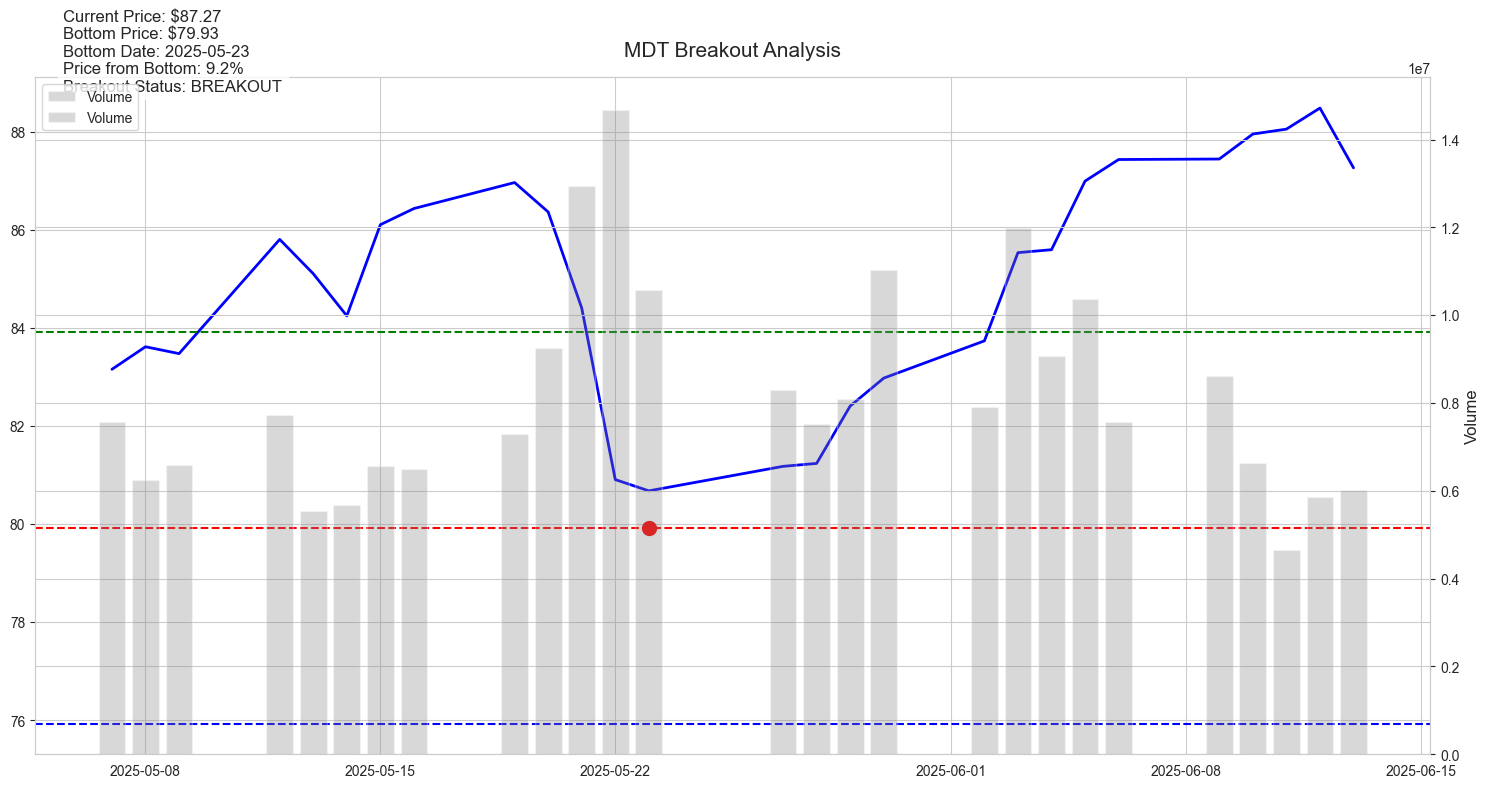




Analyzing JBL...


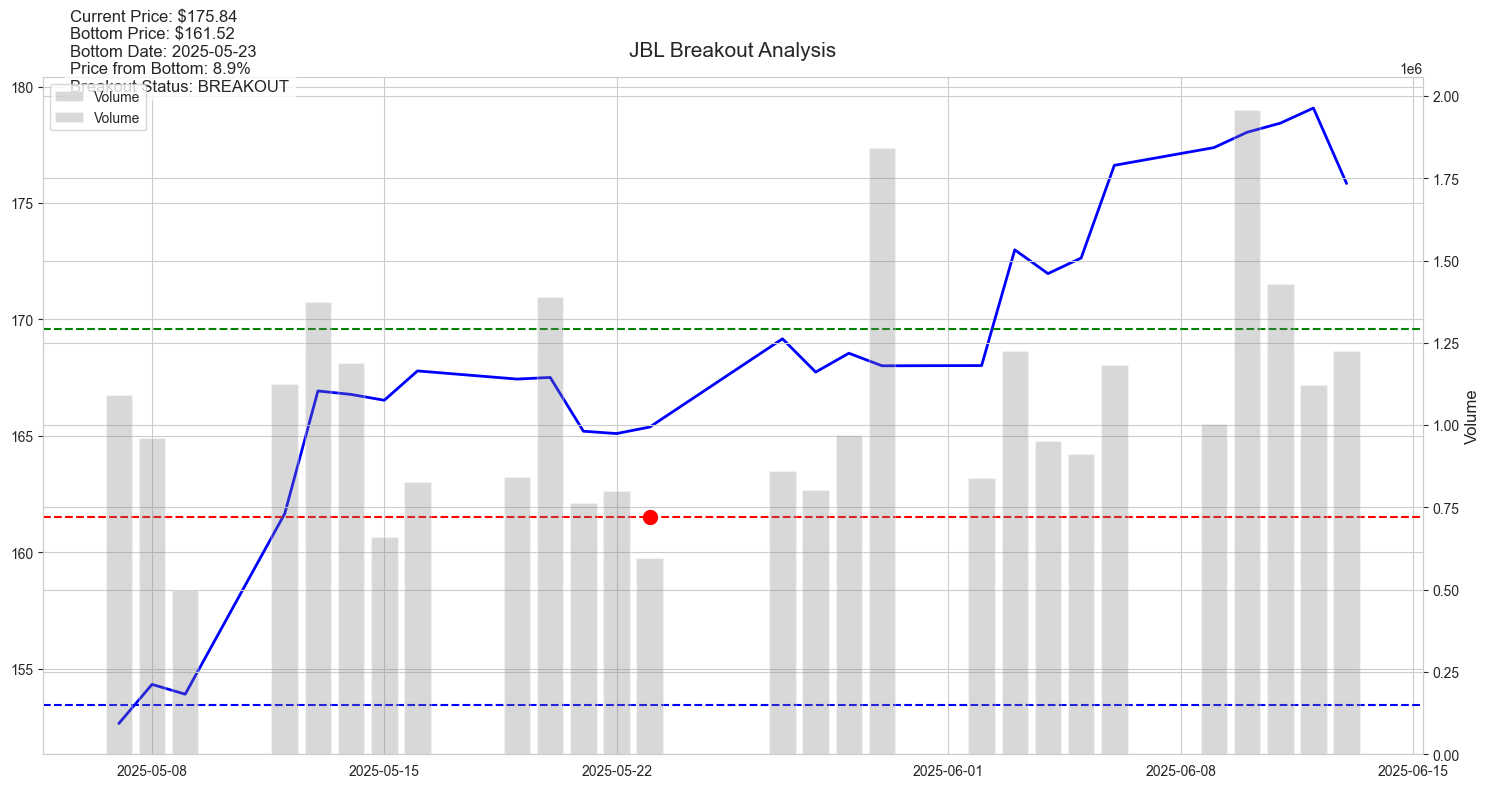




Analyzing BMY...


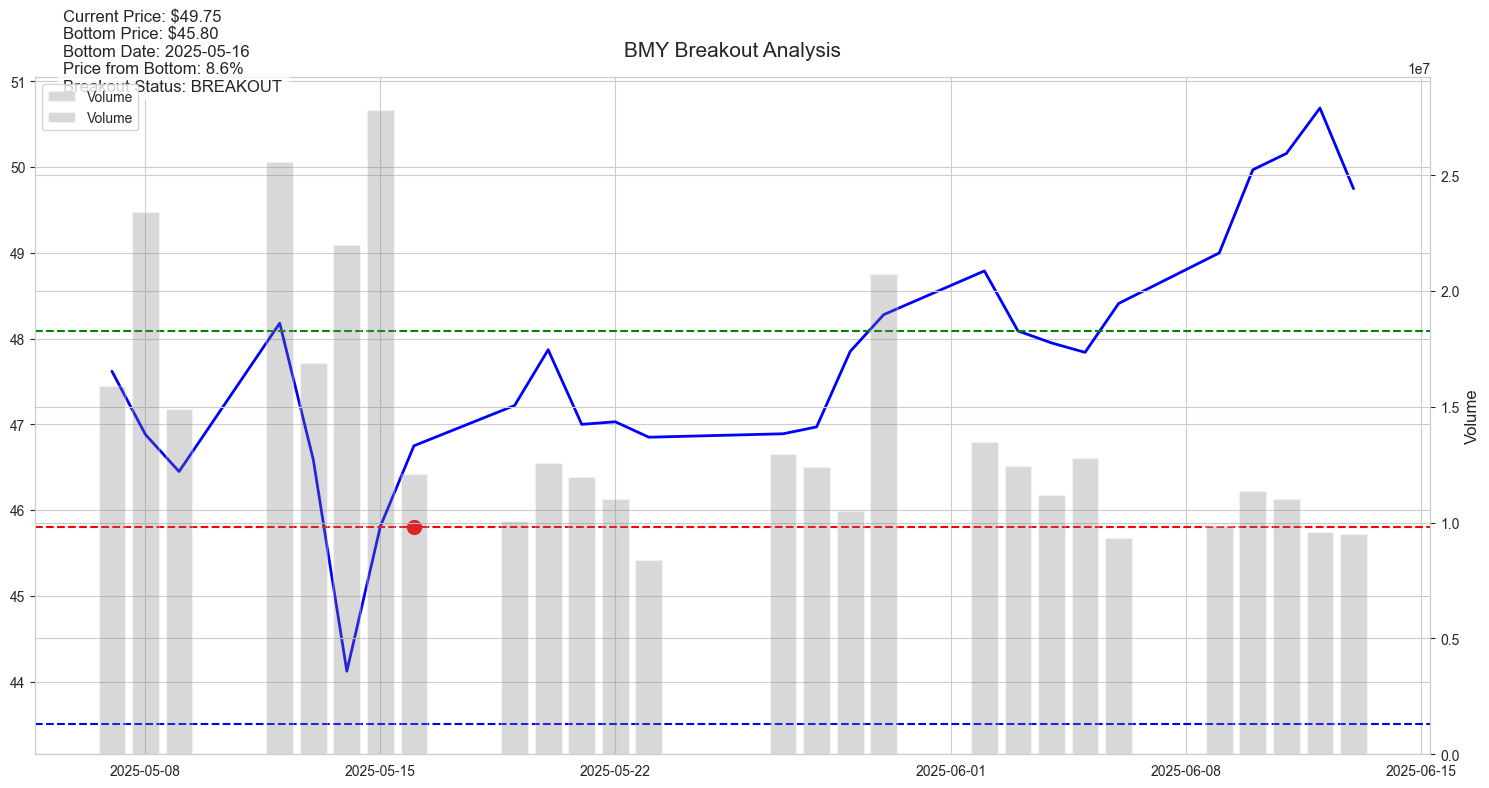




Analyzing CDNS...


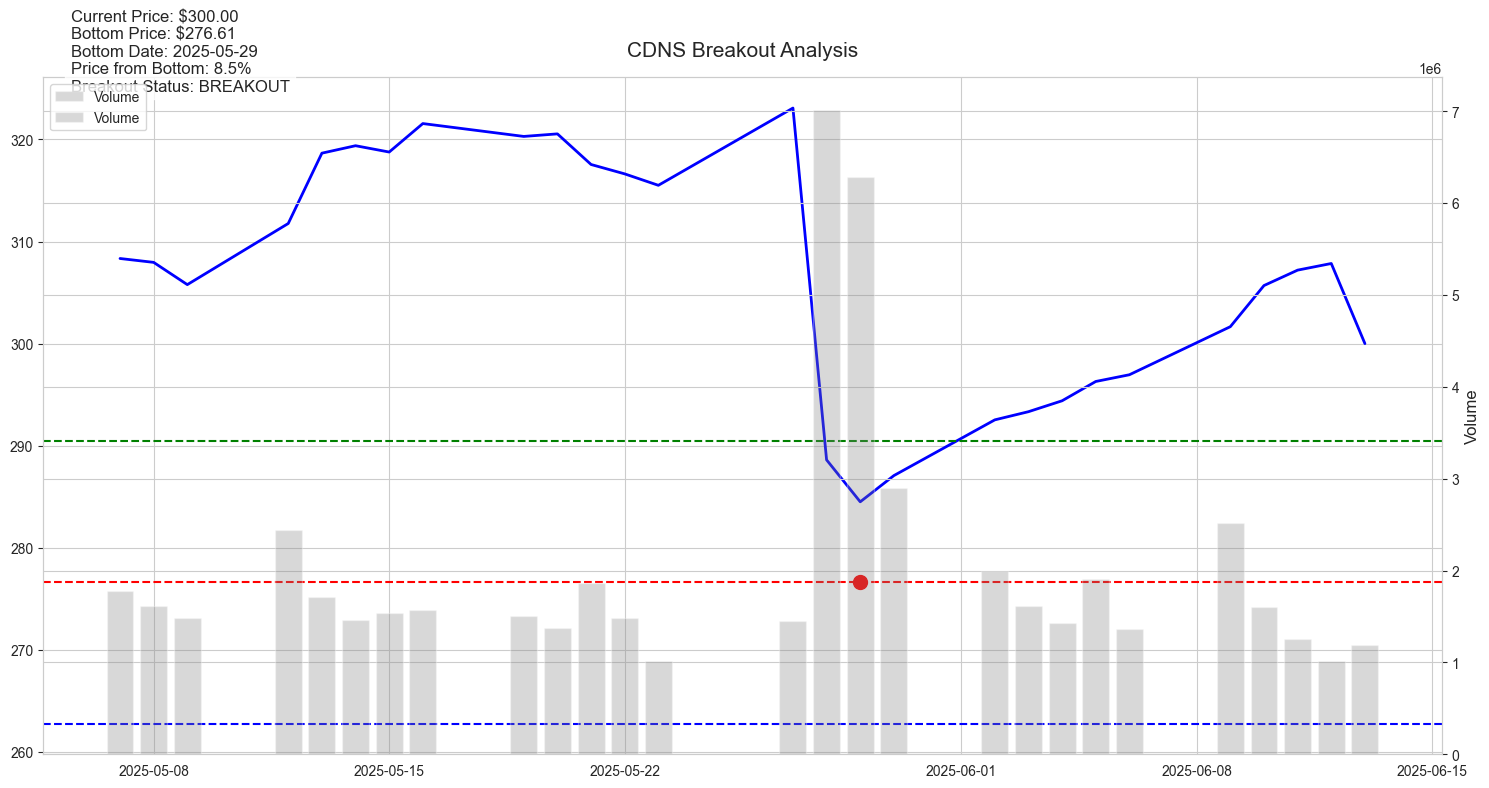




Analyzing IBM...


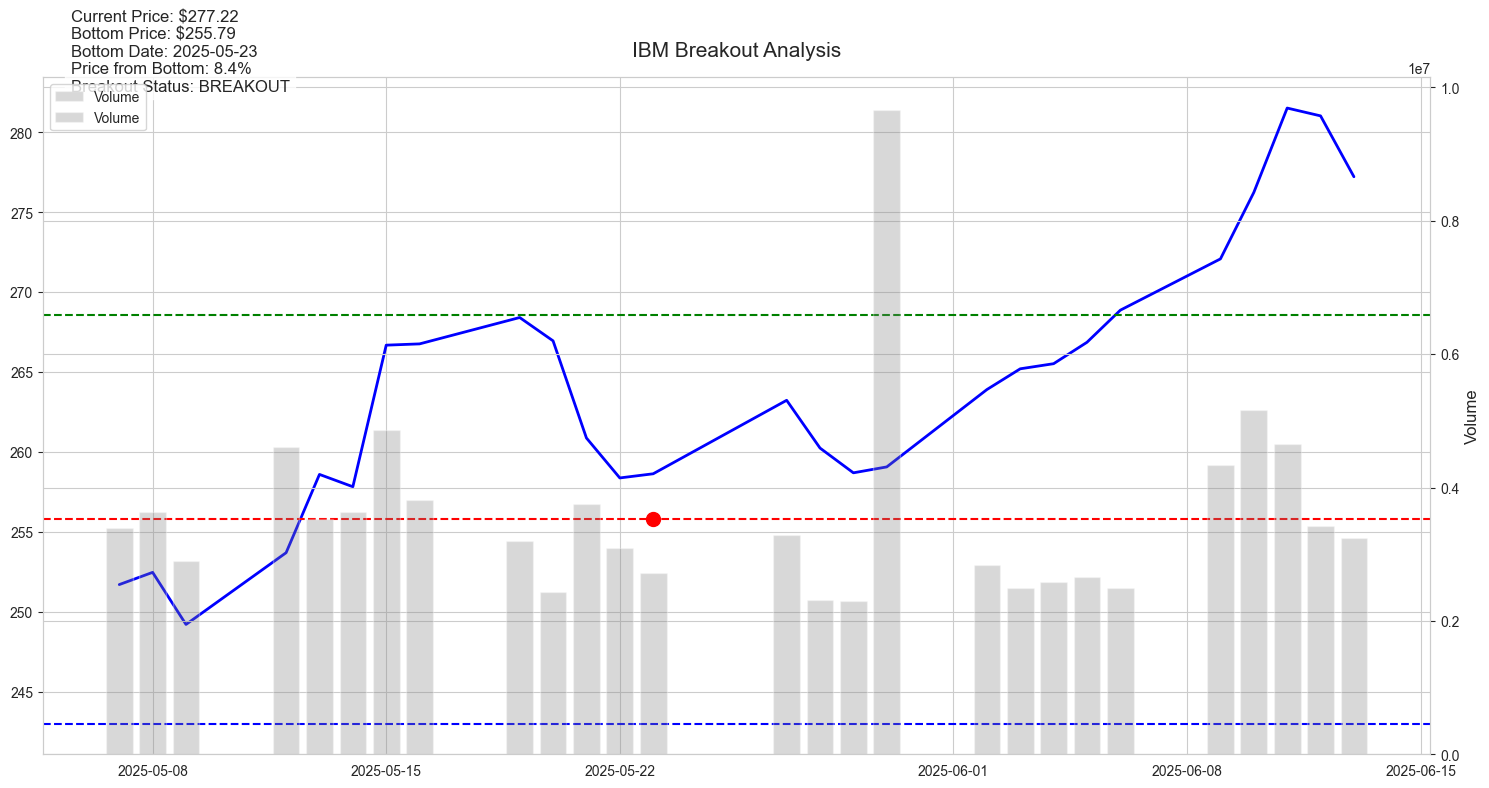




Analyzing INCY...


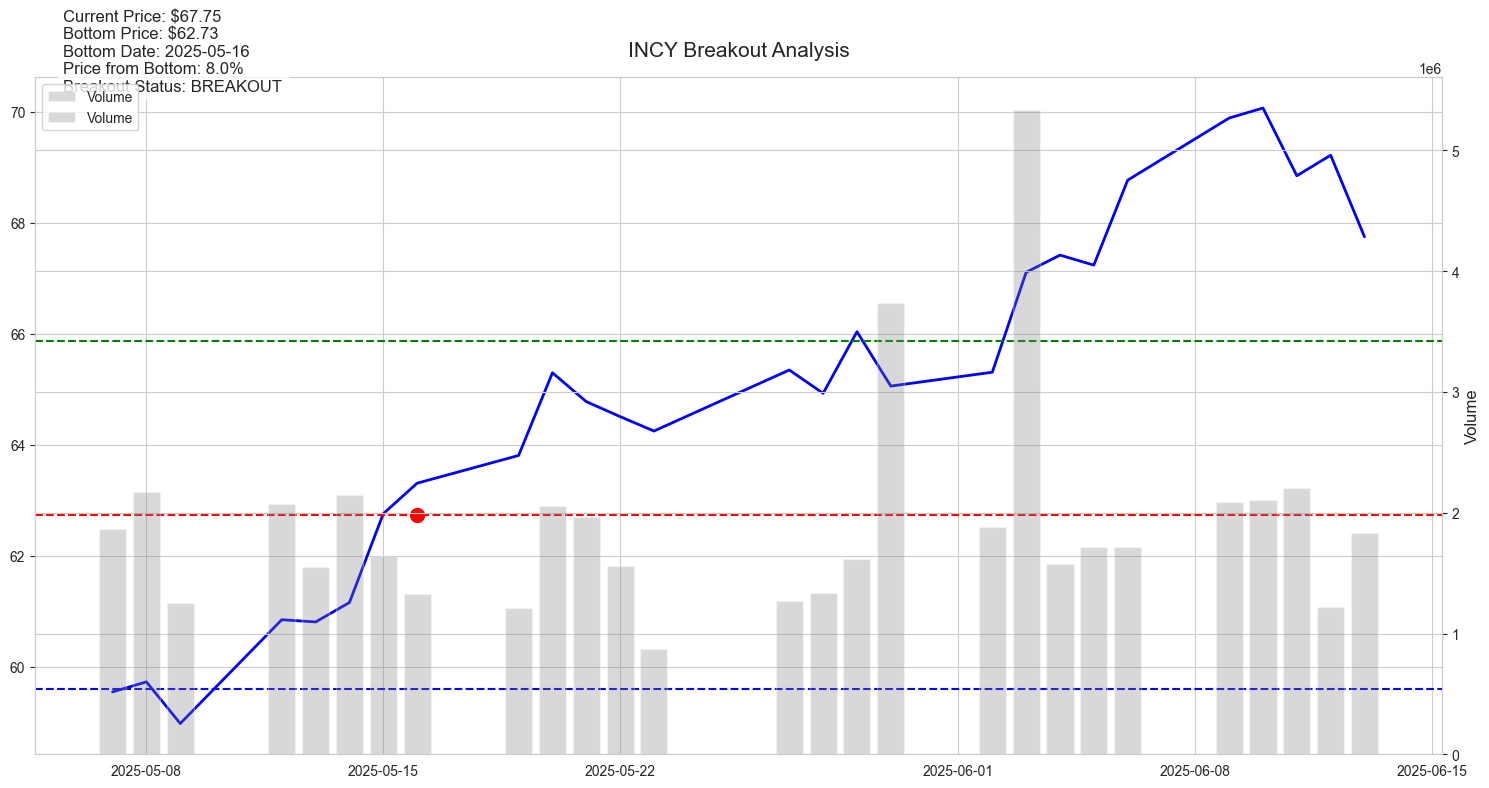




Analyzing AMD...


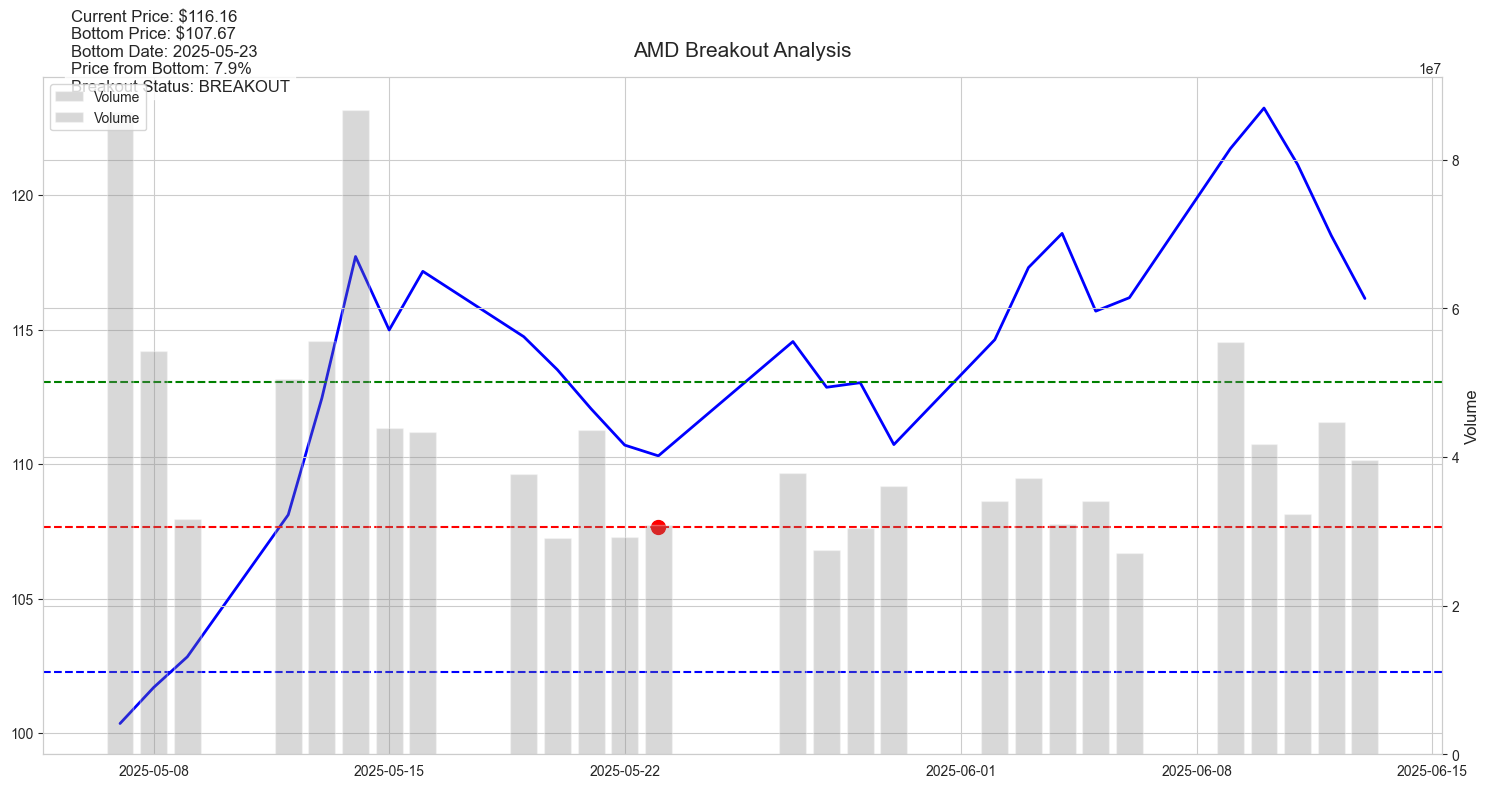




Analyzing SYF...


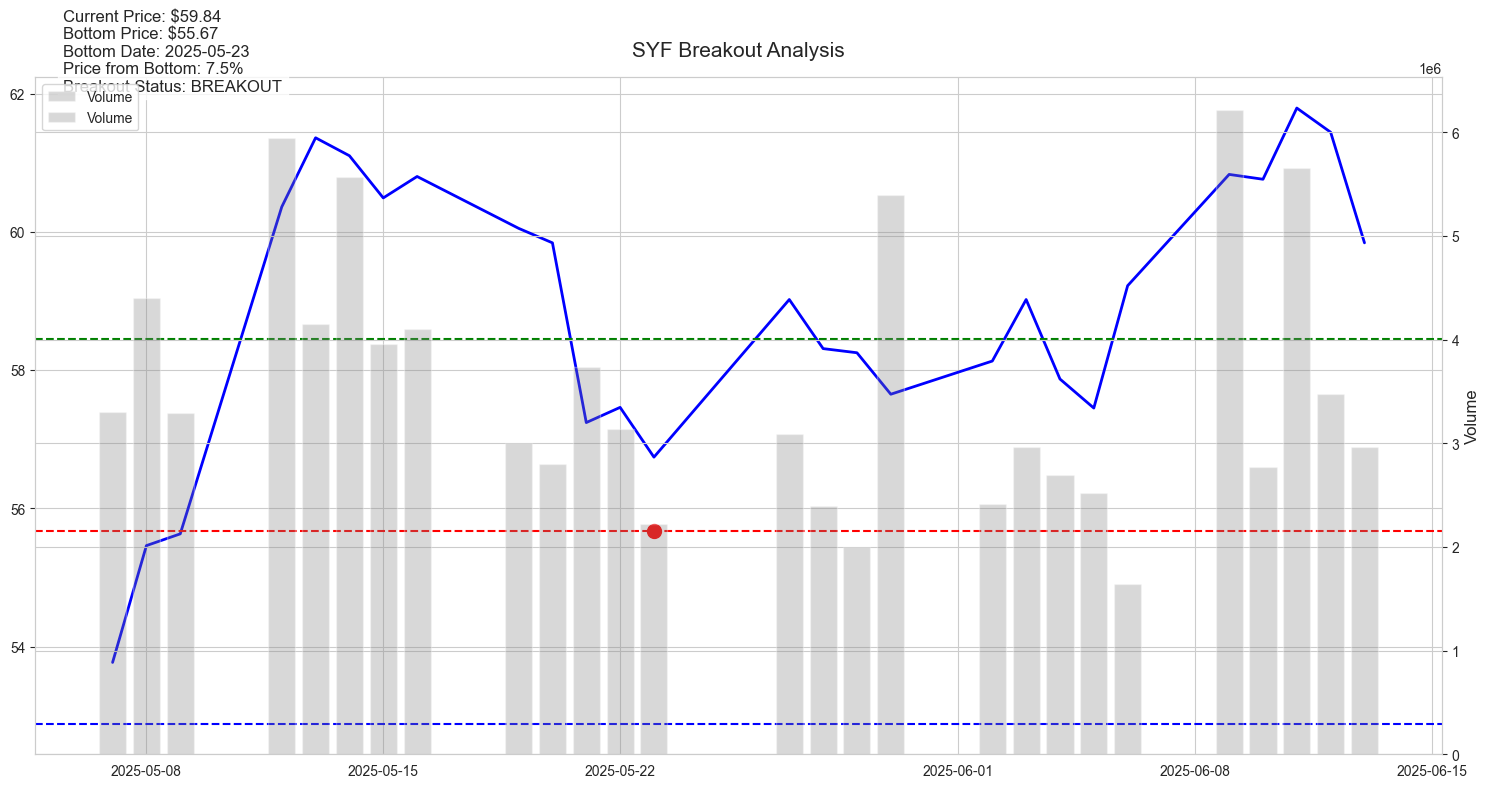




Analyzing NDAQ...


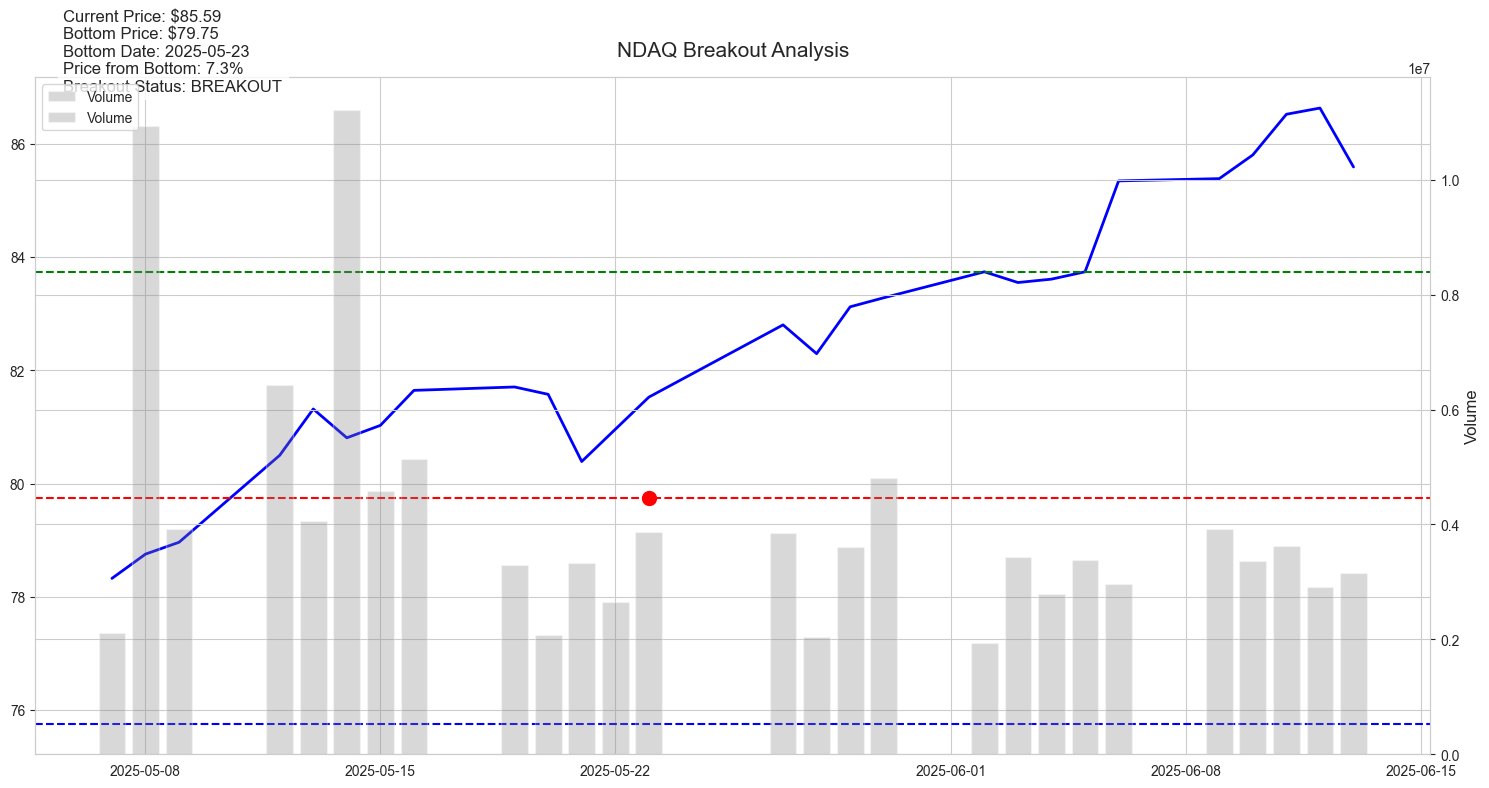




Analyzing COO...


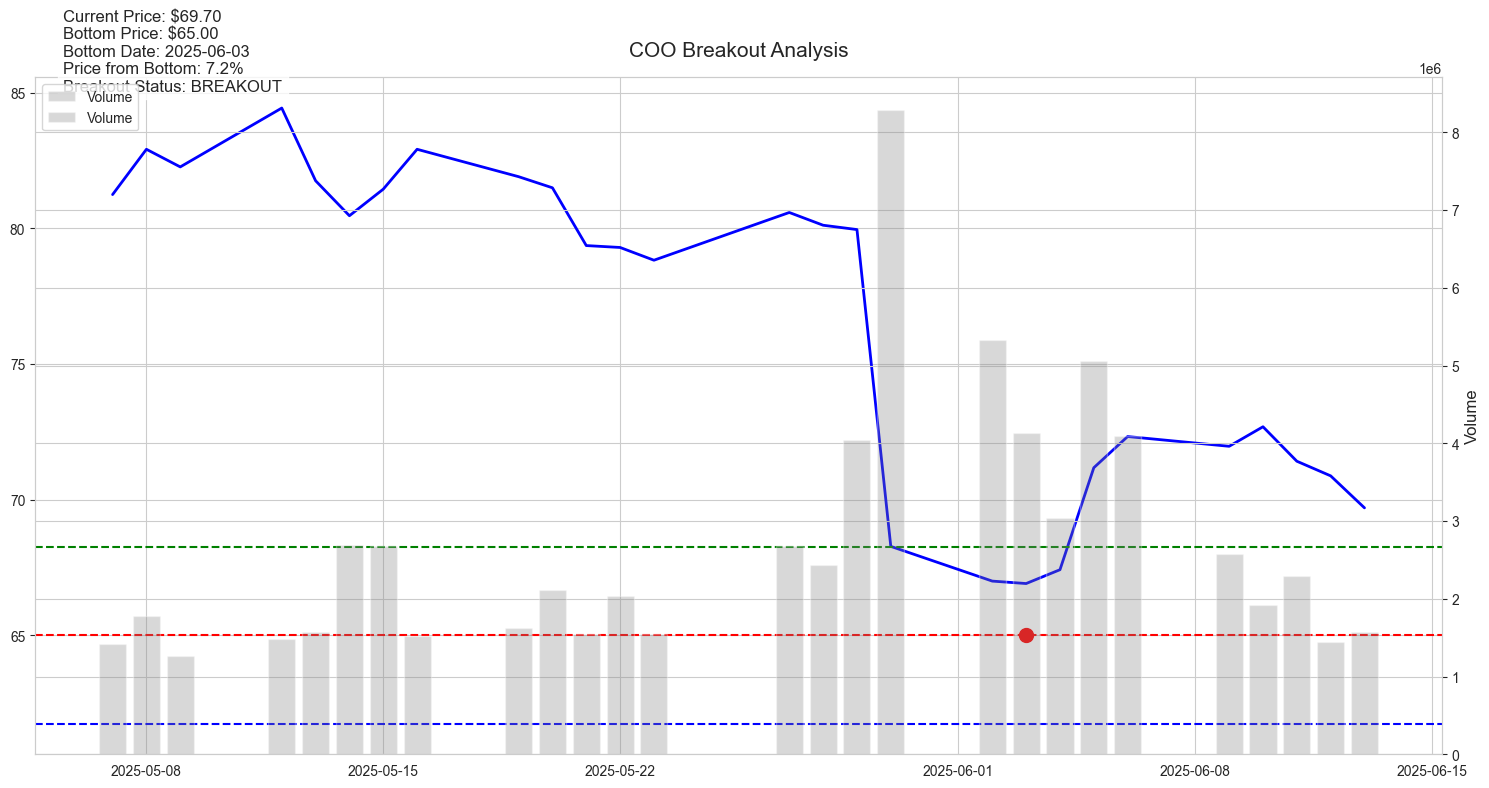




Analyzing CAH...


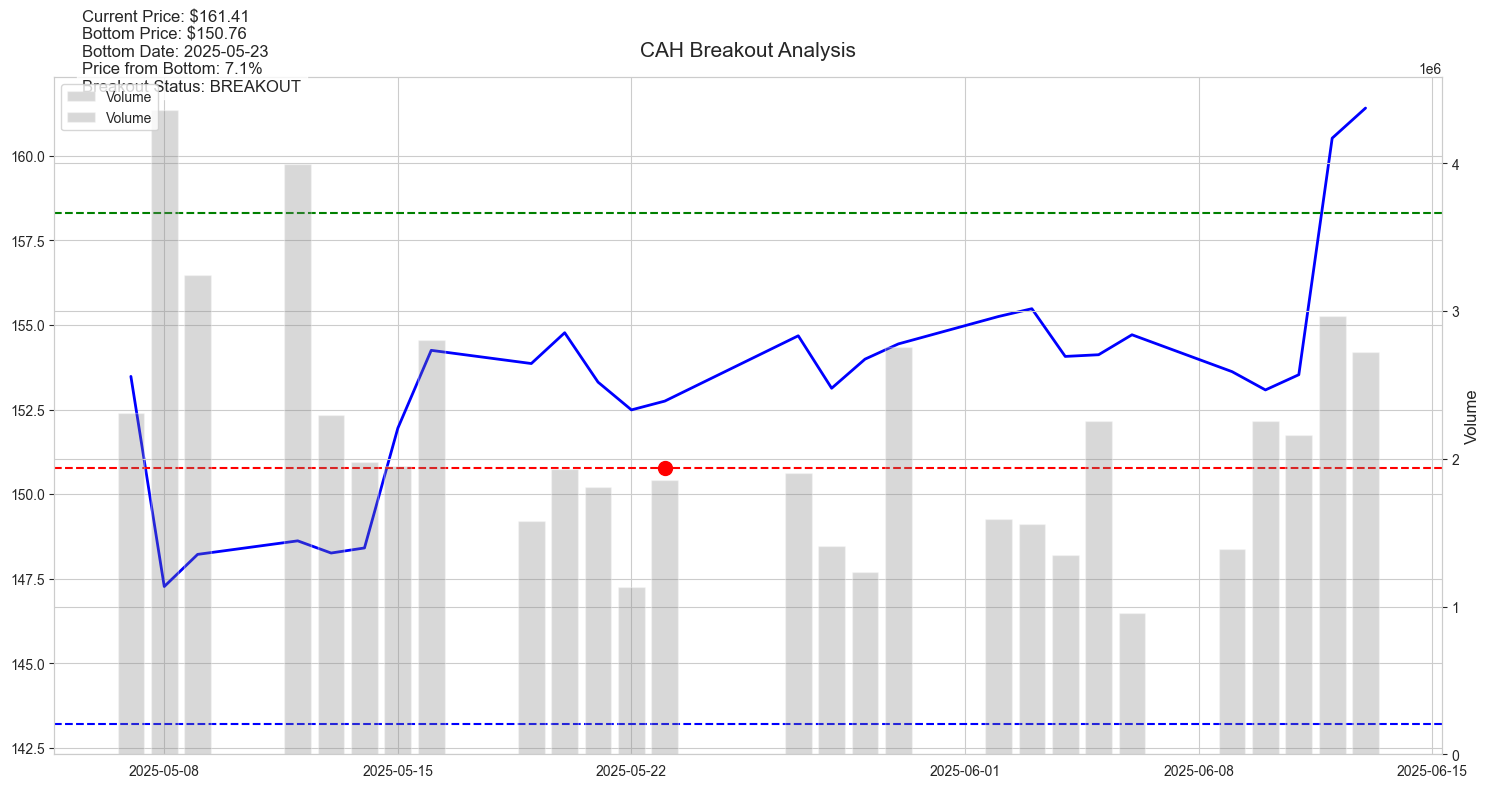




Analyzing SWKS...


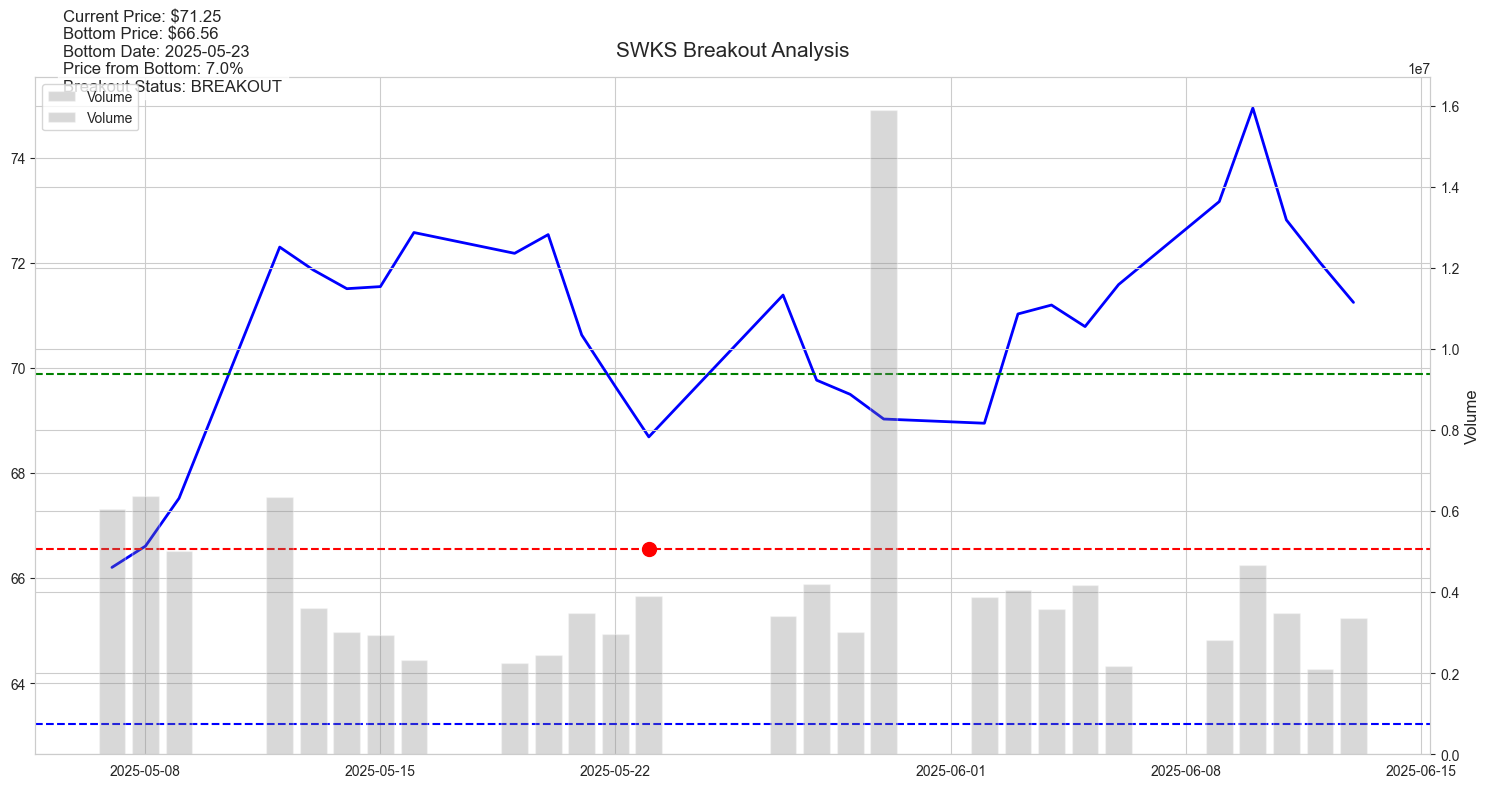




Analyzing DGX...


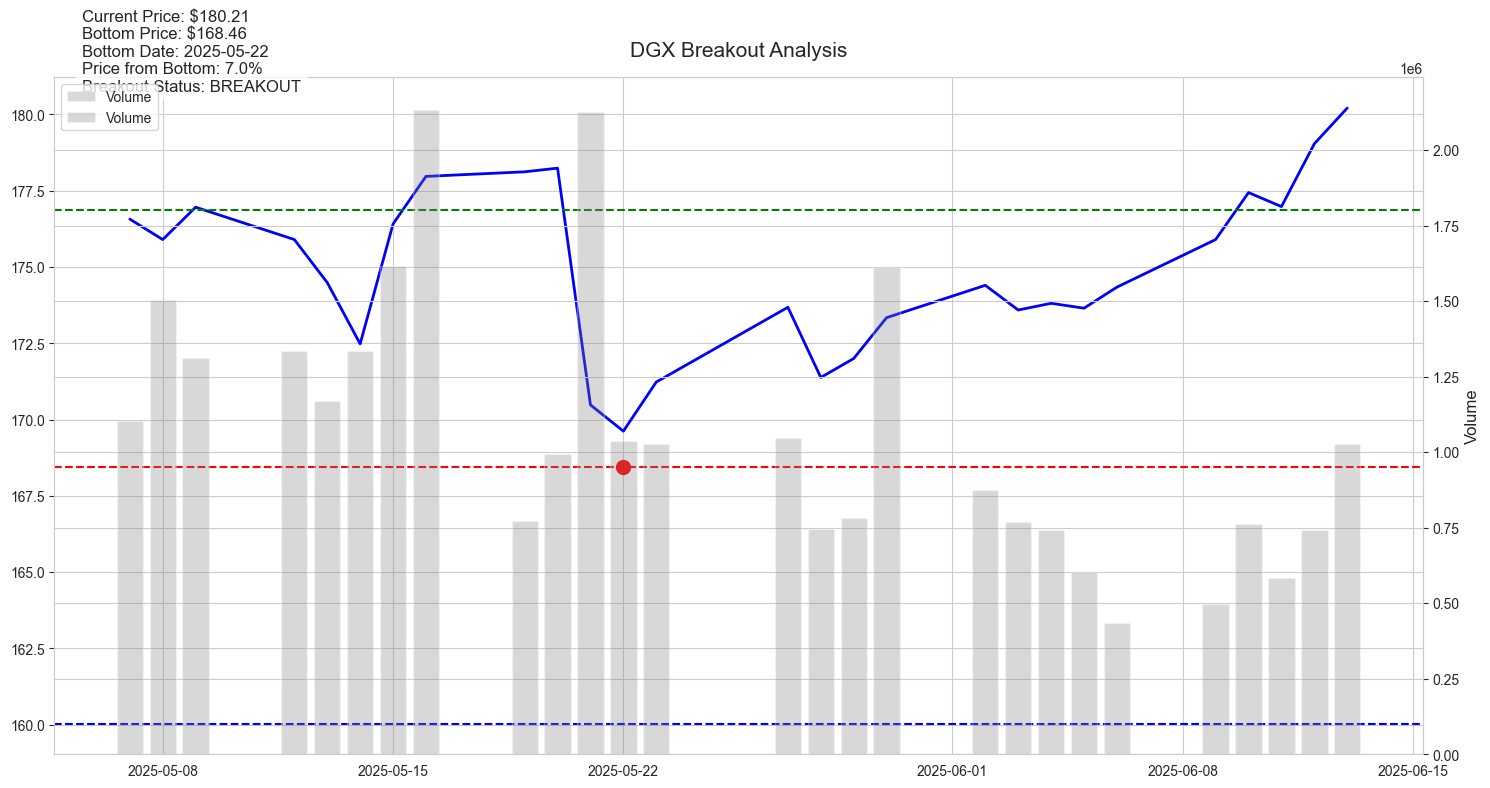




Analyzing NTAP...


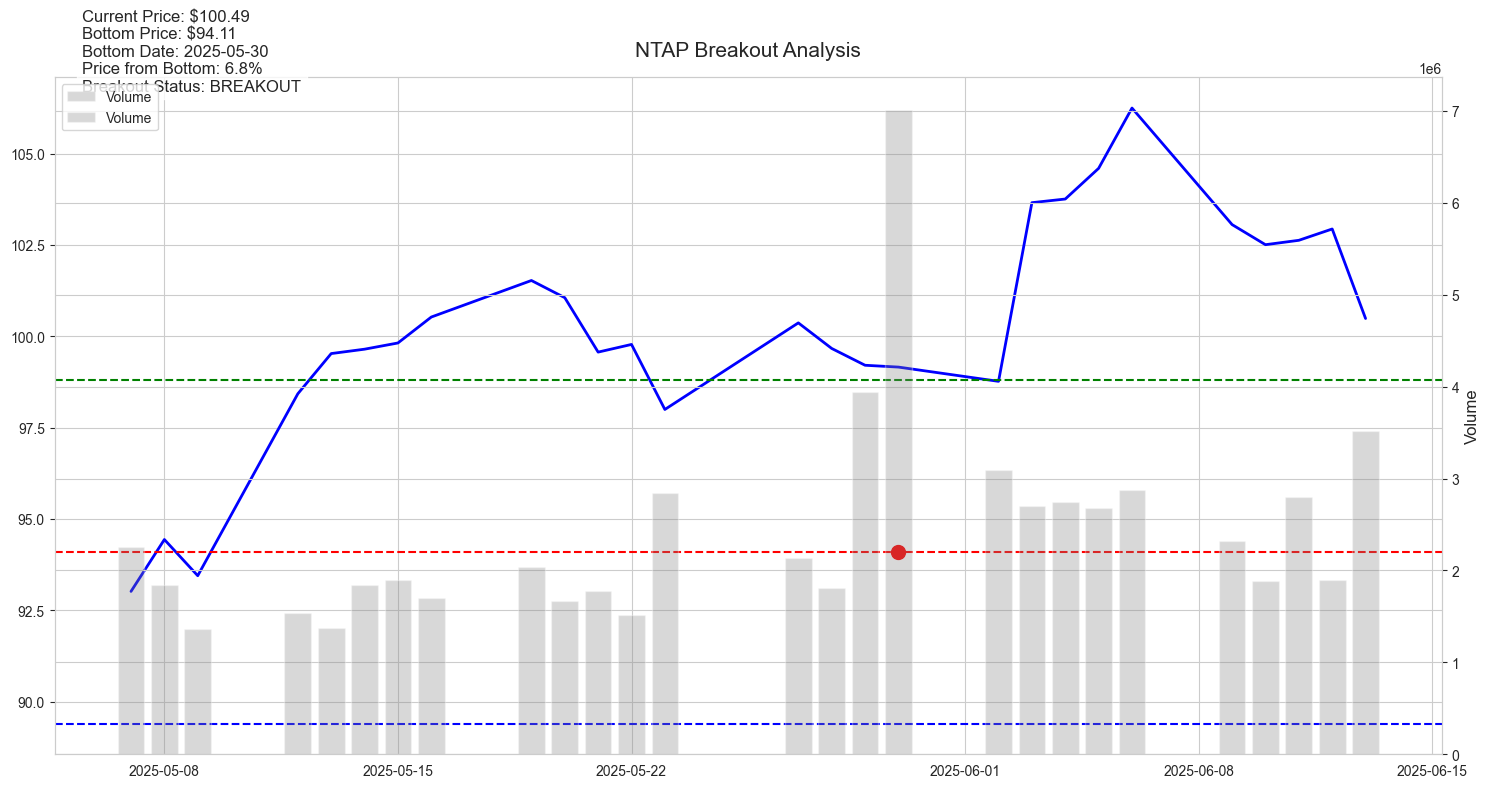




Analyzing LDOS...


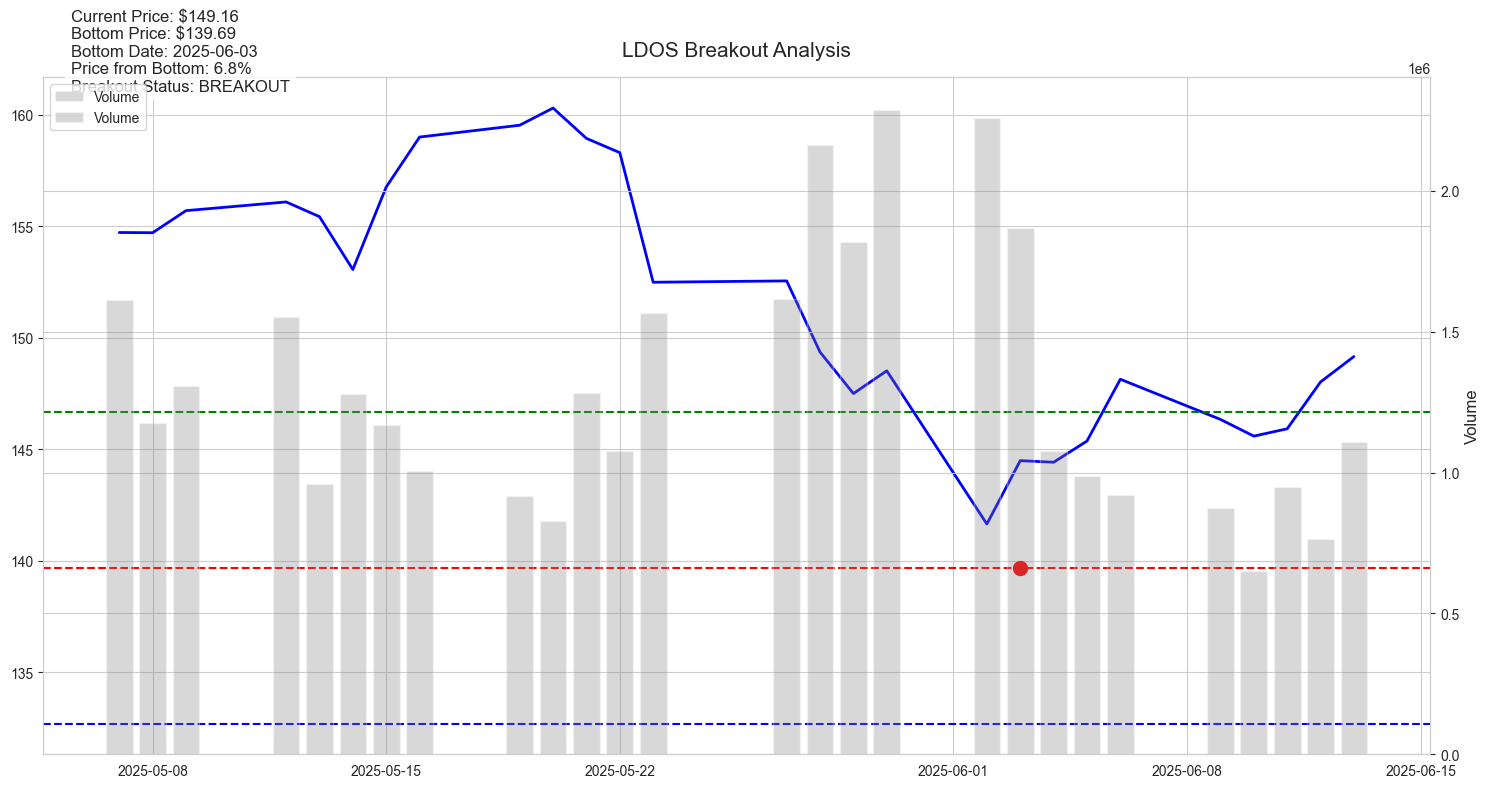




Analyzing BIIB...


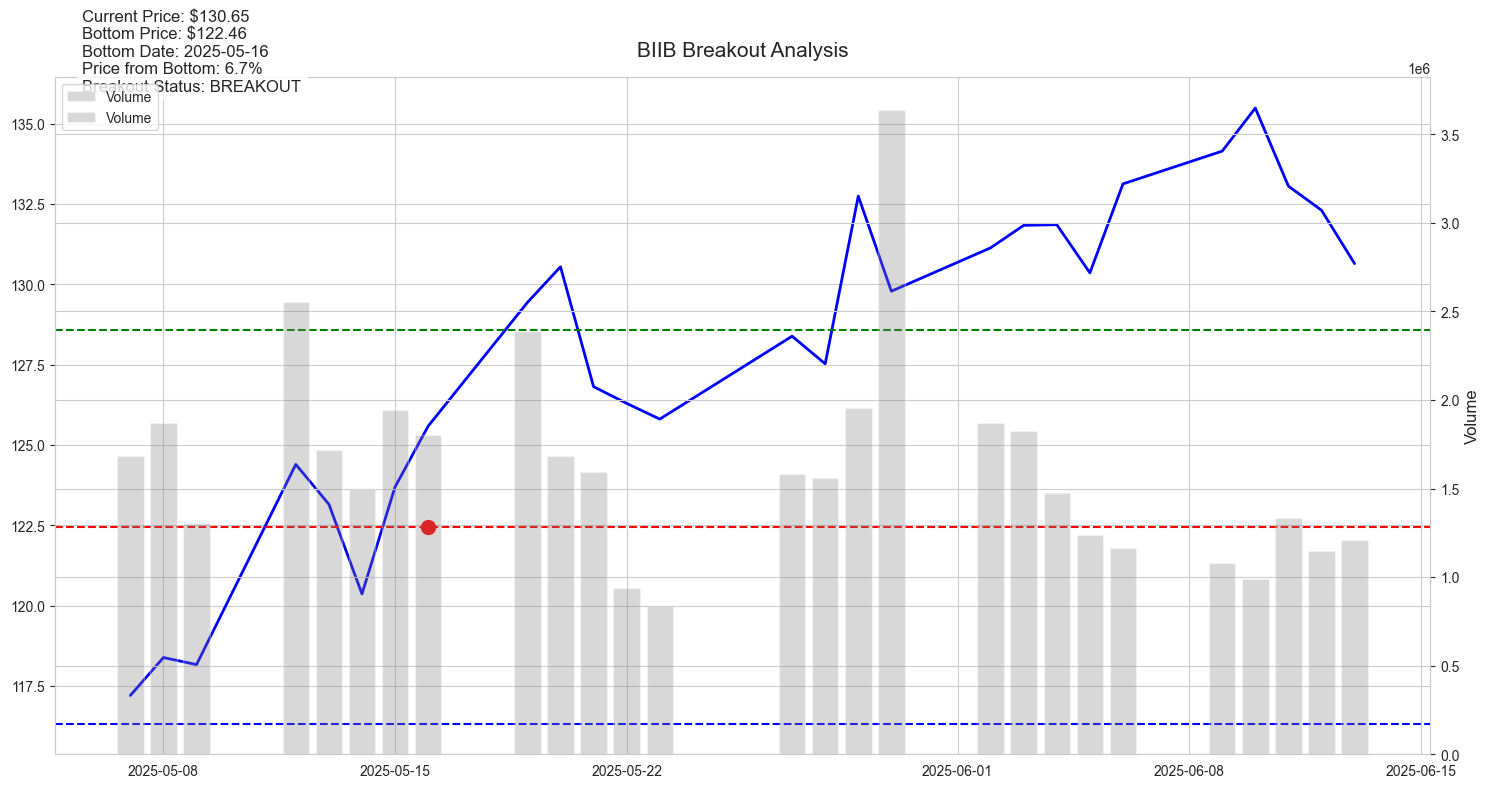




Analyzing RVTY...


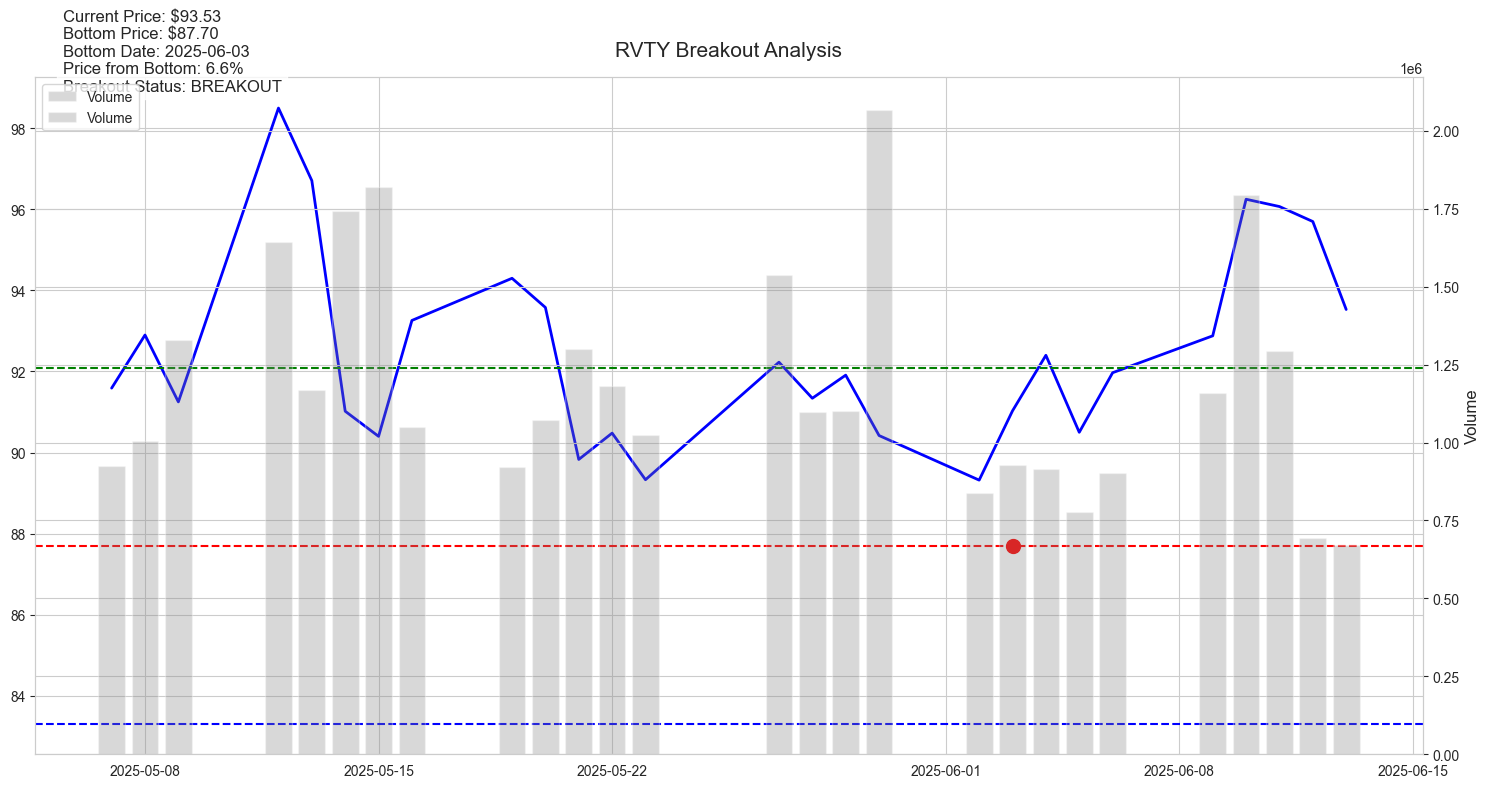




Analyzing C...


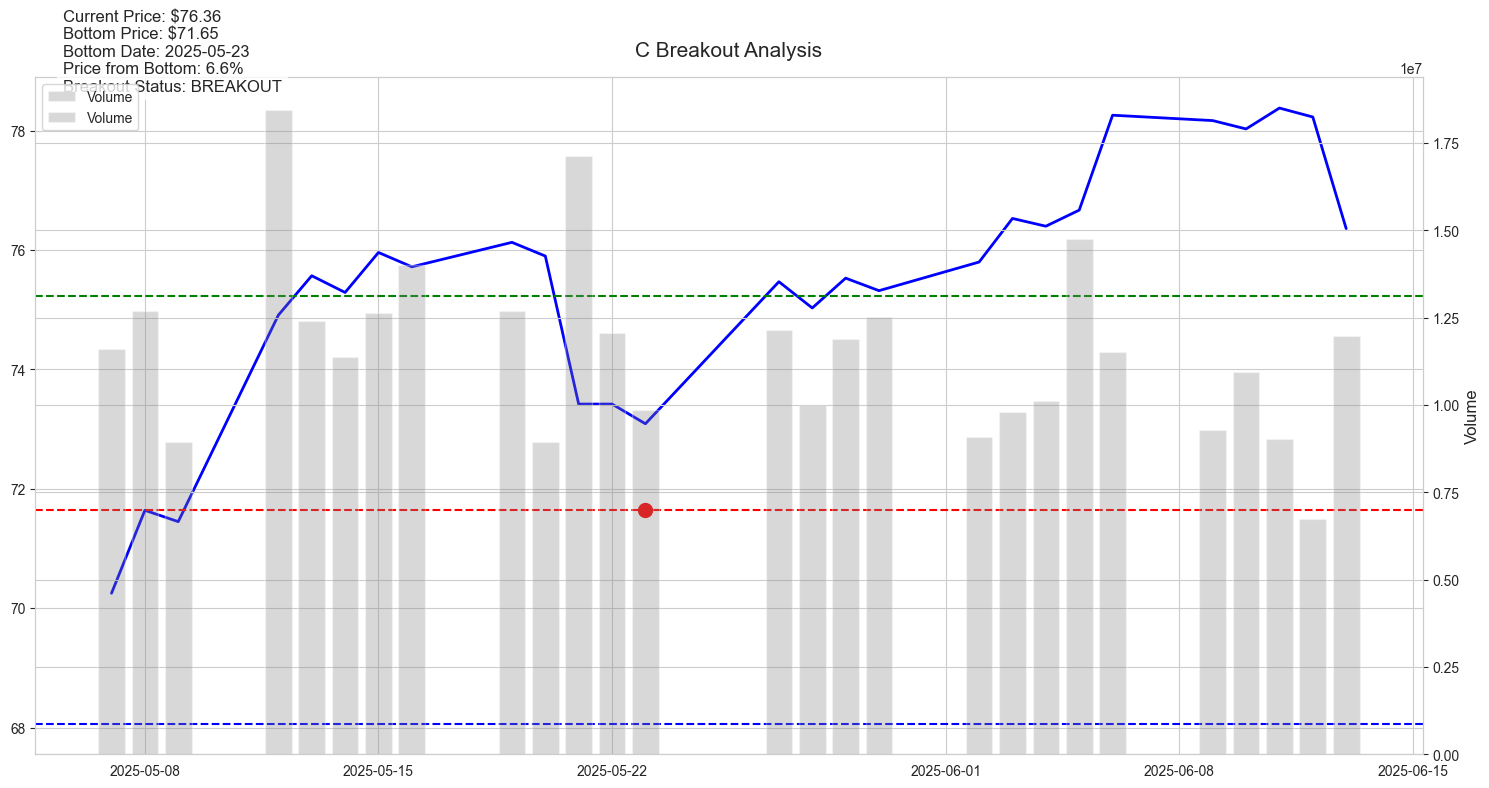




Analyzing VRTX...


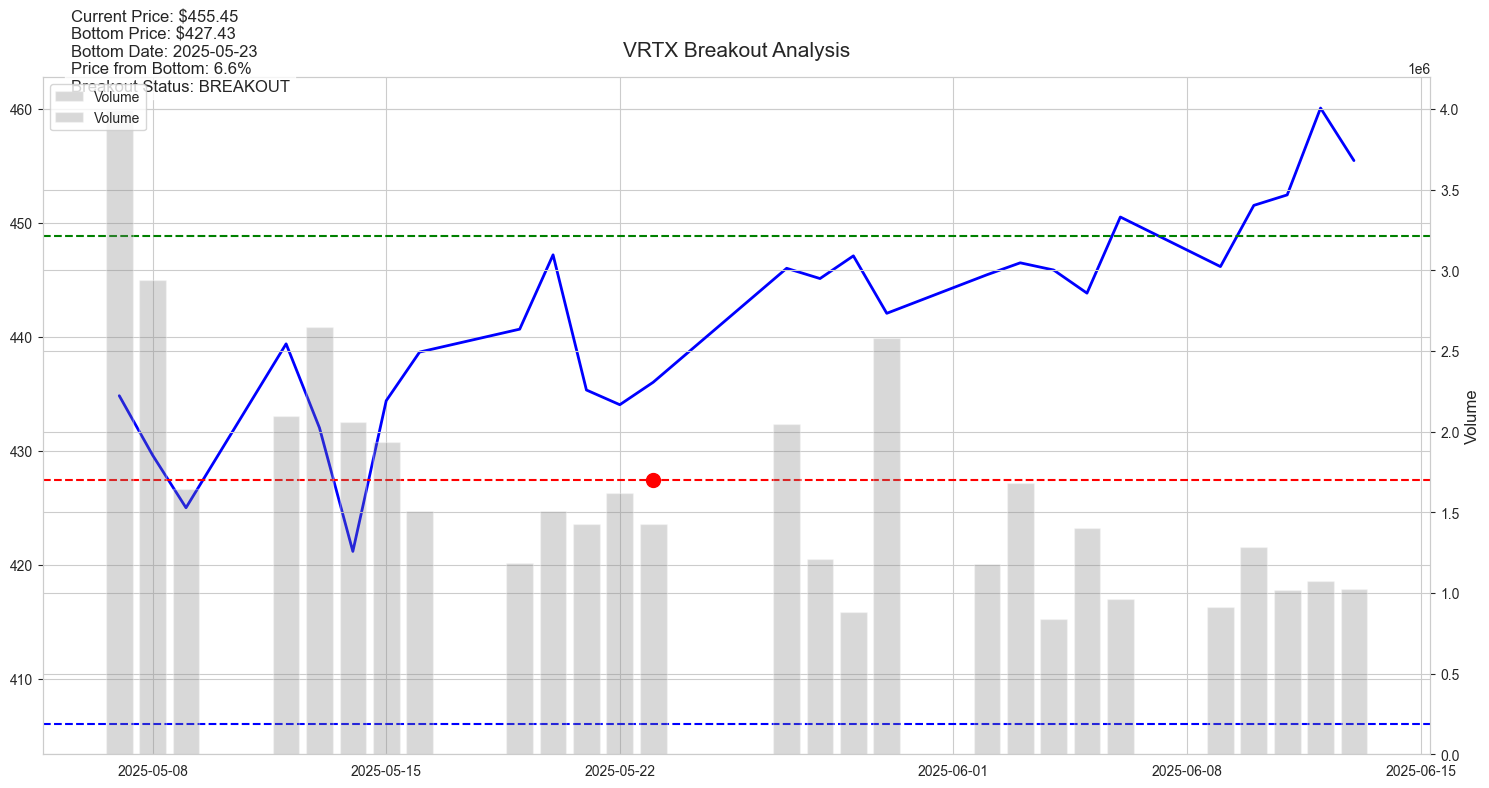




Analyzing HUM...


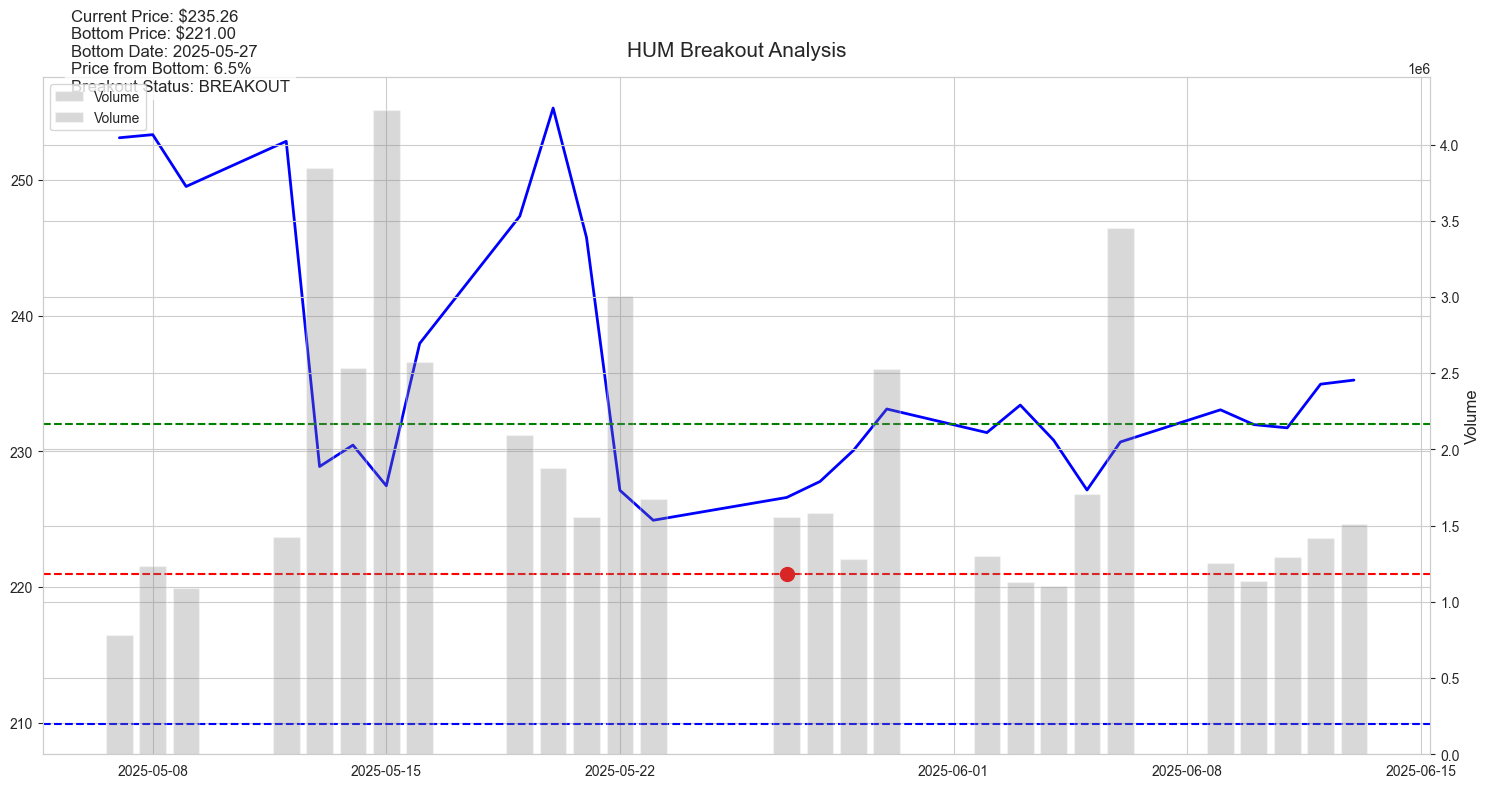




Analyzing SMCI...


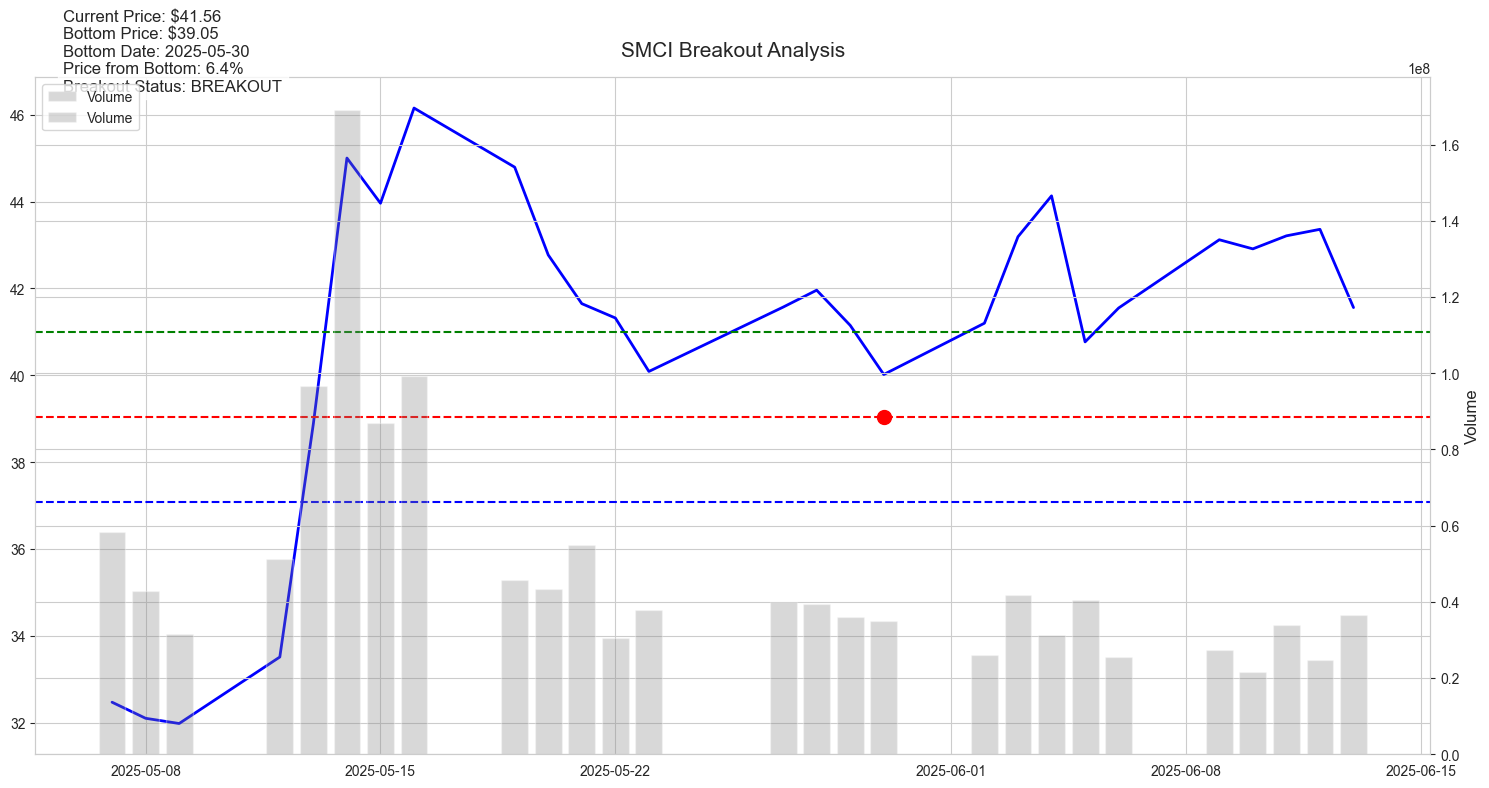




Analyzing JNJ...


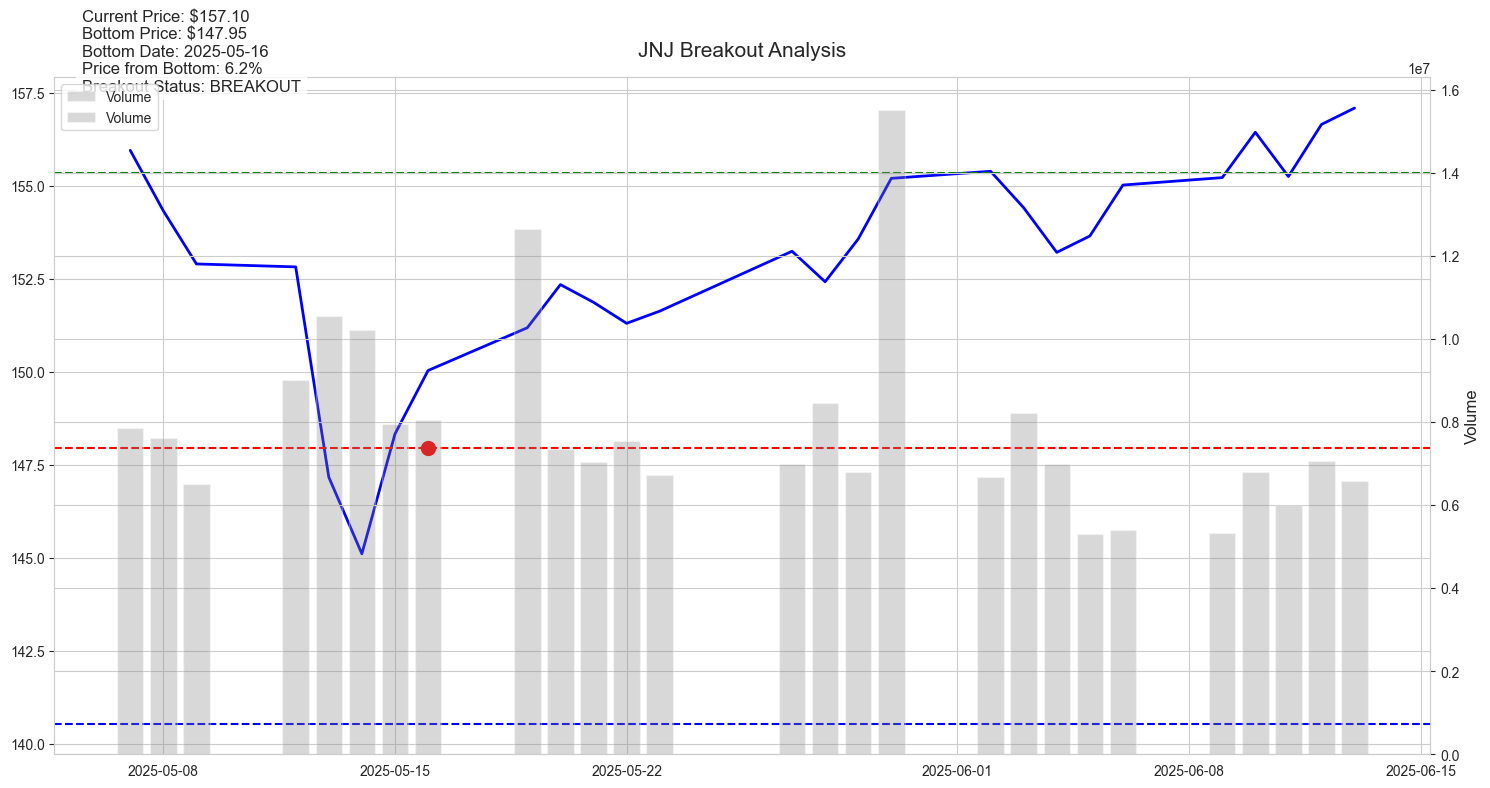




Analyzing ABBV...


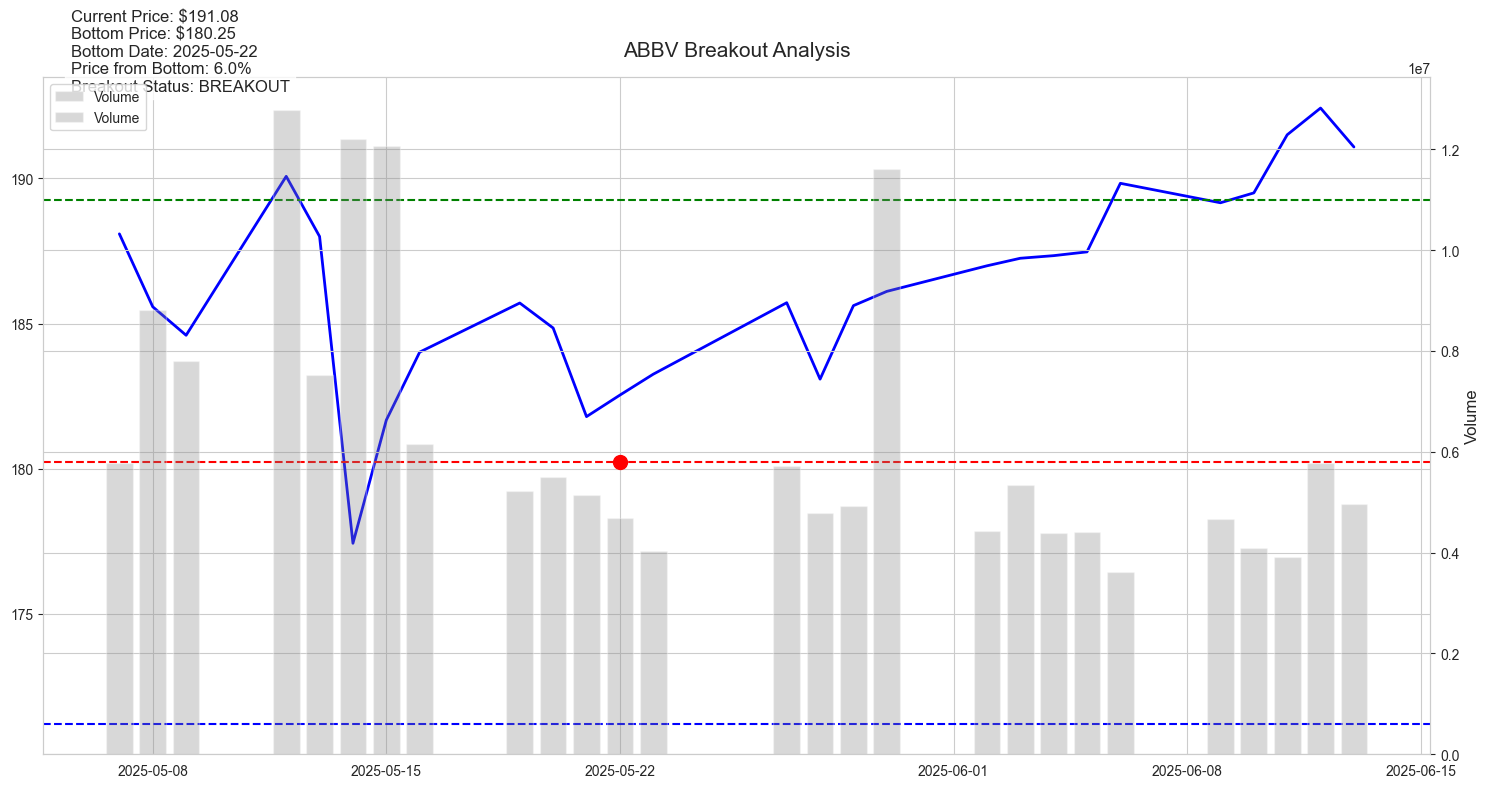




Analyzing GEHC...


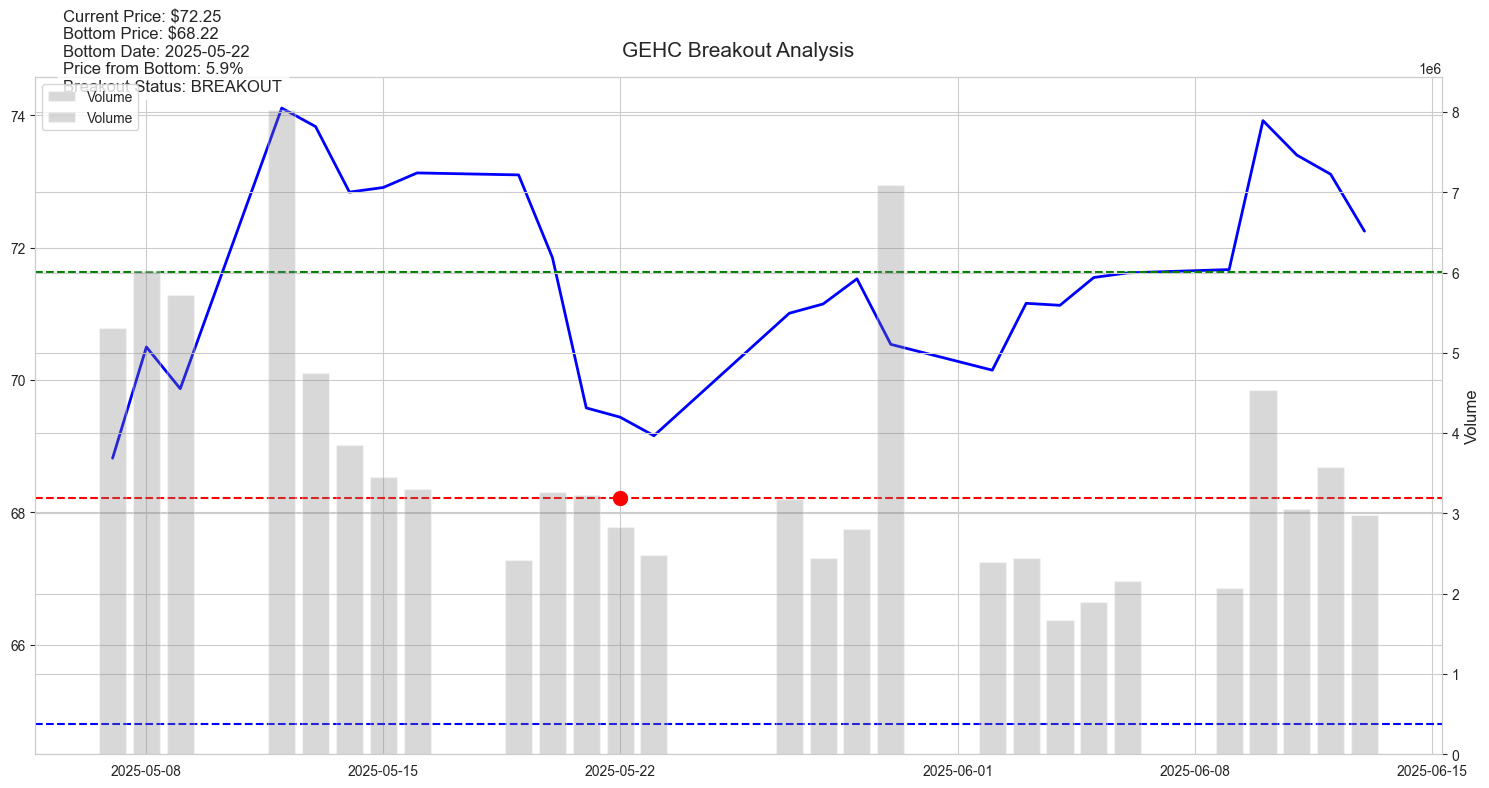




Analyzing ALGN...


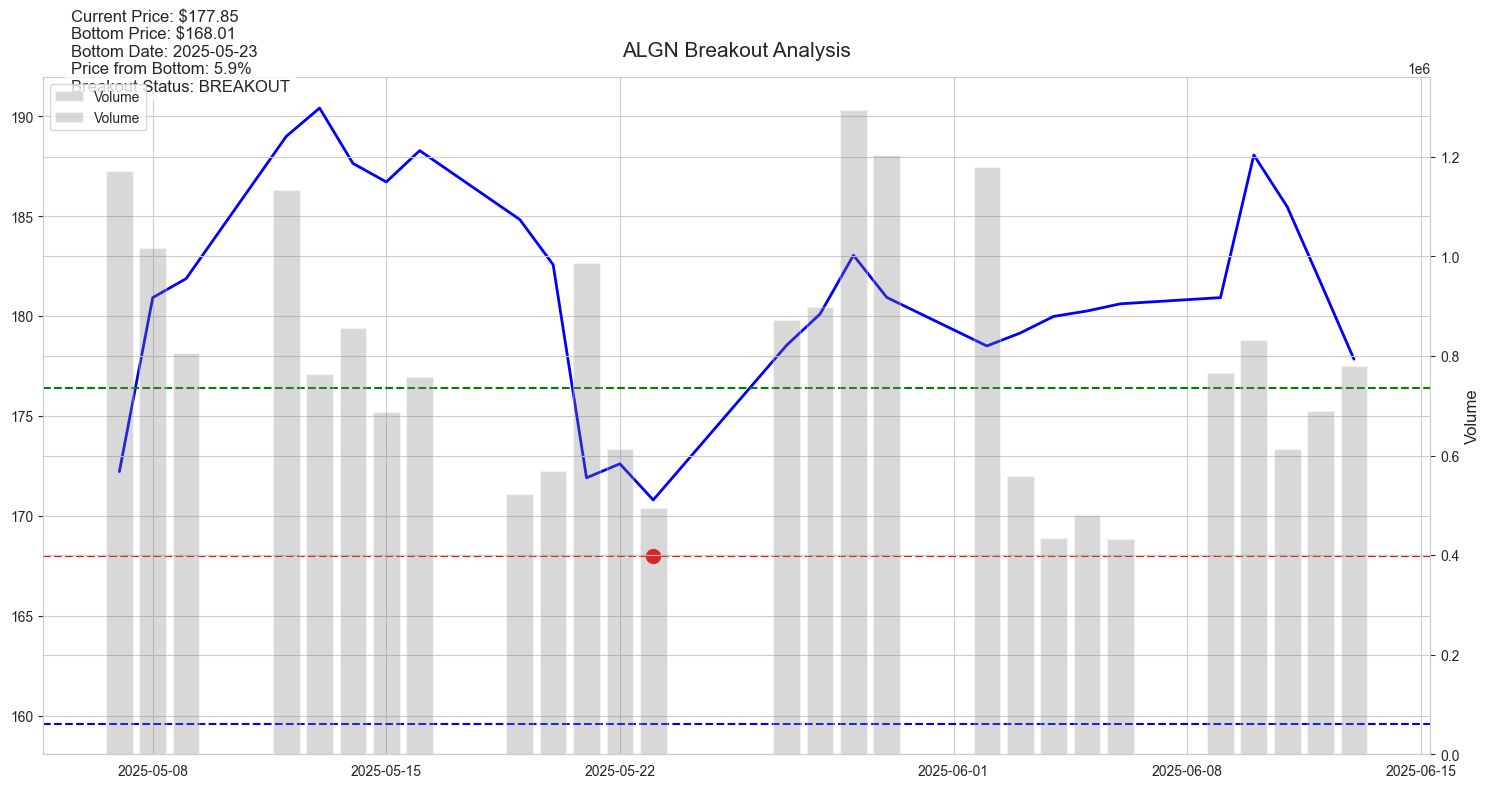




Analyzing MSFT...


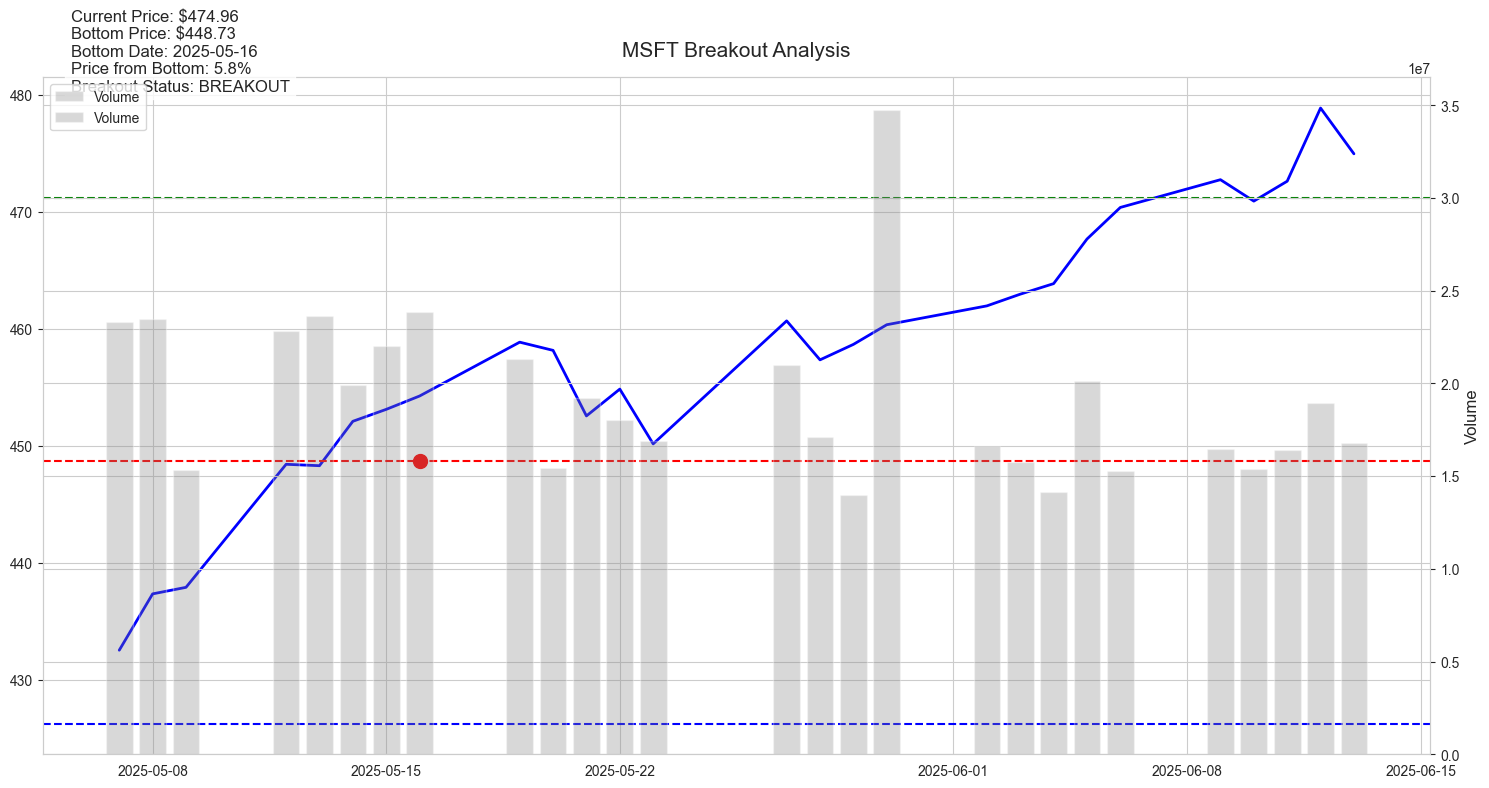




Analyzing KKR...


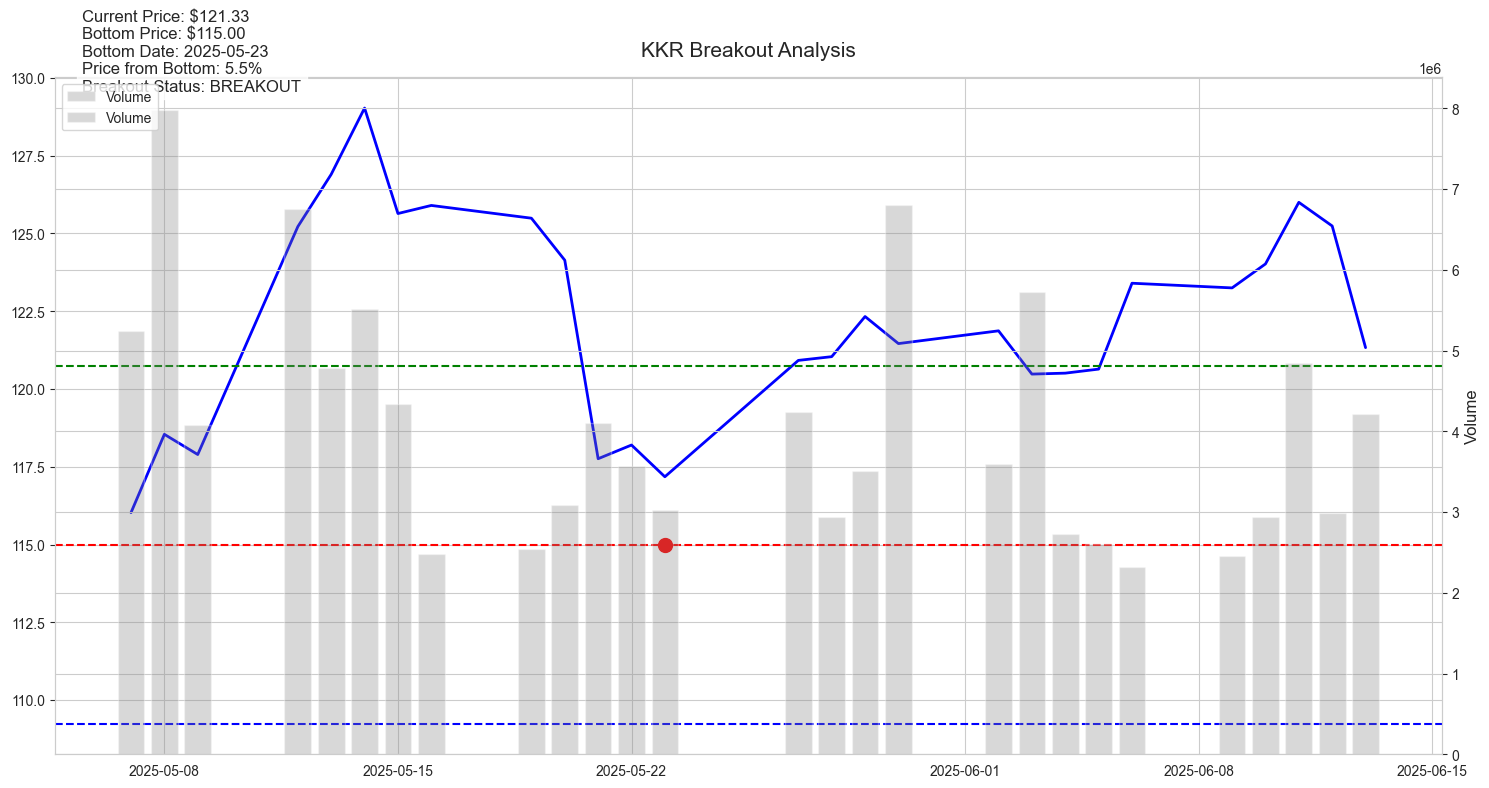




Analyzing BEN...


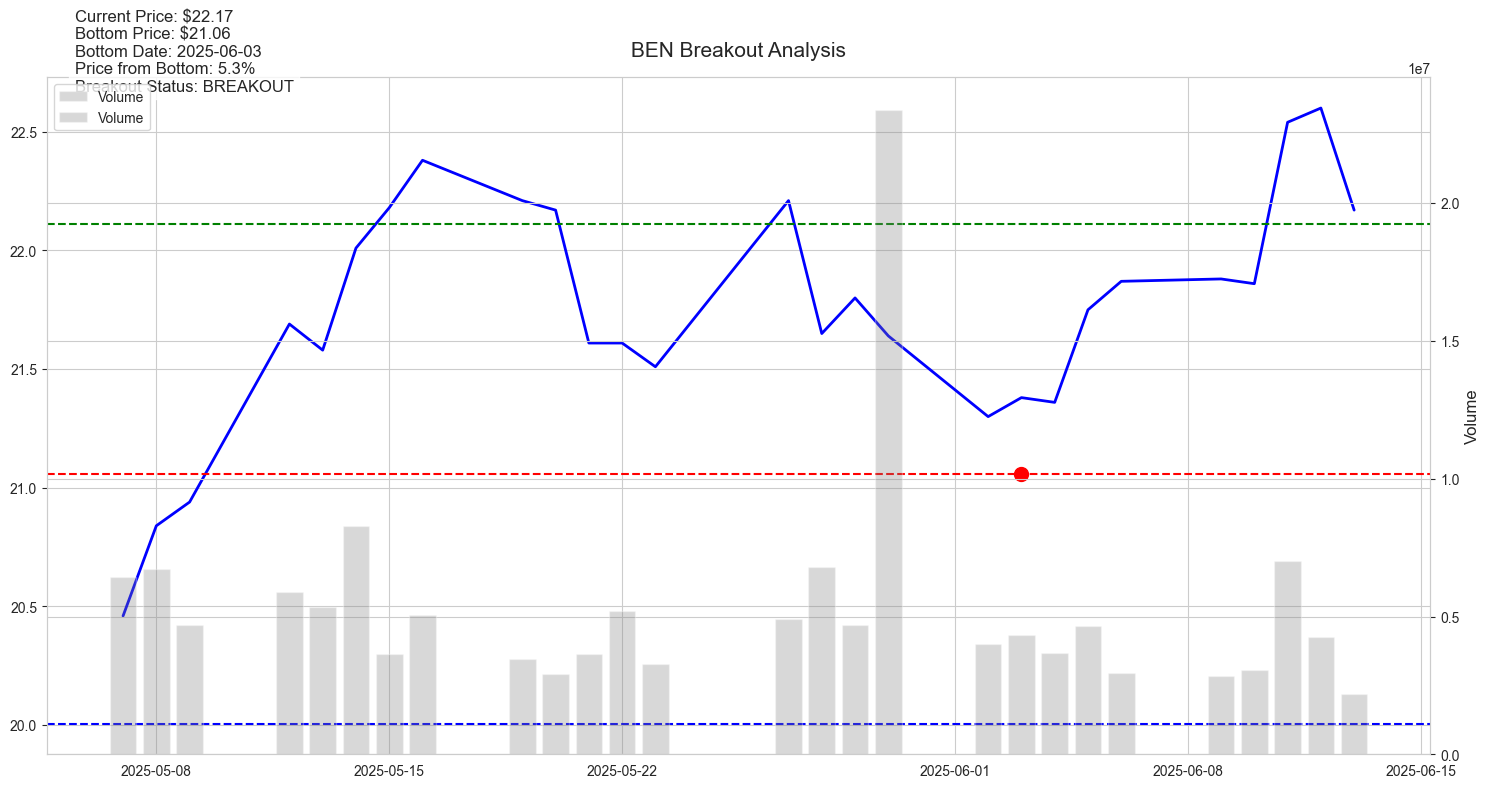




Analyzing GLW...


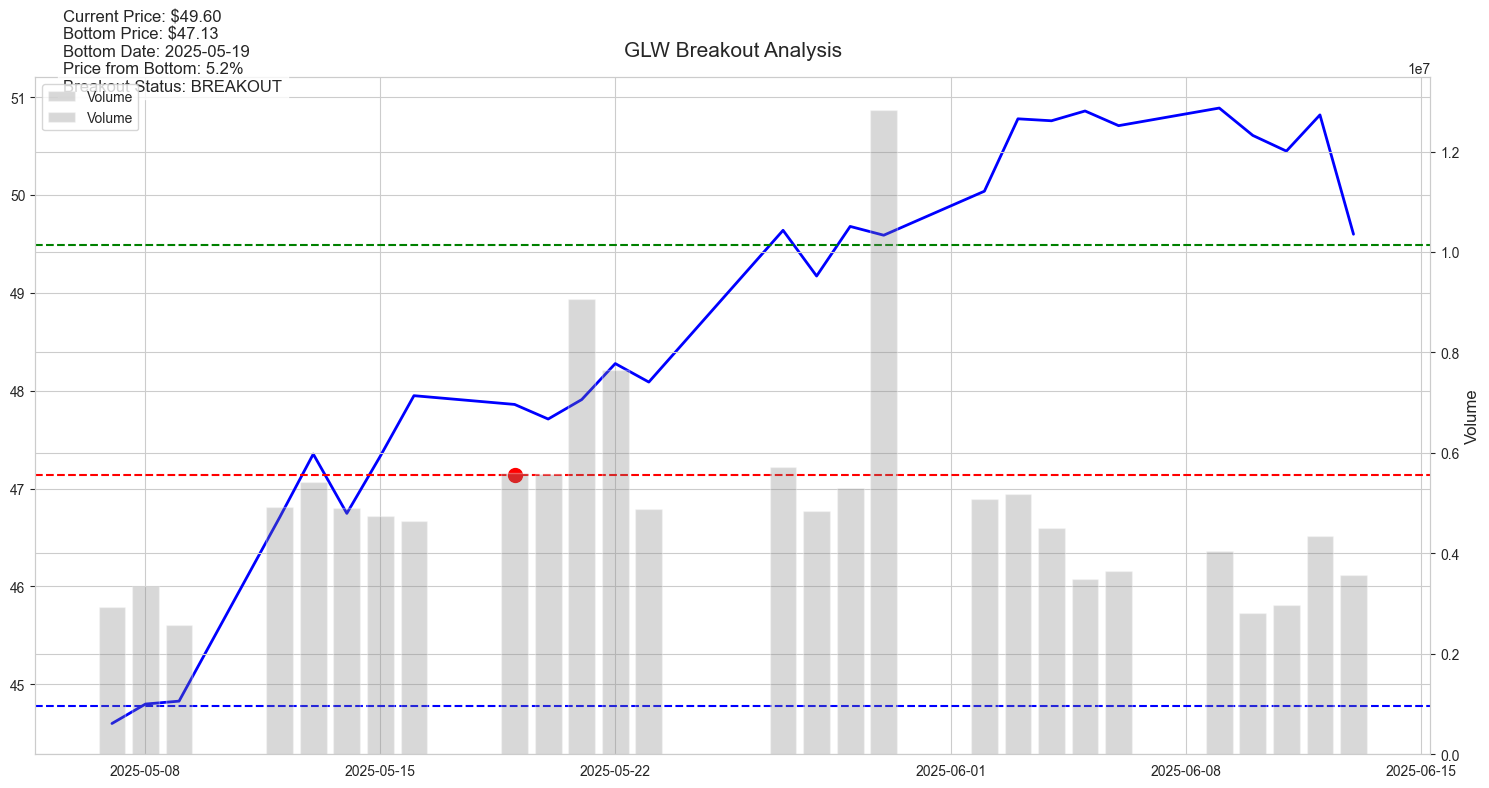




Analyzing COF...


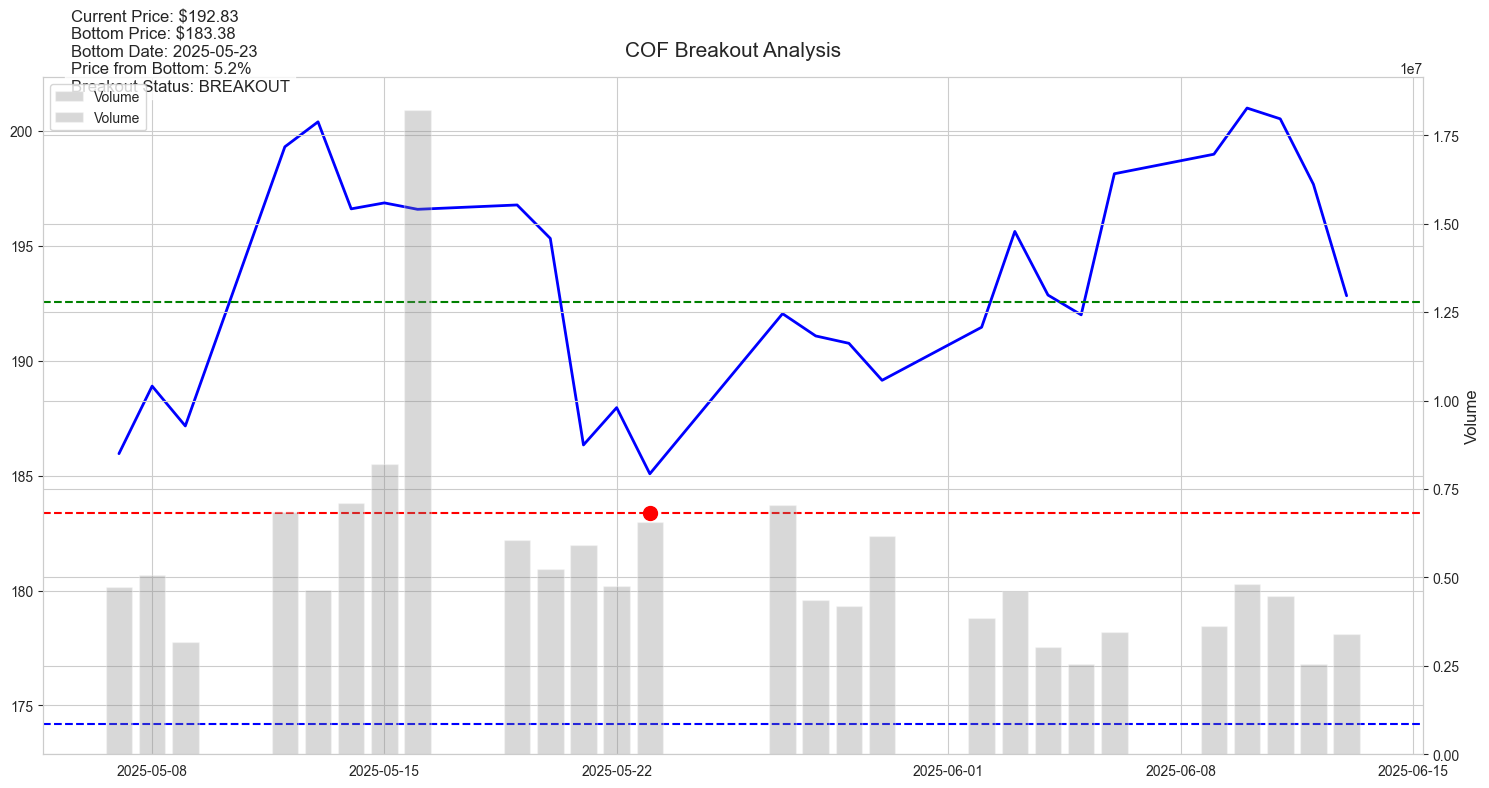




Analyzing BAX...


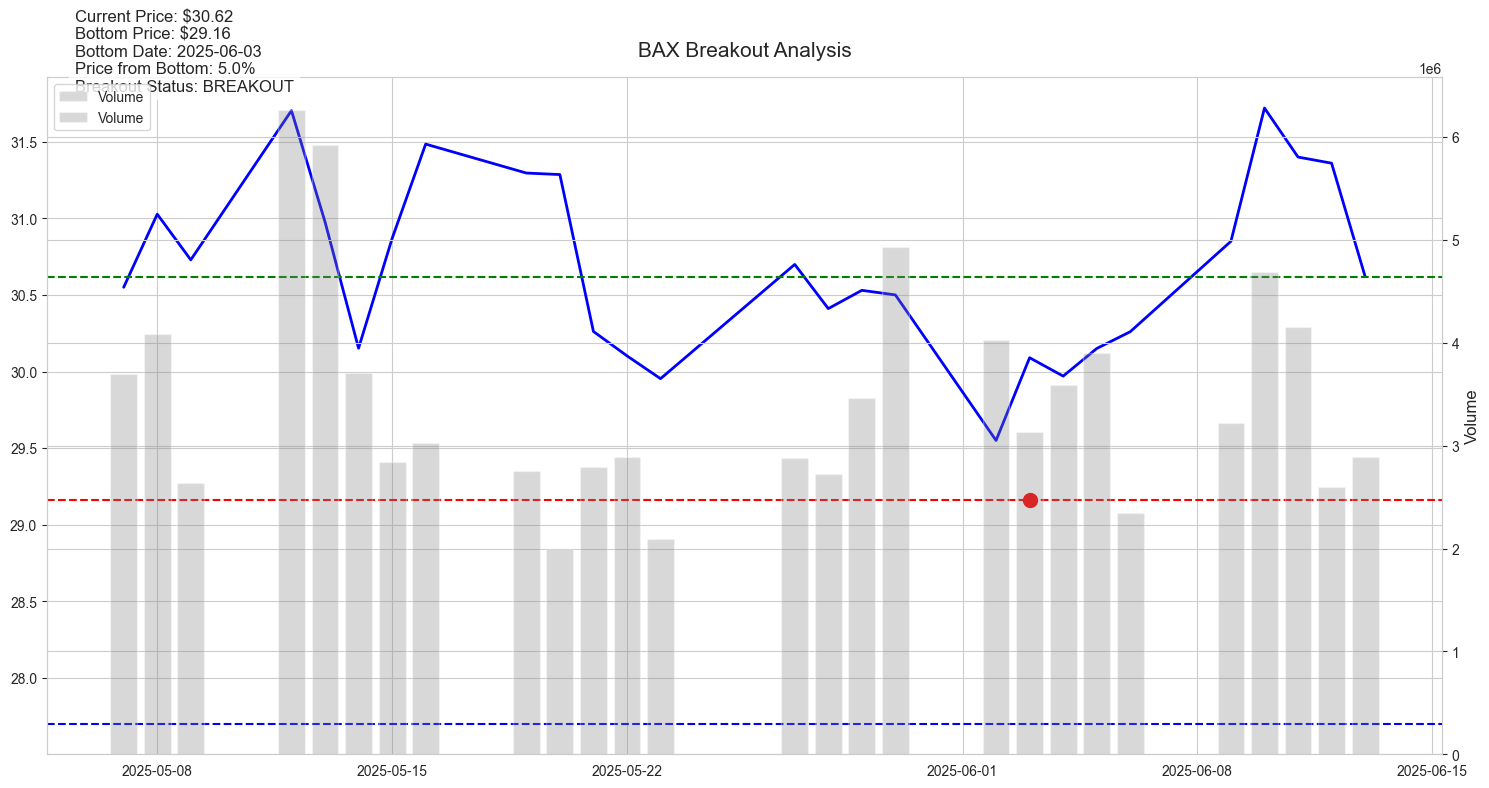

In [79]:
visualize_all_breakouts(breakout_df)